# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 40000 observations in the training set and 10000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generator could be repaired before failing/breaking to reduce the maintenance cost. The different costs associated with maintenance are as follows:

- `Replacement cost = $40,000`
- `Repair cost = $15,000`
- `Inspection cost = $5,000`

“1” in the target variables should be considered as “failure” and “0” will represent “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing libraries

In [1]:
# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libraries that visualize data
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# to get different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

# for tuning moel and splitting data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# used for scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# to impute missing values
from sklearn.impute import KNNImputer

# for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# to over sample and under sample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

## Loading Data

In [2]:
df = pd.read_csv("Train.csv")
df.head()

V1     V2    V3     V4     V5     V6     V7     V8     V9    V10  ...  \
0 -4.465 -4.679 3.102  0.506 -0.221 -2.033 -2.911  0.051 -1.522  3.762  ...   
1 -2.910 -2.569 4.109  1.317 -1.621 -3.827 -1.617  0.669  0.387  0.854  ...   
2  4.284  5.105 6.092  2.640 -1.041  1.308 -1.876 -9.582  3.470  0.763  ...   
3  3.366  3.653 0.910 -1.368  0.332  2.359  0.733 -4.332  0.566 -0.101  ...   
4 -3.832 -5.824 0.634 -2.419 -1.774  1.017 -2.099 -3.173 -2.082  5.393  ...   

     V32    V33    V34   V35    V36    V37    V38    V39    V40  Target  
0  3.060 -1.690  2.846 2.235  6.667  0.444 -2.369  2.951 -3.480       0  
1 -3.783 -6.823  4.909 0.482  5.338  2.381 -3.128  3.527 -3.020       0  
2 -3.098  2.690 -1.643 7.566 -3.198 -3.496  8.105  0.562 -4.227       0  
3 -1.795  3.033 -2.468 1.895 -2.298 -1.731  5.909 -0.386  0.616       0  
4 -0.257  0.804  4.086 2.292  5.361  0.352  2.940  3.839 -4.309       0  

[5 rows x 41 columns]

<IPython.core.display.Javascript object>

In [3]:
df.shape

(40000, 41)

<IPython.core.display.Javascript object>

In [4]:
df_test = pd.read_csv("Test.csv")
df_test.head()

V1     V2    V3     V4     V5     V6     V7     V8     V9    V10  ...  \
0 -0.613 -3.820 2.202  1.300 -1.185 -4.496 -1.836  4.723  1.206 -0.342  ...   
1 -0.733  2.210 8.083  7.063 -1.510 -3.261 -3.334 -3.019  3.557 -1.511  ...   
2  0.390 -0.512 0.527 -2.577 -1.017  2.235 -0.441 -4.406 -0.333  1.967  ...   
3  3.412  1.153 2.114 -2.275  0.088 -0.010  0.514 -1.371  1.863 -0.031  ...   
4 -0.875 -0.641 4.084 -1.590  0.526 -1.958 -0.695  1.347 -1.732  0.466  ...   

     V32    V33    V34    V35    V36    V37     V38   V39    V40  Target  
0  2.291 -5.411  0.870  0.574  4.157  1.428 -10.511 0.455 -1.448       0  
1 -3.270 -1.806  1.798  5.895 -1.312 -0.765  -1.408 0.557 -4.049       0  
2 -2.475  2.494  0.315  2.059  0.684 -0.485   5.128 1.721 -1.488       0  
3 -2.497 -1.776 -1.712 -1.506  2.242 -0.658  -1.862 0.846  0.857       0  
4 -1.319 -2.997  0.460  0.620  5.632  1.324  -1.752 1.808  1.676       0  

[5 rows x 41 columns]

<IPython.core.display.Javascript object>

In [5]:
df_test.shape

(10000, 41)

<IPython.core.display.Javascript object>

## Data Overview

In [6]:
train = df.copy()
test = df_test.copy()

<IPython.core.display.Javascript object>

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

<IPython.core.display.Javascript object>

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      9989 non-null   float64
 1   V2      9993 non-null   float64
 2   V3      10000 non-null  float64
 3   V4      10000 non-null  float64
 4   V5      10000 non-null  float64
 5   V6      10000 non-null  float64
 6   V7      10000 non-null  float64
 7   V8      10000 non-null  float64
 8   V9      10000 non-null  float64
 9   V10     10000 non-null  float64
 10  V11     10000 non-null  float64
 11  V12     10000 non-null  float64
 12  V13     10000 non-null  float64
 13  V14     10000 non-null  float64
 14  V15     10000 non-null  float64
 15  V16     10000 non-null  float64
 16  V17     10000 non-null  float64
 17  V18     10000 non-null  float64
 18  V19     10000 non-null  float64
 19  V20     10000 non-null  float64
 20  V21     10000 non-null  float64
 21  V22     10000 non-null  float64
 22 

<IPython.core.display.Javascript object>

#### Observations:
- It seems that all values in the train and test set are non_null, except for the few in both V1 and V2. These null values will have to be imputed.

In [9]:
for col in train.columns:
    print(col)
    print("Amount of duplicates", train[col].duplicated().sum())

V1
Amount of duplicates 45
V2
Amount of duplicates 38
V3
Amount of duplicates 0
V4
Amount of duplicates 0
V5
Amount of duplicates 0
V6
Amount of duplicates 0
V7
Amount of duplicates 0
V8
Amount of duplicates 0
V9
Amount of duplicates 0
V10
Amount of duplicates 0
V11
Amount of duplicates 0
V12
Amount of duplicates 0
V13
Amount of duplicates 0
V14
Amount of duplicates 0
V15
Amount of duplicates 1
V16
Amount of duplicates 0
V17
Amount of duplicates 0
V18
Amount of duplicates 0
V19
Amount of duplicates 0
V20
Amount of duplicates 0
V21
Amount of duplicates 0
V22
Amount of duplicates 0
V23
Amount of duplicates 0
V24
Amount of duplicates 0
V25
Amount of duplicates 0
V26
Amount of duplicates 0
V27
Amount of duplicates 0
V28
Amount of duplicates 0
V29
Amount of duplicates 0
V30
Amount of duplicates 0
V31
Amount of duplicates 0
V32
Amount of duplicates 0
V33
Amount of duplicates 0
V34
Amount of duplicates 0
V35
Amount of duplicates 0
V36
Amount of duplicates 0
V37
Amount of duplicates 0
V38
Amou

<IPython.core.display.Javascript object>

In [10]:
for col in test.columns:
    print(col)
    print("Amount of duplicates", test[col].duplicated().sum())

V1
Amount of duplicates 10
V2
Amount of duplicates 6
V3
Amount of duplicates 0
V4
Amount of duplicates 0
V5
Amount of duplicates 0
V6
Amount of duplicates 0
V7
Amount of duplicates 0
V8
Amount of duplicates 0
V9
Amount of duplicates 0
V10
Amount of duplicates 0
V11
Amount of duplicates 0
V12
Amount of duplicates 0
V13
Amount of duplicates 0
V14
Amount of duplicates 0
V15
Amount of duplicates 0
V16
Amount of duplicates 0
V17
Amount of duplicates 0
V18
Amount of duplicates 0
V19
Amount of duplicates 0
V20
Amount of duplicates 0
V21
Amount of duplicates 0
V22
Amount of duplicates 0
V23
Amount of duplicates 0
V24
Amount of duplicates 0
V25
Amount of duplicates 0
V26
Amount of duplicates 0
V27
Amount of duplicates 0
V28
Amount of duplicates 0
V29
Amount of duplicates 0
V30
Amount of duplicates 0
V31
Amount of duplicates 0
V32
Amount of duplicates 0
V33
Amount of duplicates 0
V34
Amount of duplicates 0
V35
Amount of duplicates 0
V36
Amount of duplicates 0
V37
Amount of duplicates 0
V38
Amoun

<IPython.core.display.Javascript object>

In [11]:
train.describe(include="all").T

count   mean   std     min    25%    50%    75%    max
V1     39954.000 -0.288 3.449 -13.502 -2.751 -0.774  1.837 17.437
V2     39961.000  0.443 3.139 -13.212 -1.638  0.464  2.538 13.089
V3     40000.000  2.506 3.406 -11.469  0.203  2.265  4.585 18.366
V4     40000.000 -0.066 3.437 -16.015 -2.350 -0.124  2.149 13.280
V5     40000.000 -0.045 2.107  -8.613 -1.507 -0.097  1.346  9.403
V6     40000.000 -1.001 2.037 -10.227 -2.363 -1.007  0.374  7.065
V7     40000.000 -0.893 1.757  -8.206 -2.037 -0.935  0.207  8.006
V8     40000.000 -0.563 3.299 -15.658 -2.660 -0.384  1.714 11.679
V9     40000.000 -0.008 2.162  -8.596 -1.494 -0.052  1.426  8.507
V10    40000.000 -0.002 2.183 -11.001 -1.391  0.106  1.486  8.108
V11    40000.000 -1.918 3.116 -14.832 -3.941 -1.942  0.089 13.852
V12    40000.000  1.578 2.915 -13.619 -0.431  1.485  3.541 15.754
V13    40000.000  1.591 2.865 -13.830 -0.209  1.654  3.476 15.420
V14    40000.000 -0.947 1.788  -8.309 -2.165 -0.957  0.266  6.213
V15    40000.000 -2.436 3.341 -17.202 -4.451 -2.399 -0.382 12.875
V16    40000.000 -2.943 4.212 -21.919 -5.632 -2.719 -0.113 13.583
V17    40000.000 -0.143 3.344 -17.634 -2.227 -0.028  2.072 17.405
V18    40000.000  1.189 2.586 -11.644 -0.403  0.867  2.564 13.180
V19    40000.000  1.181 3.395 -13.492 -1.051  1.278  3.497 16.059
V20    40000.000  0.027 3.675 -13.923 -2.434  0.030  2.513 16.052
V21    40000.000 -3.621 3.557 -19.436 -5.921 -3.559 -1.284 13.840
V22    40000.000  0.943 1.646 -10.122 -0.112  0.963  2.018  7.410
V23    40000.000 -0.388 4.052 -16.188 -3.119 -0.275  2.438 15.080
V24    40000.000  1.142 3.913 -18.488 -1.483  0.964  3.563 19.769
V25    40000.000 -0.003 2.025  -8.228 -1.373  0.021  1.400  8.223
V26    40000.000  1.896 3.421 -12.588 -0.319  1.964  4.163 16.836
V27    40000.000 -0.617 4.392 -14.905 -3.692 -0.910  2.201 21.595
V28    40000.000 -0.888 1.925  -9.685 -2.193 -0.905  0.377  6.907
V29    40000.000 -1.005 2.676 -12.579 -2.799 -1.206  0.604 11.852
V30    40000.000 -0.033 3.031 -14.796 -1.908  0.185  2.040 13.191
V31    40000.000  0.506 3.483 -19.377 -1.799  0.491  2.778 17.255
V32    40000.000  0.327 5.499 -23.201 -3.392  0.056  3.789 24.848
V33    40000.000  0.057 3.574 -17.454 -2.238 -0.050  2.256 16.692
V34    40000.000 -0.464 3.186 -17.985 -2.128 -0.251  1.433 14.358
V35    40000.000  2.235 2.924 -15.350  0.332  2.110  4.045 16.805
V36    40000.000  1.530 3.820 -17.479 -0.937  1.572  3.997 19.330
V37    40000.000 -0.000 1.778  -7.640 -1.266 -0.133  1.161  7.803
V38    40000.000 -0.351 3.964 -17.375 -3.017 -0.319  2.291 15.964
V39    40000.000  0.900 1.751  -7.136 -0.262  0.921  2.069  7.998
V40    40000.000 -0.897 2.998 -11.930 -2.950 -0.949  1.092 10.654
Target 40000.000  0.055 0.227   0.000  0.000  0.000  0.000  1.000

<IPython.core.display.Javascript object>

In [12]:
test.describe(include="all").T

count   mean   std     min    25%    50%    75%    max
V1      9989.000 -0.260 3.440 -12.382 -2.700 -0.719  1.861 13.504
V2      9993.000  0.417 3.160 -11.625 -1.701  0.456  2.526 14.079
V3     10000.000  2.555 3.395 -12.941  0.238  2.283  4.656 15.409
V4     10000.000 -0.054 3.462 -14.682 -2.371 -0.169  2.144 12.896
V5     10000.000 -0.085 2.102  -7.712 -1.593 -0.144  1.324  7.673
V6     10000.000 -1.014 2.039  -8.949 -2.377 -1.015  0.354  6.273
V7     10000.000 -0.908 1.737  -8.124 -2.035 -0.938  0.189  7.616
V8     10000.000 -0.599 3.343 -12.710 -2.684 -0.387  1.698 10.792
V9     10000.000  0.026 2.180  -7.570 -1.490 -0.086  1.466  8.851
V10    10000.000  0.019 2.169  -8.291 -1.362  0.150  1.537  7.691
V11    10000.000 -1.944 3.105 -15.384 -3.988 -1.970  0.067 10.226
V12    10000.000  1.551 2.906 -10.650 -0.465  1.455  3.516 12.984
V13    10000.000  1.618 2.863 -13.832 -0.126  1.721  3.468 12.620
V14    10000.000 -0.941 1.816  -7.814 -2.160 -0.948  0.262  6.180
V15    10000.000 -2.452 3.324 -15.527 -4.429 -2.408 -0.446 11.673
V16    10000.000 -3.016 4.276 -20.986 -5.682 -2.794 -0.120 13.976
V17    10000.000 -0.154 3.363 -13.418 -2.287 -0.010  2.041 19.777
V18    10000.000  1.180 2.566 -12.214 -0.401  0.877  2.556 13.642
V19    10000.000  1.218 3.415 -14.170 -1.055  1.326  3.576 13.038
V20    10000.000  0.078 3.704 -13.720 -2.417  0.079  2.529 14.497
V21    10000.000 -3.676 3.579 -17.201 -6.022 -3.654 -1.307 16.218
V22    10000.000  0.950 1.622  -8.832 -0.083  0.976  2.005  7.505
V23    10000.000 -0.450 4.063 -15.818 -3.167 -0.259  2.392 13.511
V24    10000.000  1.093 3.915 -12.749 -1.577  0.918  3.537 17.806
V25    10000.000  0.035 2.021  -6.770 -1.339  0.061  1.426  6.557
V26    10000.000  1.878 3.422 -11.414 -0.265  1.973  4.170 17.528
V27    10000.000 -0.558 4.402 -14.219 -3.634 -0.869  2.253 17.290
V28    10000.000 -0.885 1.928  -7.933 -2.169 -0.934  0.396  7.416
V29    10000.000 -1.040 2.660 -10.655 -2.815 -1.264  0.554 14.039
V30    10000.000 -0.067 3.039 -14.054 -1.950  0.138  2.002 10.315
V31    10000.000  0.483 3.451 -13.878 -1.770  0.513  2.773 13.190
V32    10000.000  0.253 5.503 -20.520 -3.459 -0.013  3.762 26.539
V33    10000.000  0.008 3.552 -14.904 -2.280 -0.099  2.198 13.324
V34    10000.000 -0.423 3.168 -17.135 -2.066 -0.203  1.472 14.581
V35    10000.000  2.258 2.919 -19.522  0.375  2.149  4.088 13.489
V36    10000.000  1.550 3.794 -14.912 -0.892  1.620  4.061 17.116
V37    10000.000 -0.006 1.782  -5.362 -1.278 -0.150  1.193  7.682
V38    10000.000 -0.373 3.998 -15.335 -3.004 -0.362  2.335 13.726
V39    10000.000  0.920 1.726  -7.147 -0.225  0.933  2.097  7.234
V40    10000.000 -0.937 3.011 -10.779 -2.993 -0.986  1.085 10.392
Target 10000.000  0.055 0.227   0.000  0.000  0.000  0.000  1.000

<IPython.core.display.Javascript object>

#### Observations:
- Train set
    - All sensors seem to be normally distributed and see no skew.
- Test set
    - All sensors seem to be normally distributed and see no skew.

## EDA

### Plotting histograms and boxplots for all the variables

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Plotting all the features at one go

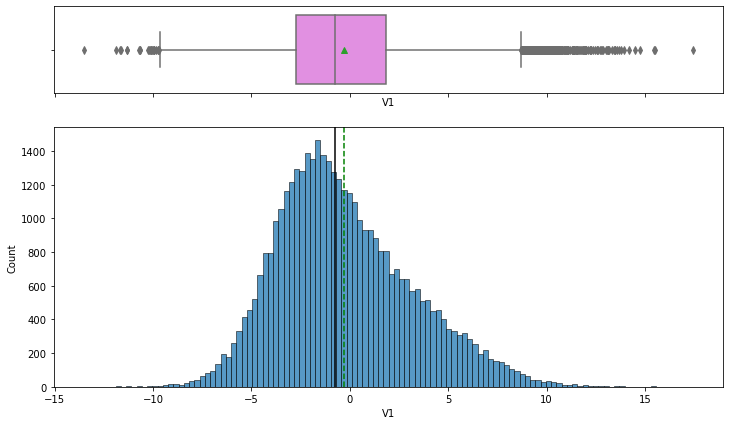

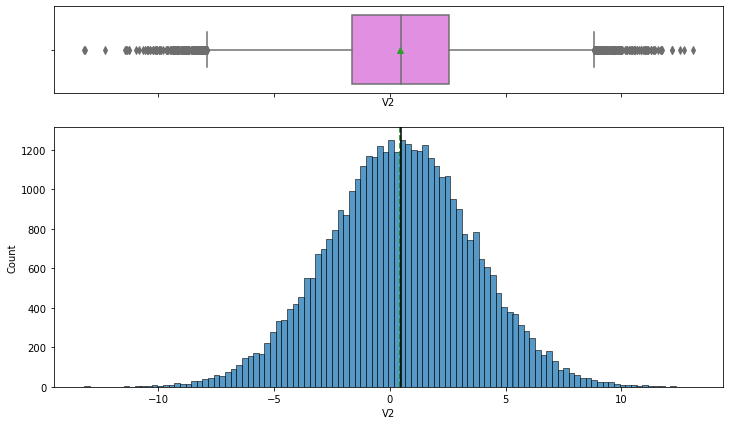

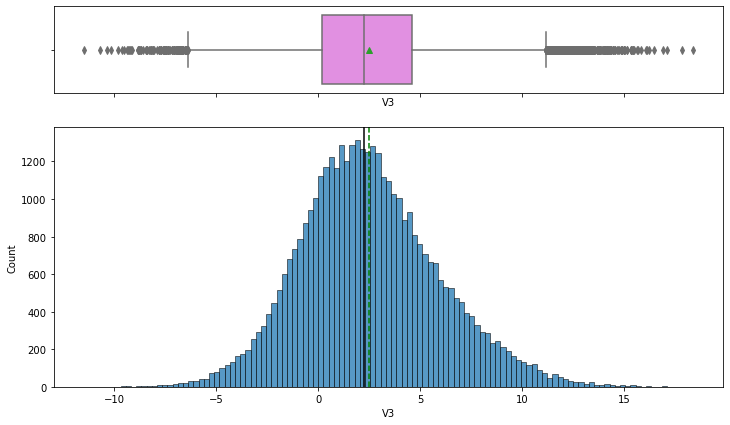

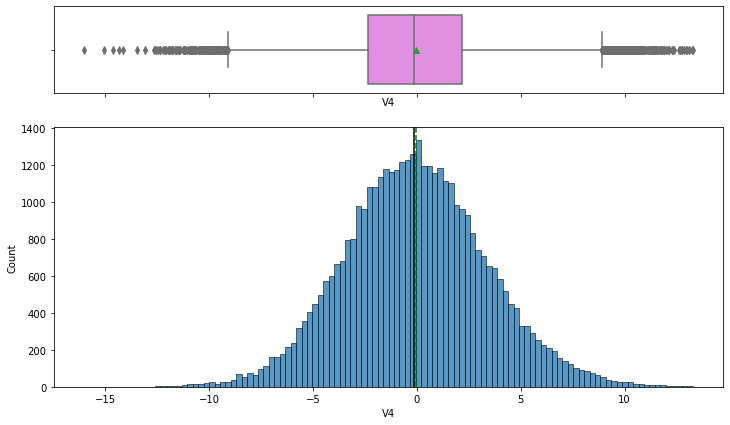

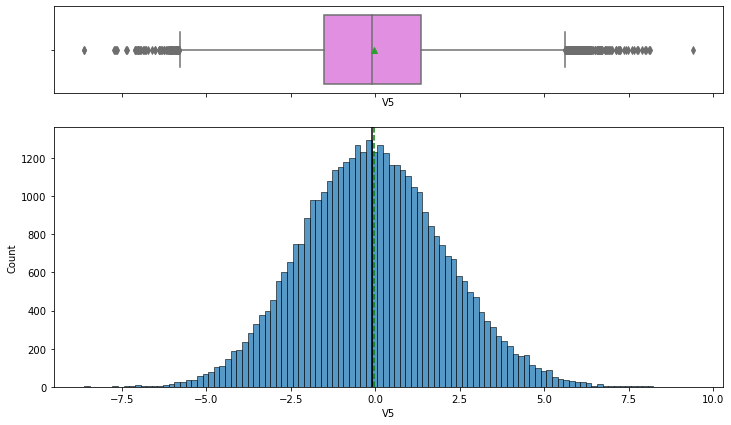

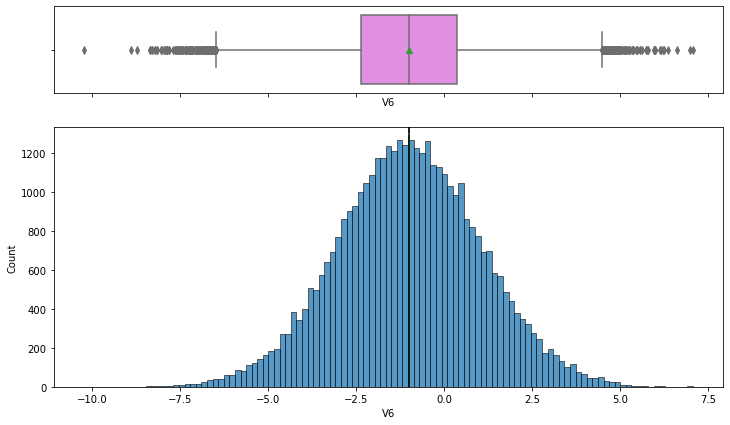

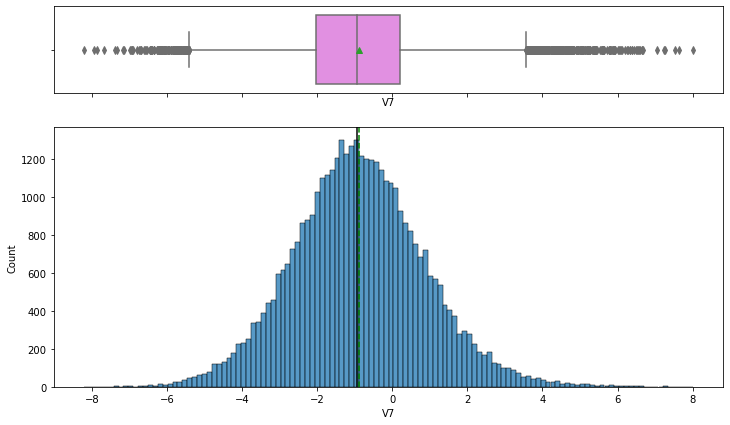

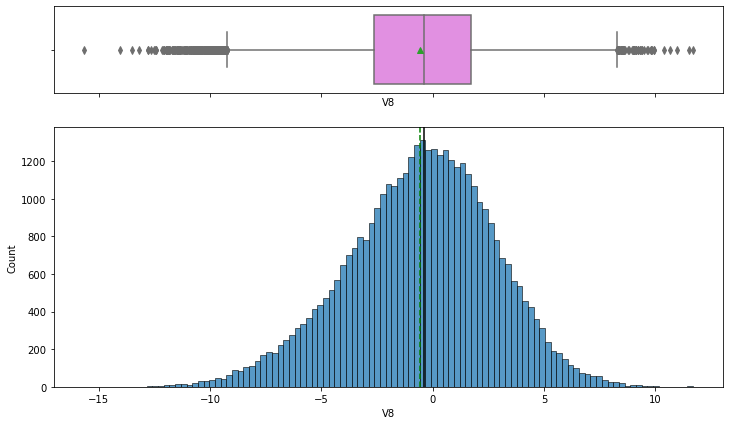

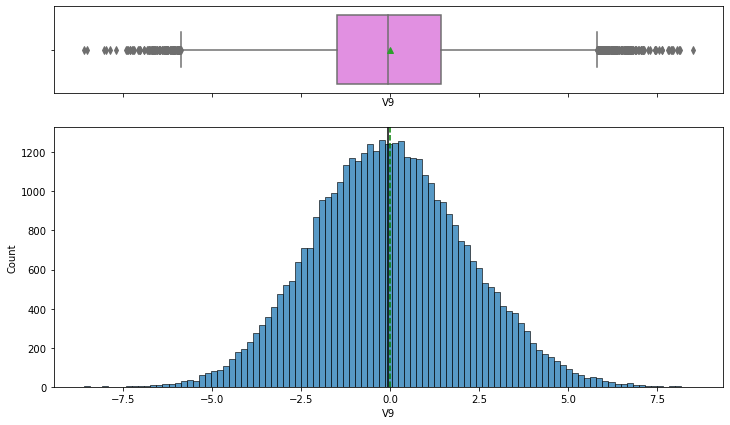

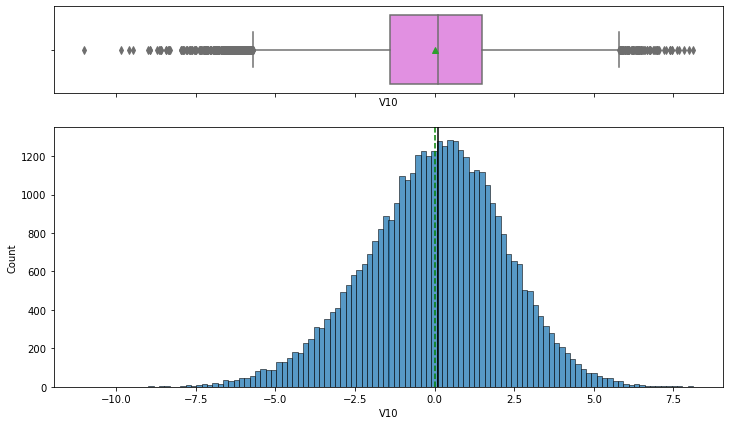

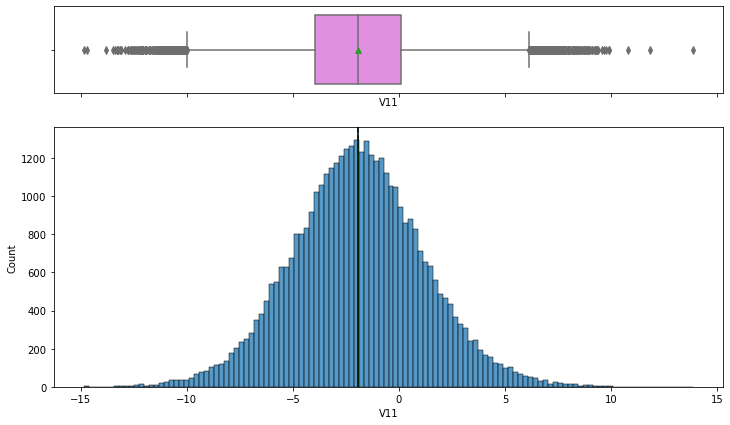

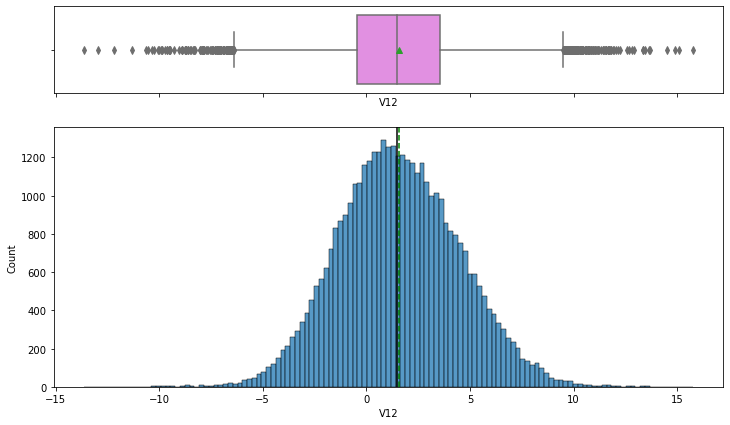

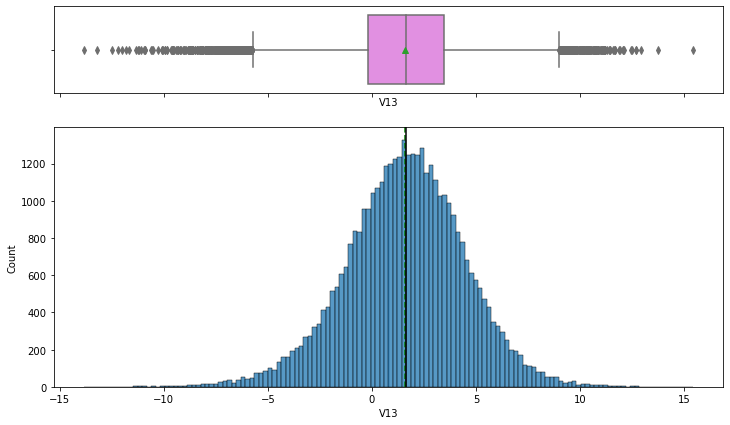

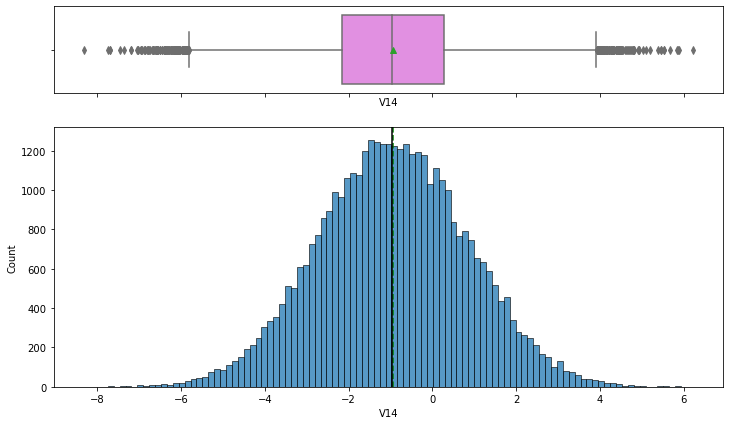

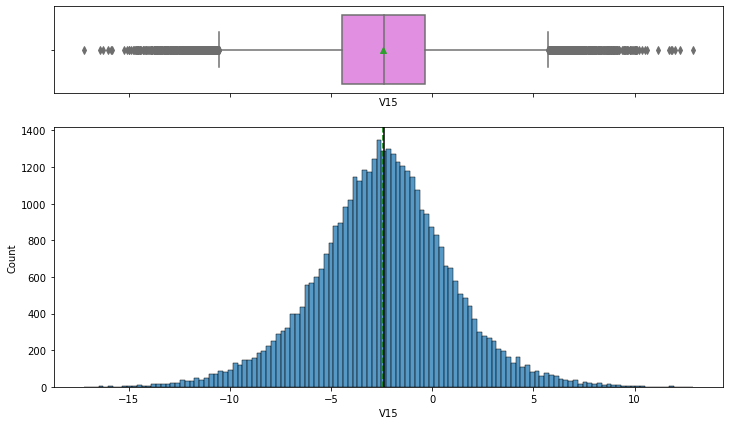

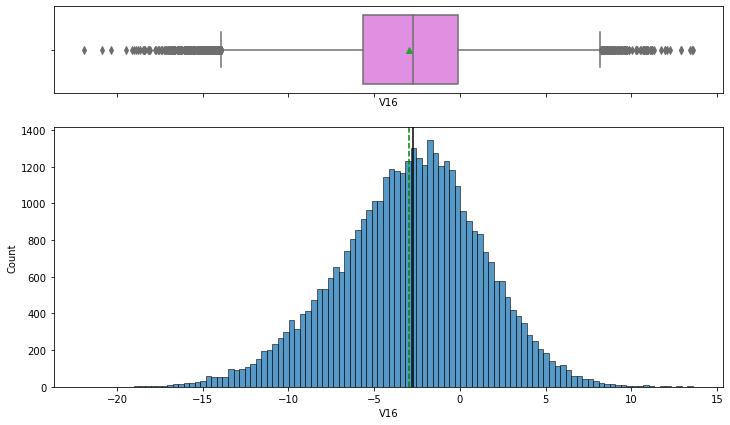

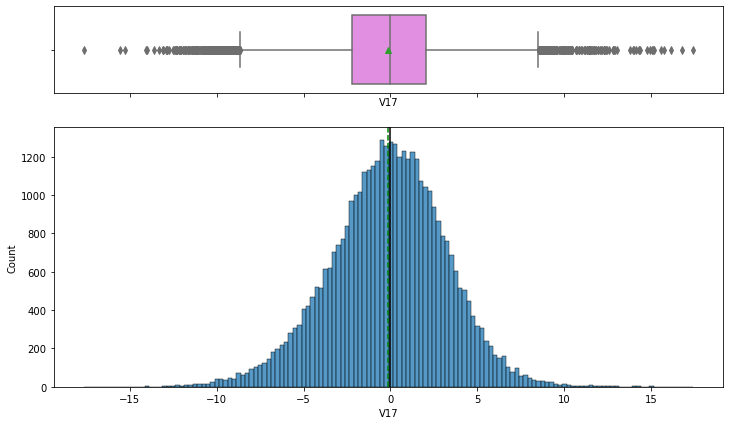

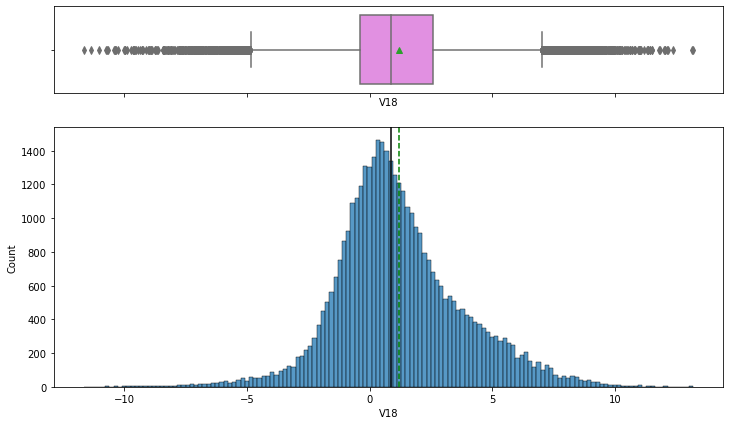

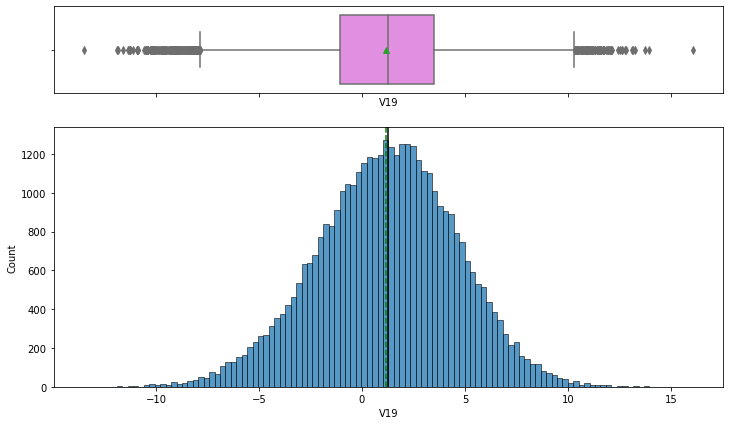

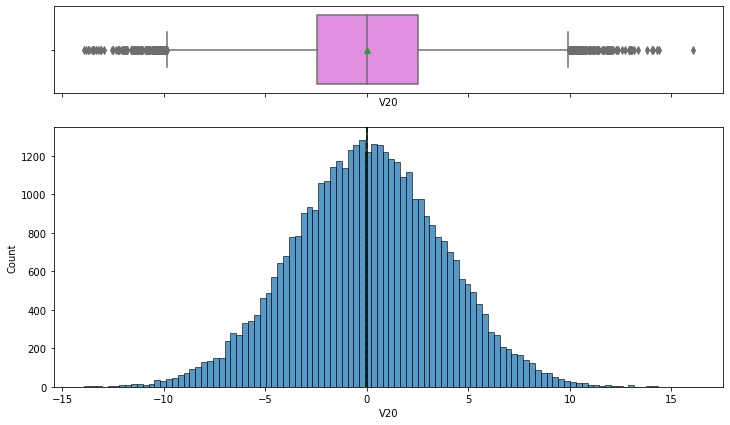

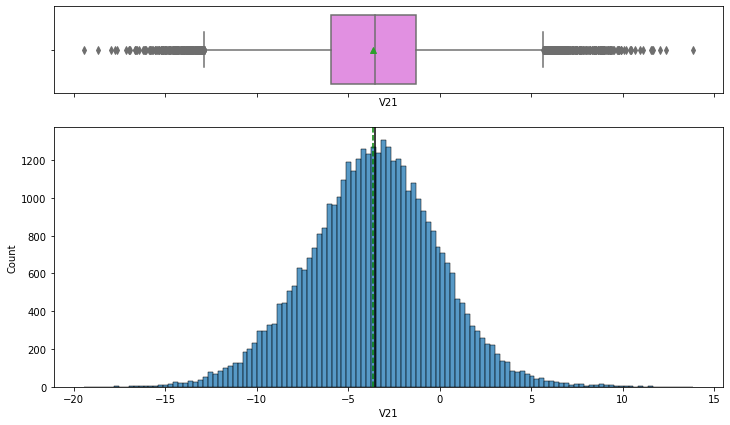

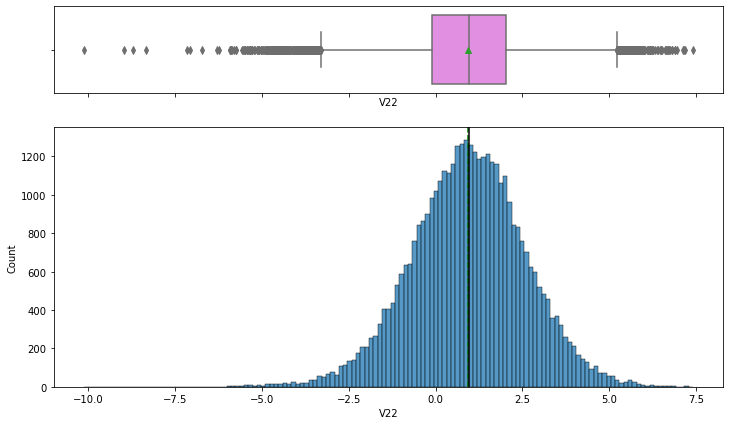

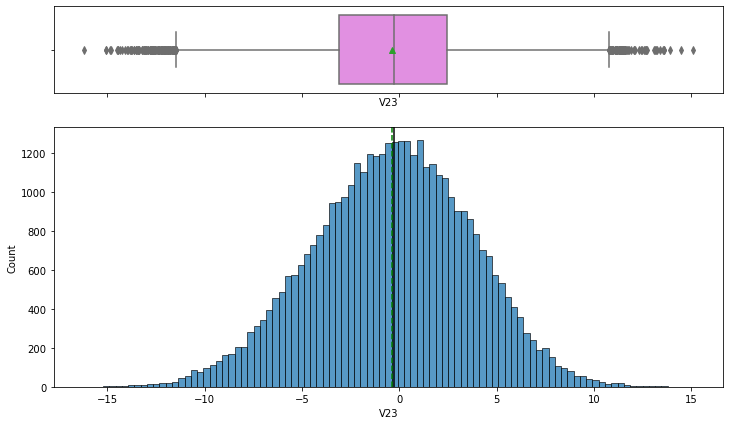

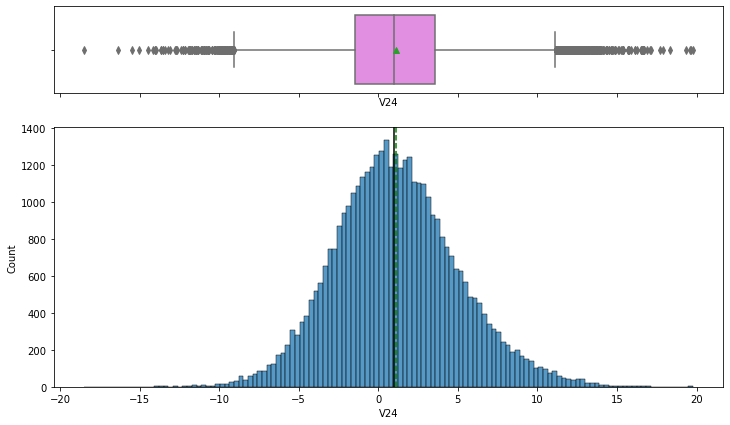

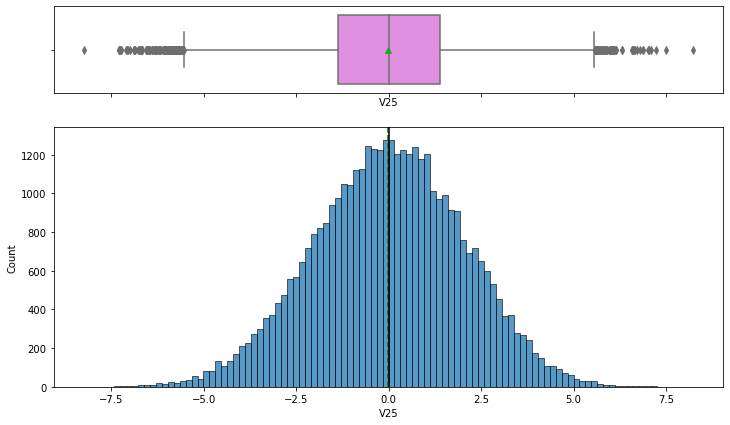

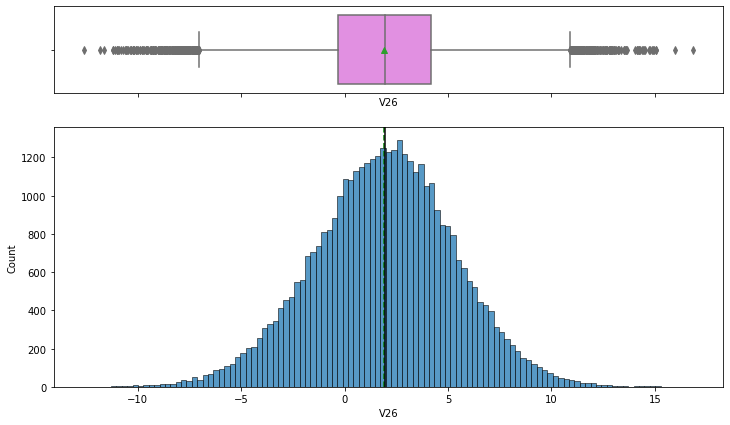

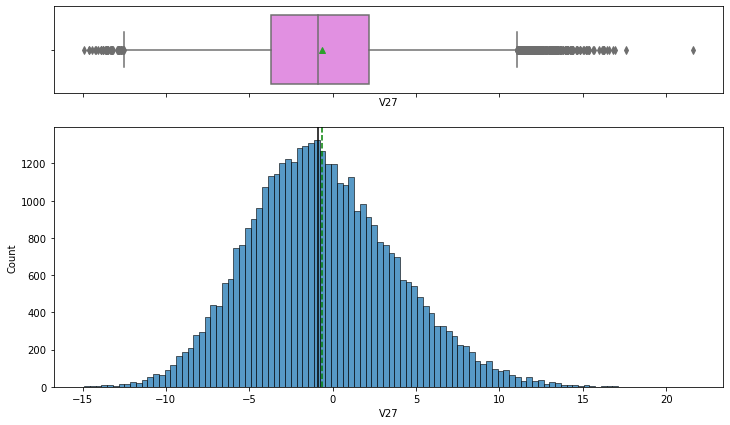

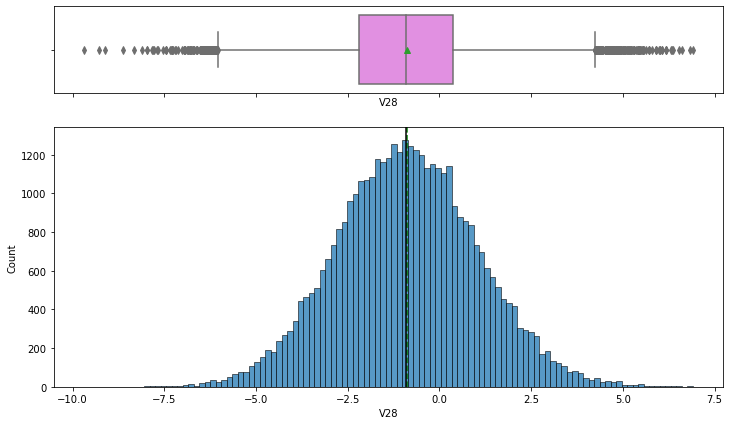

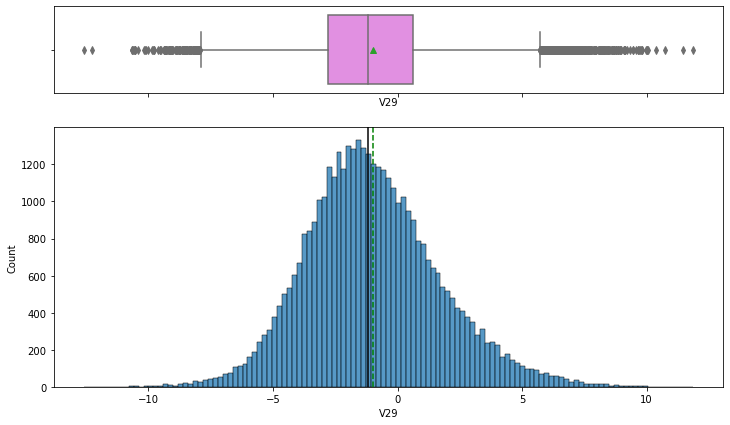

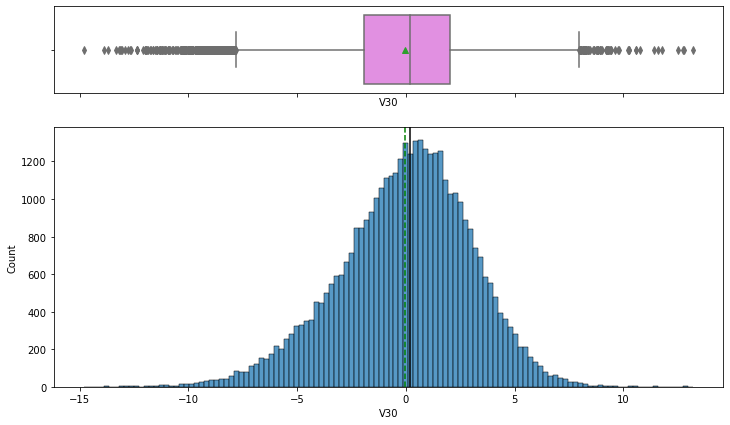

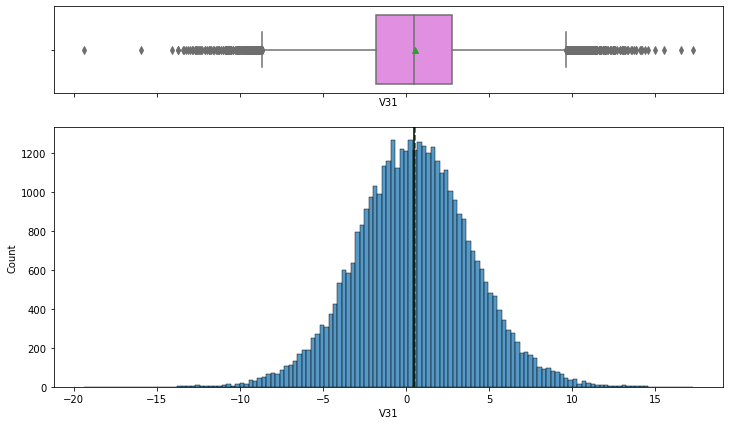

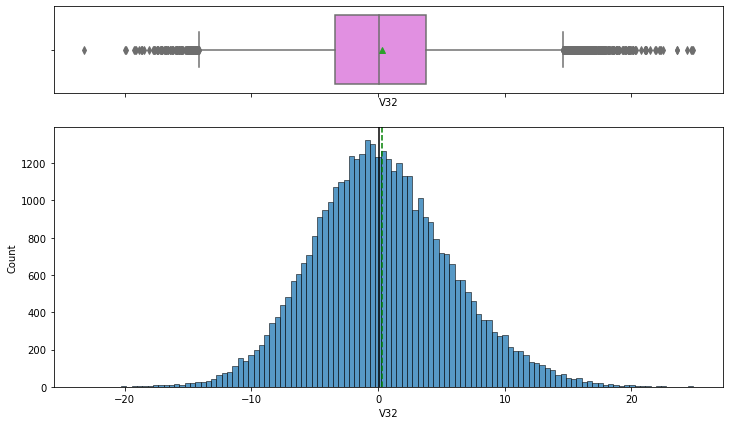

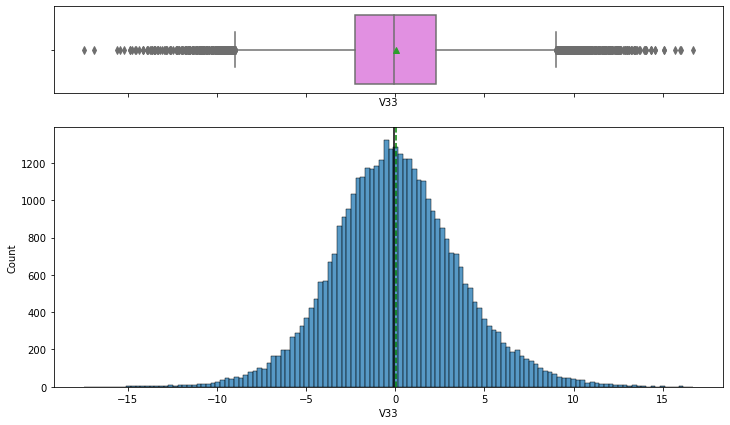

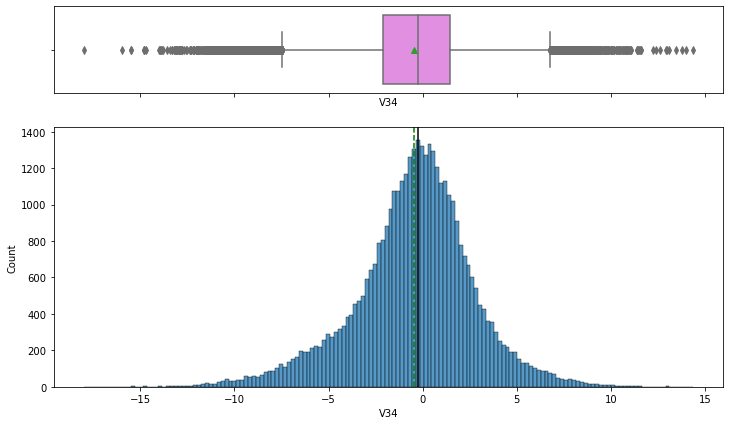

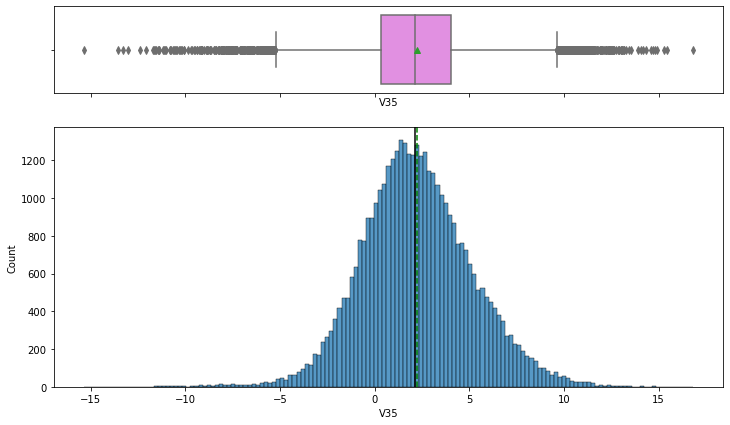

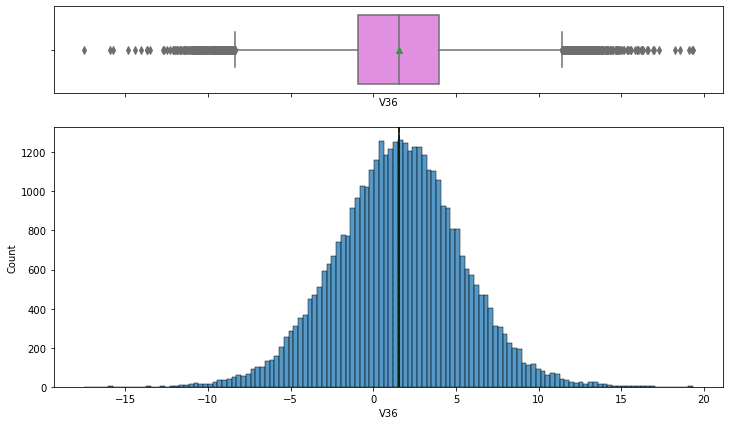

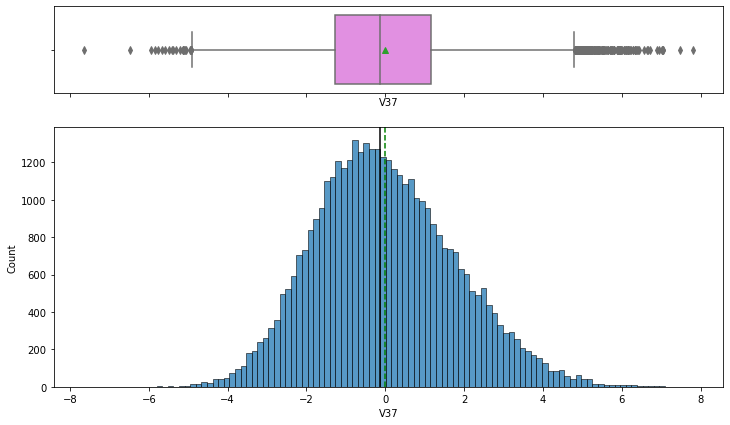

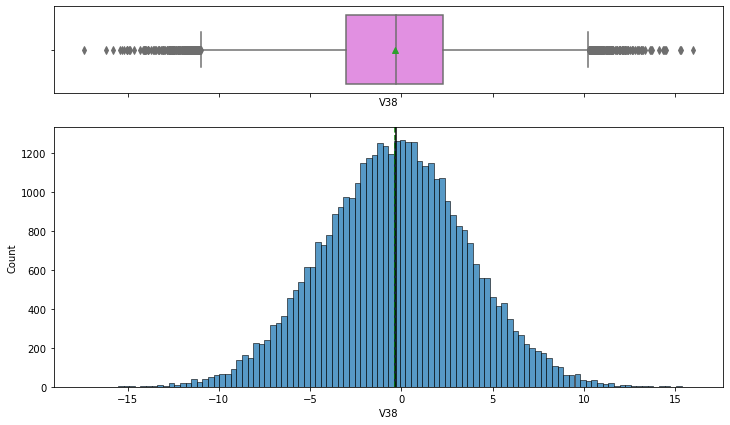

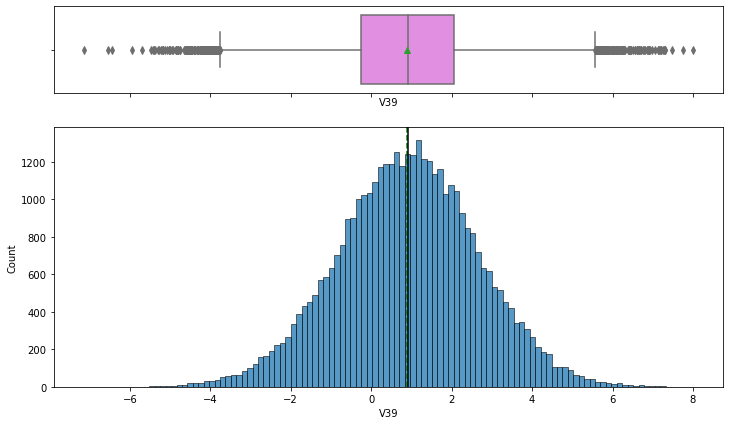

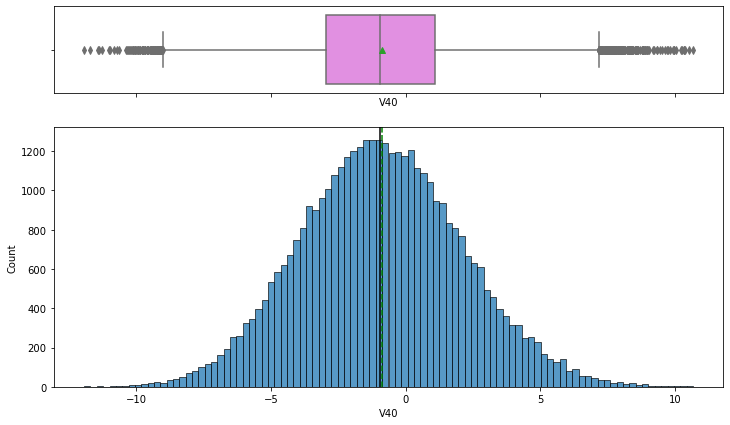

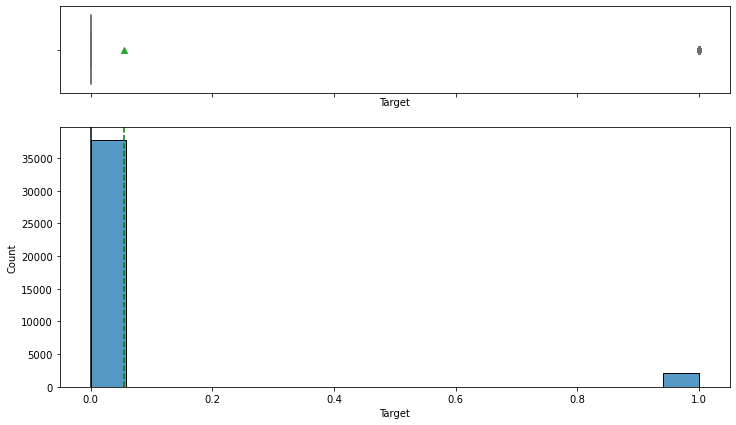

<IPython.core.display.Javascript object>

In [14]:
# creates histogram boxplot of each column in the train data set
for feature in df.columns:
    histogram_boxplot(train, feature, figsize=(12, 7), kde=False, bins=None)

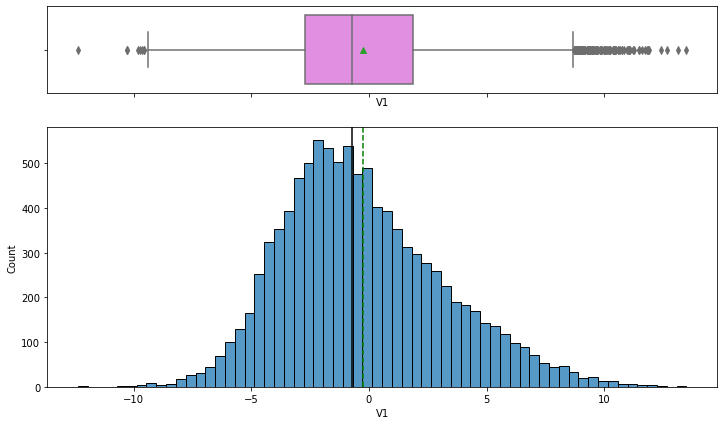

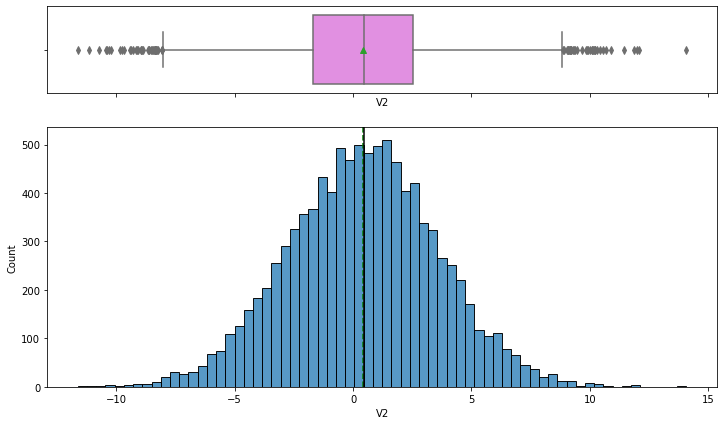

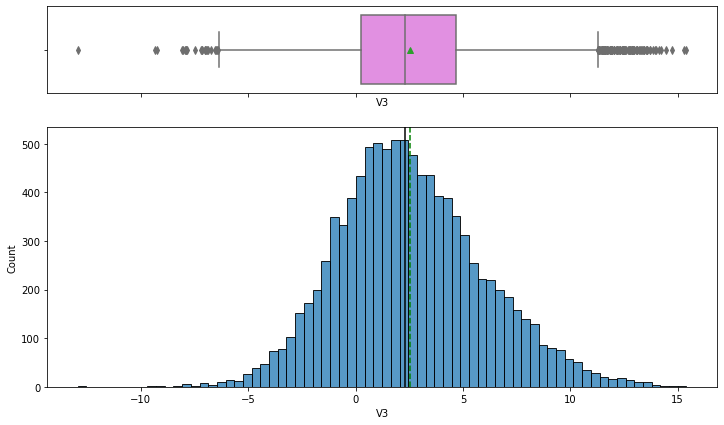

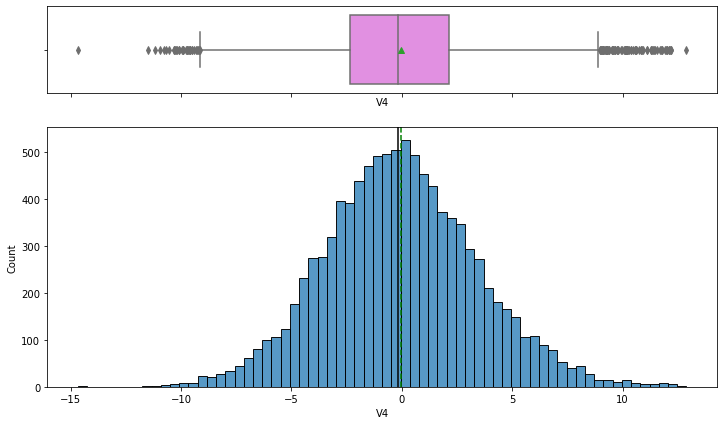

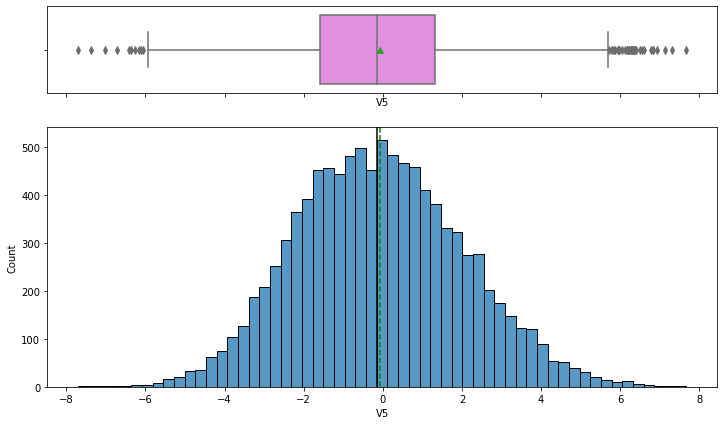

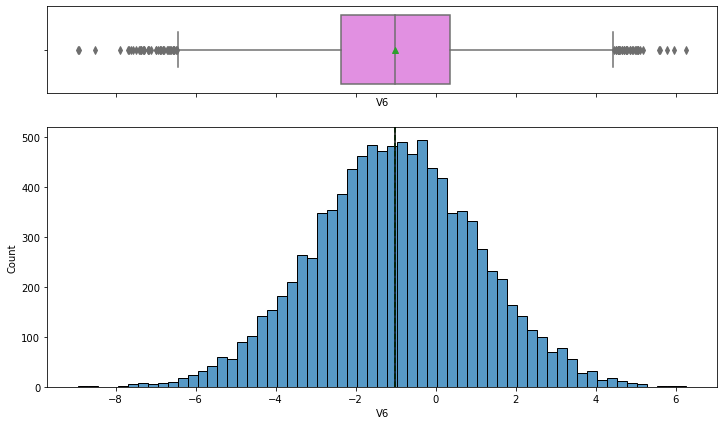

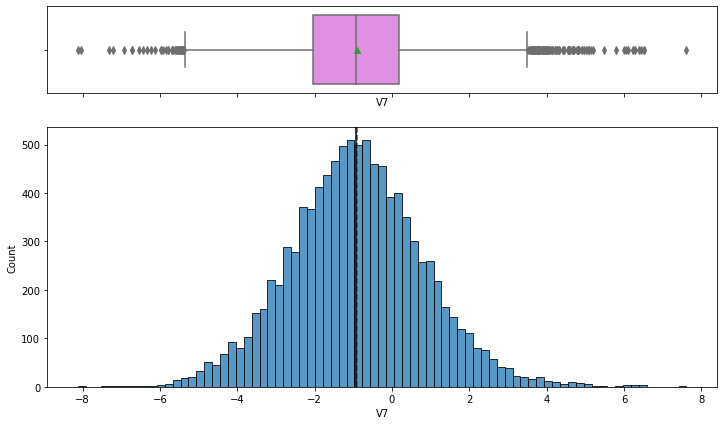

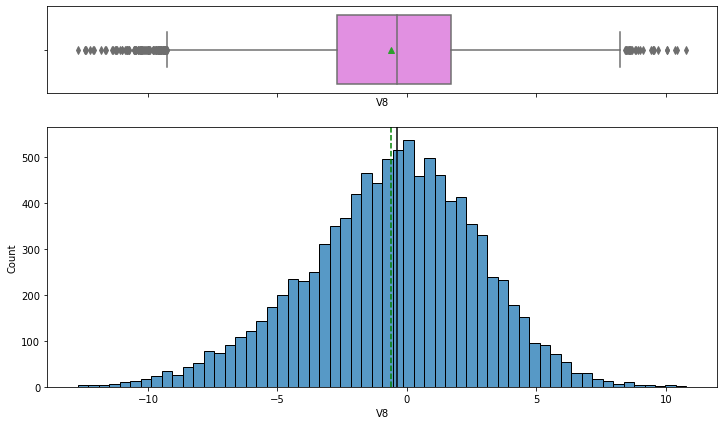

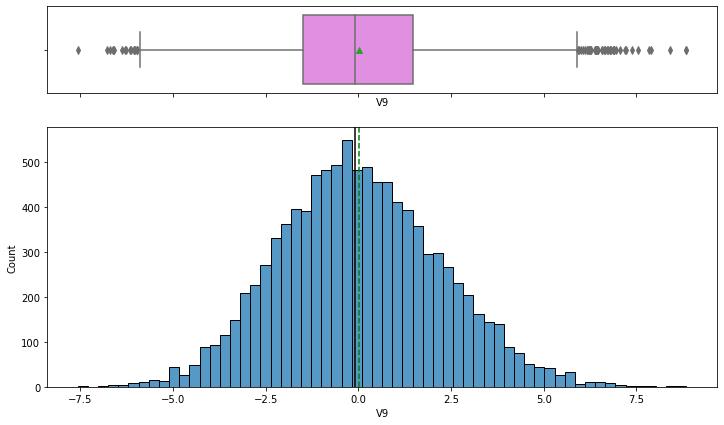

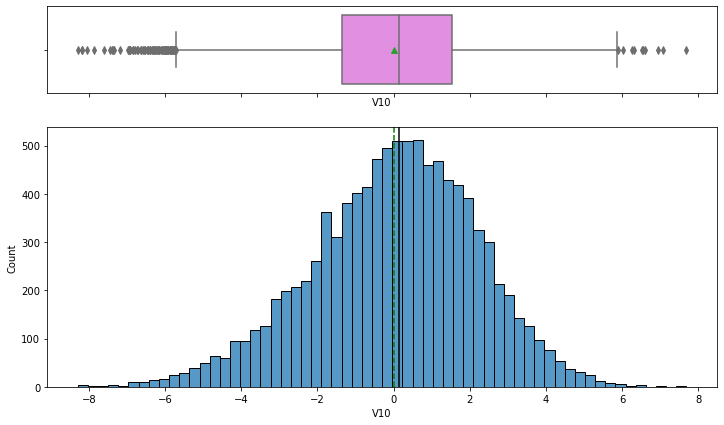

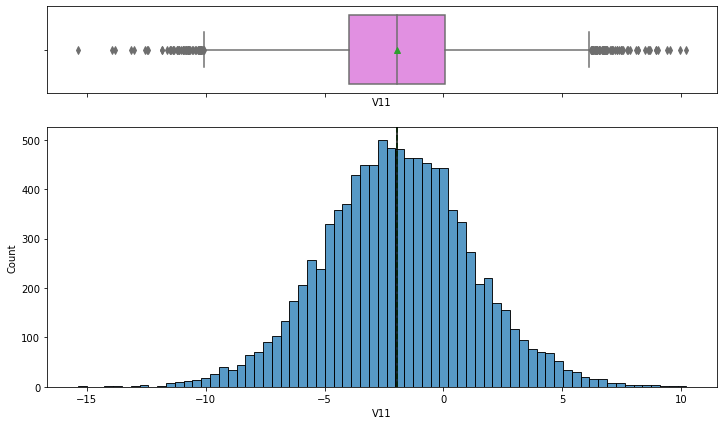

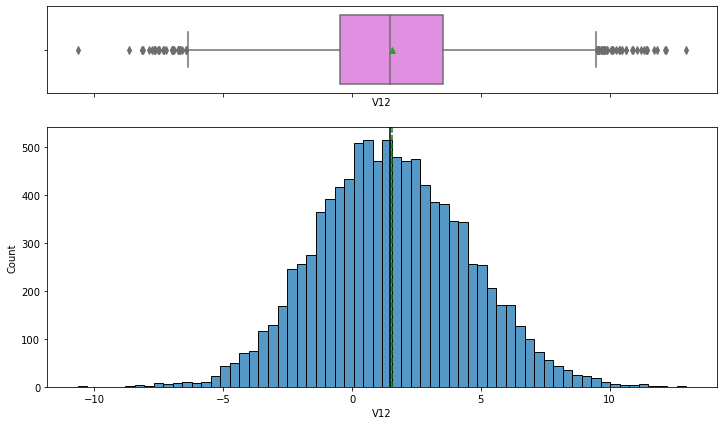

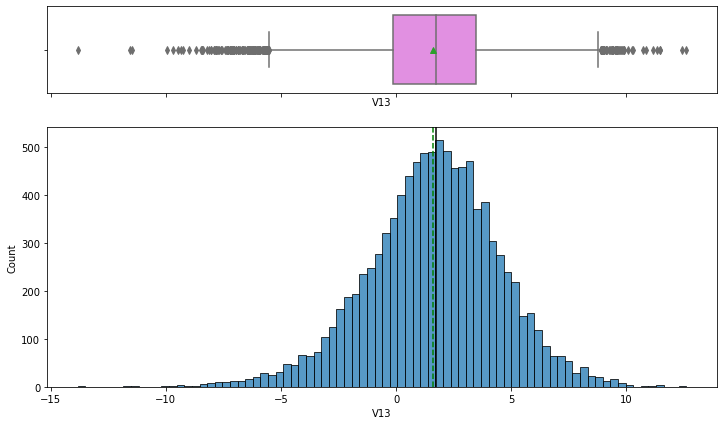

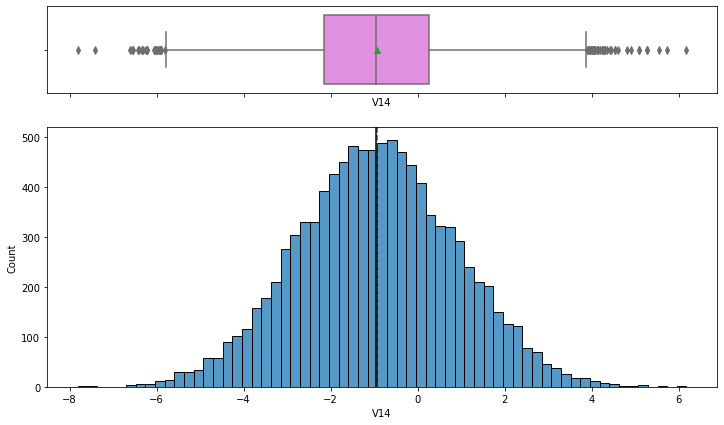

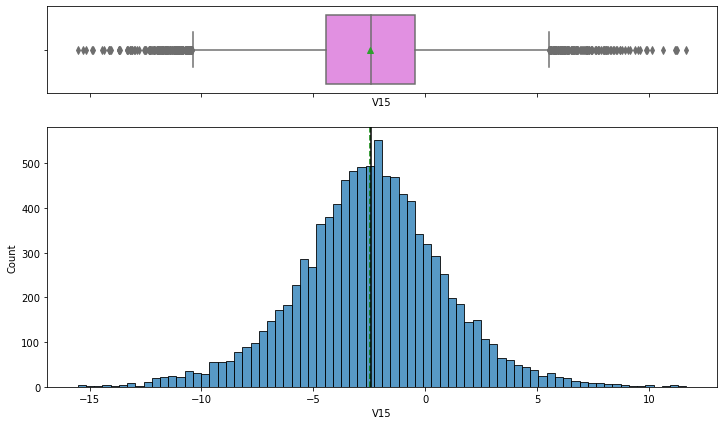

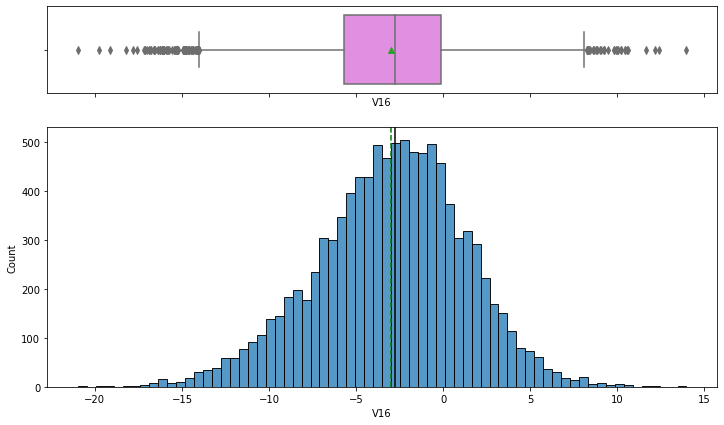

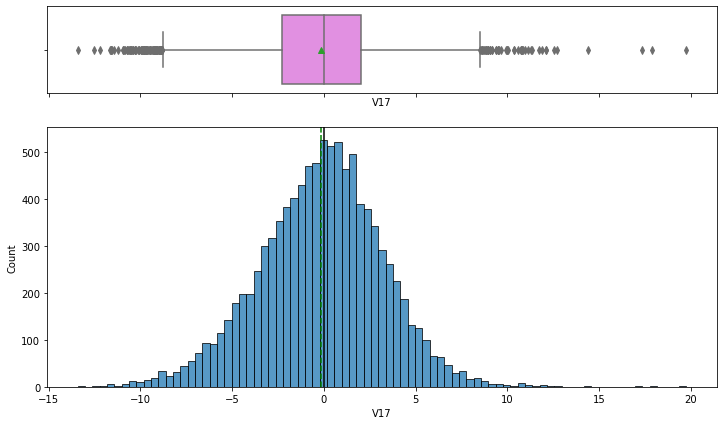

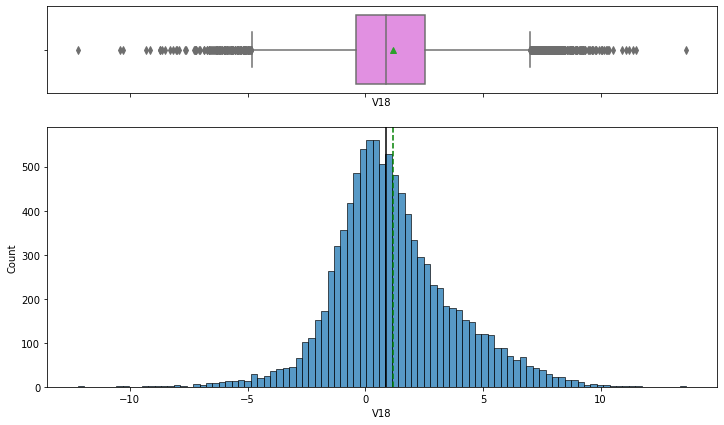

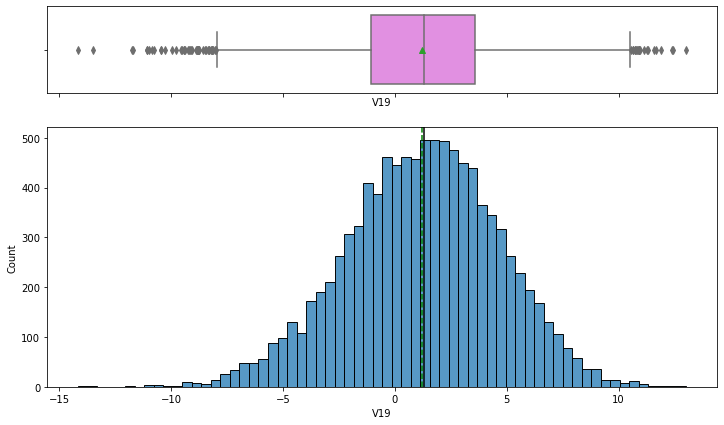

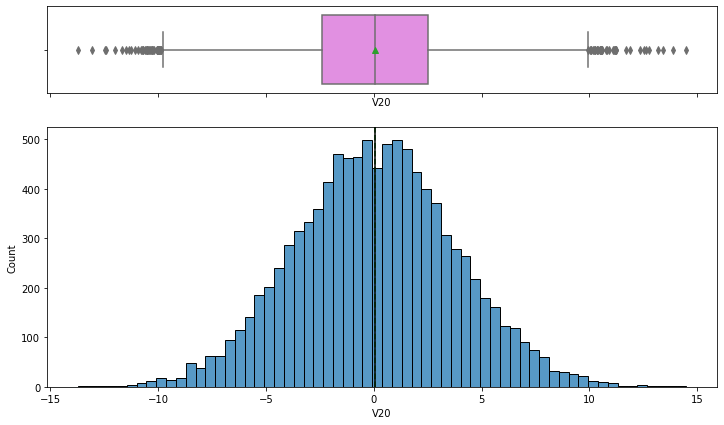

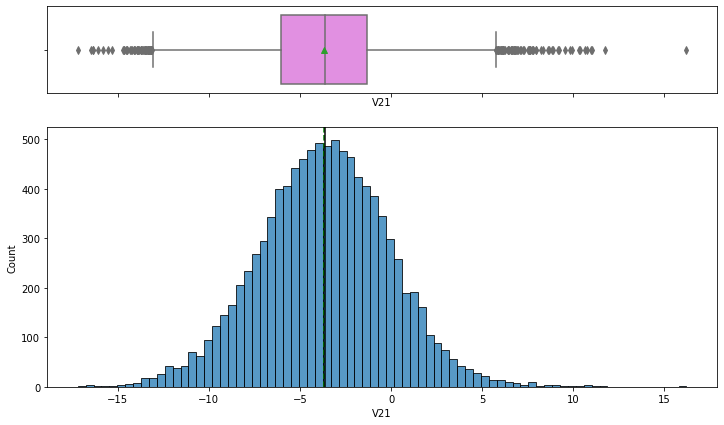

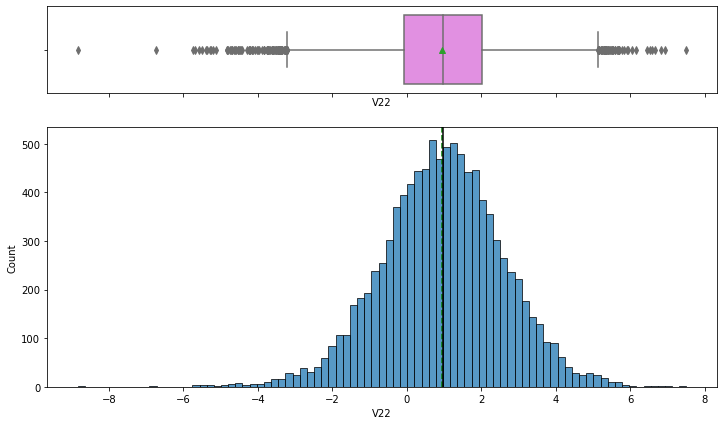

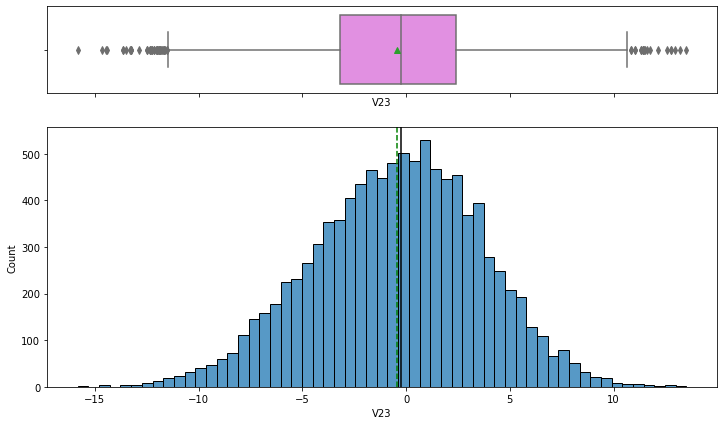

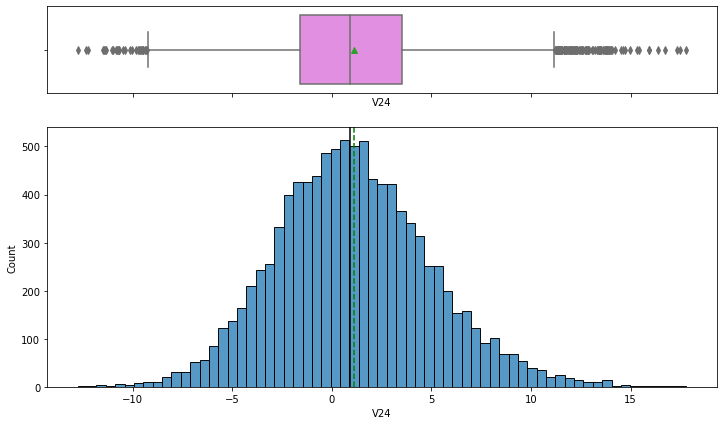

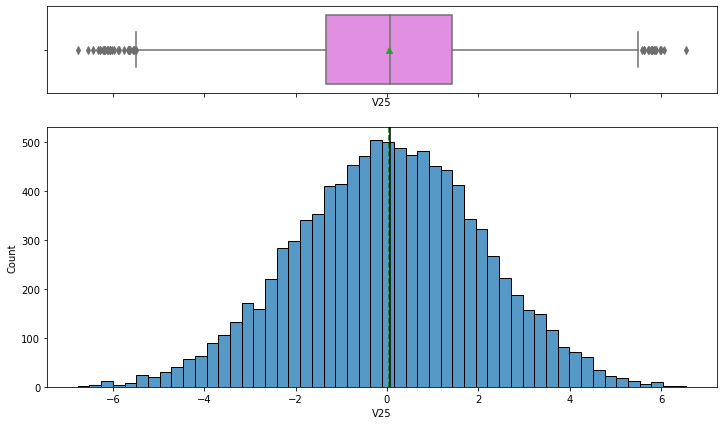

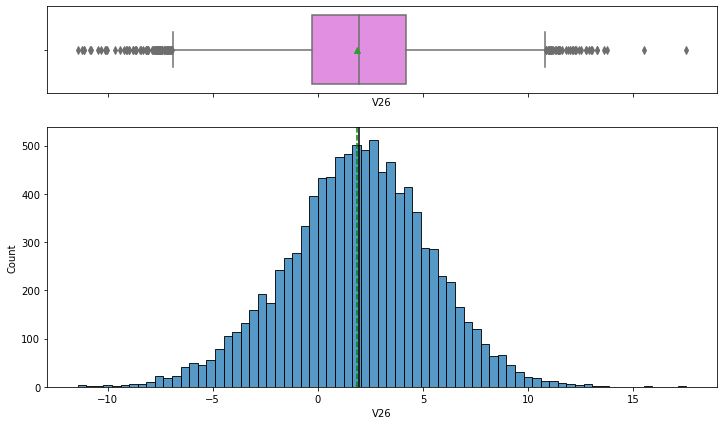

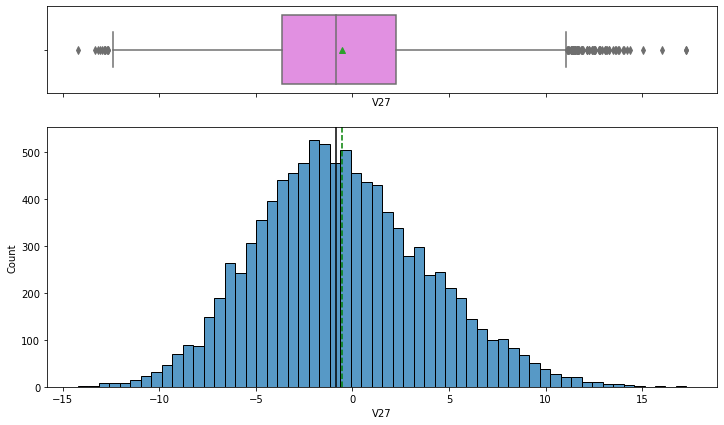

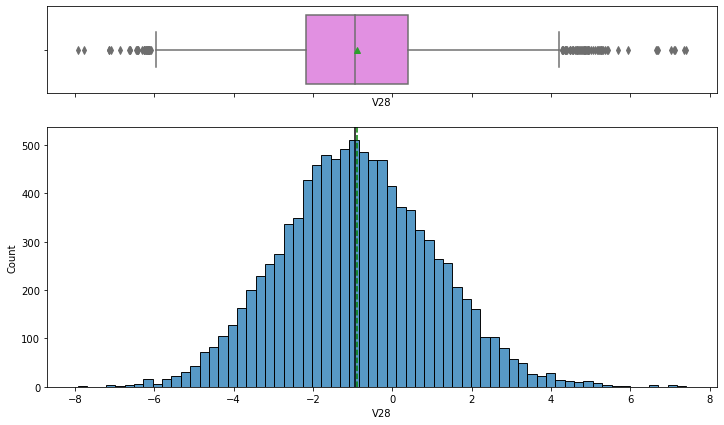

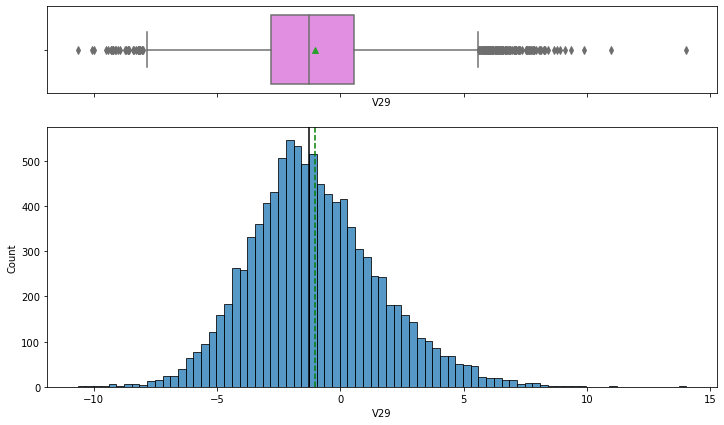

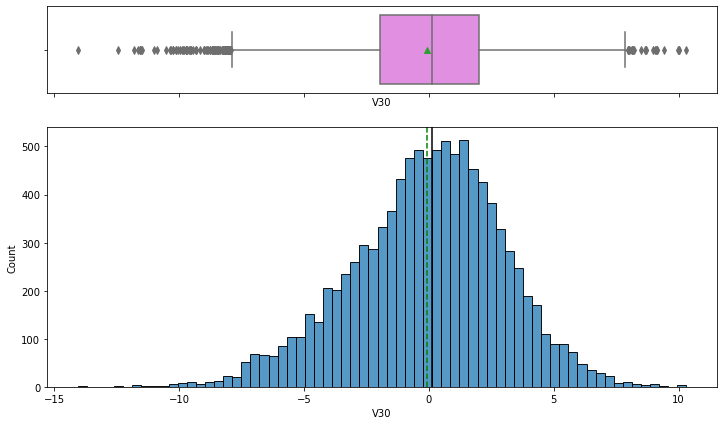

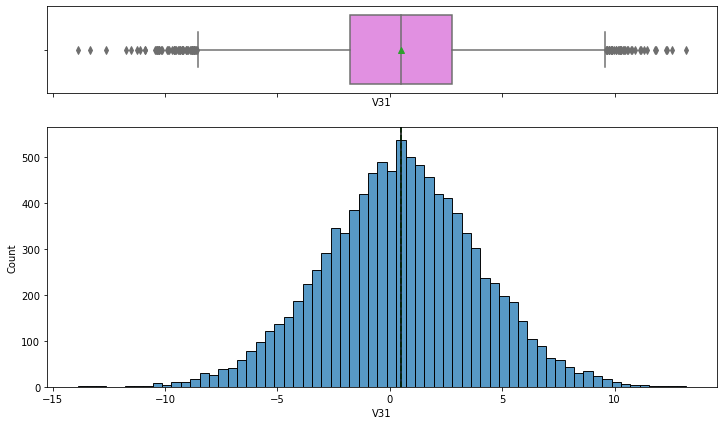

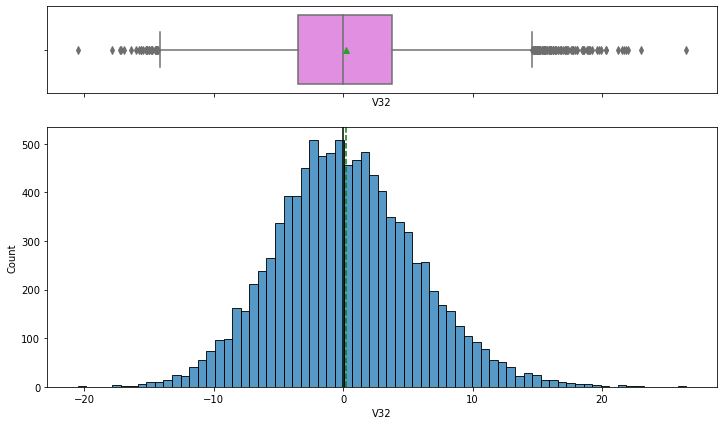

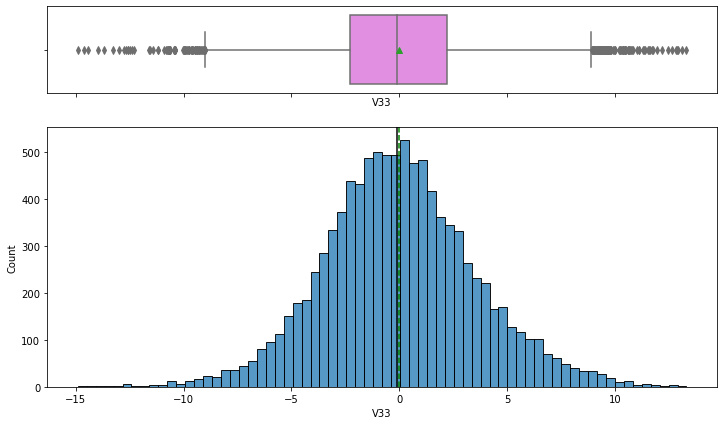

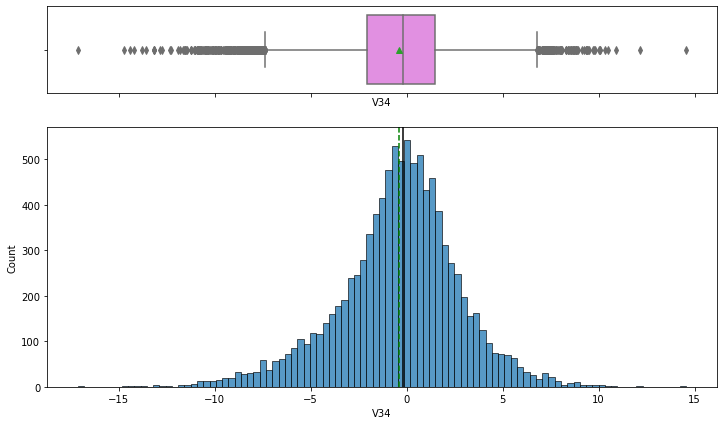

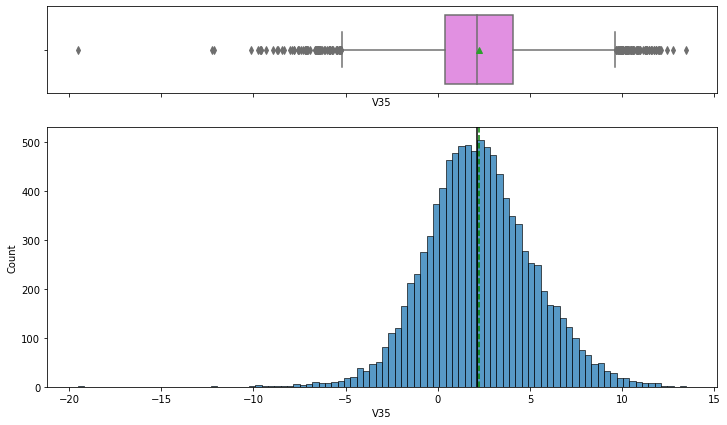

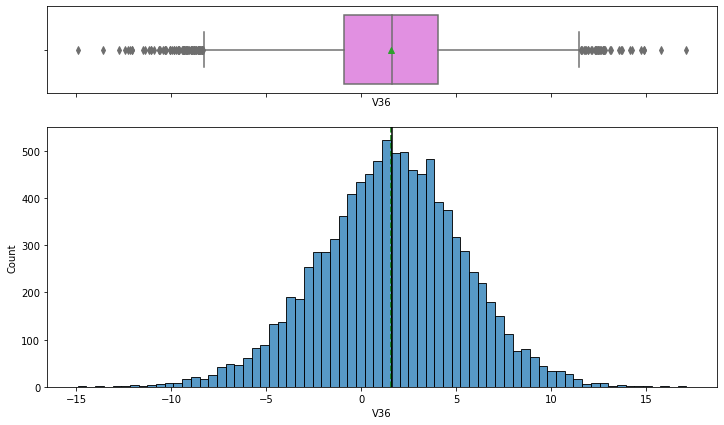

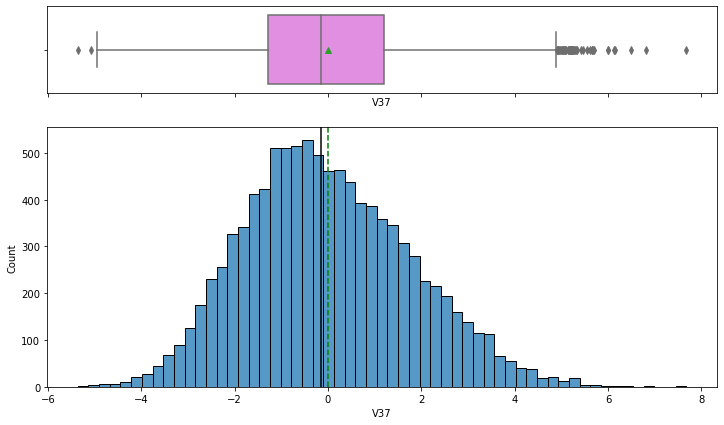

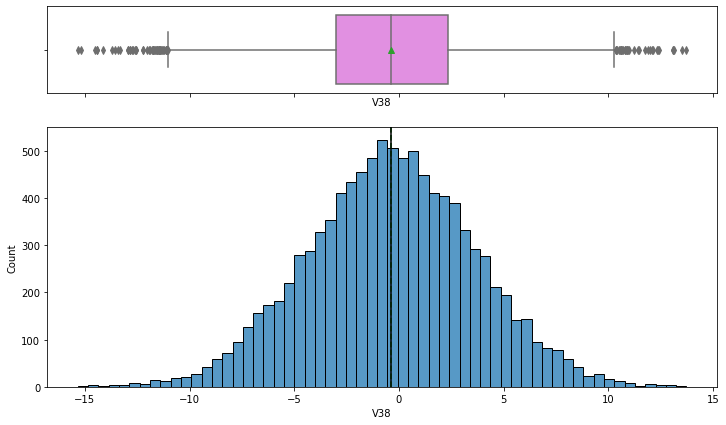

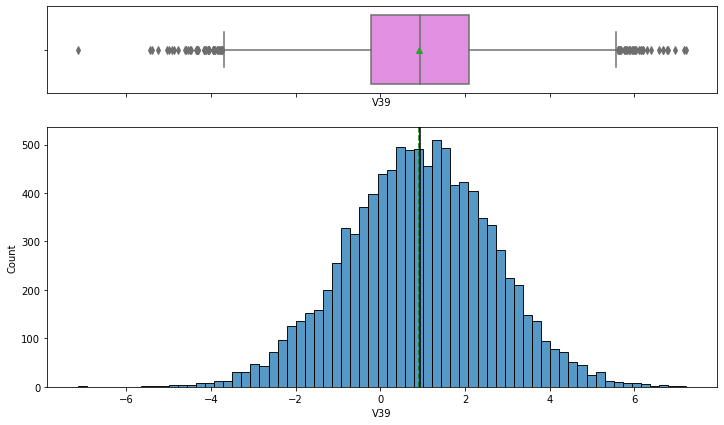

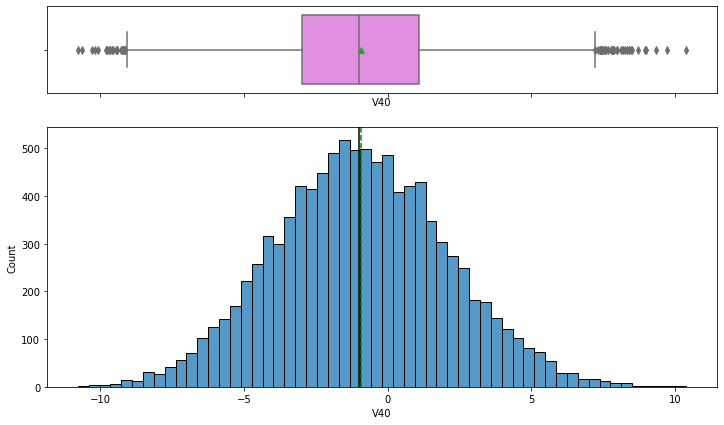

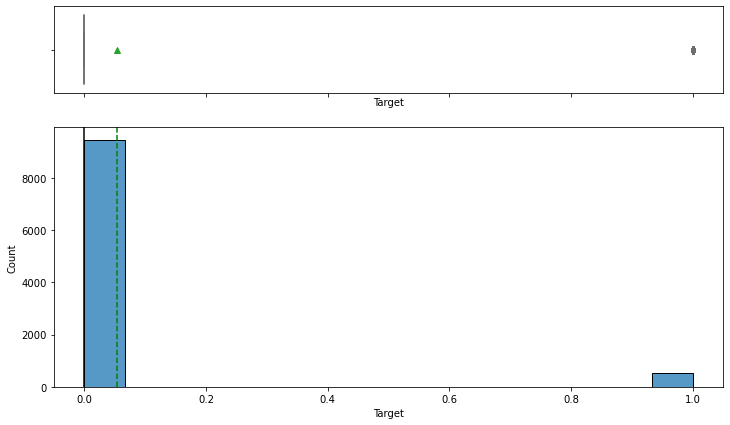

<IPython.core.display.Javascript object>

In [15]:
# creates histogram boxplot of each column in the test data set
for feature in df.columns:
    histogram_boxplot(test, feature, figsize=(12, 7), kde=False, bins=None)

#### Observations:
- All sensors/columns are normally distributed and require no log transformations.
- There is a bias for the Target column, there is a large pull towards 0 instead of 1.

In [16]:
def barplot_percentage(data, feature):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # total amount of points in feature

    plt.figure(
        figsize=(data[feature].nunique() + 1, 7)
    )  # creates plot size equal to amount of values in the x

    ax = sns.countplot(
        data=data, x=feature, palette="deep",
    )  # histplot for given data and feature

    for p in ax.patches:
        label = "{:.2f}%".format(
            100 * (p.get_height() / total)
        )  # creates label for percentage of bar

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=18,
            xytext=(0, 7),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # shows plot

<IPython.core.display.Javascript object>

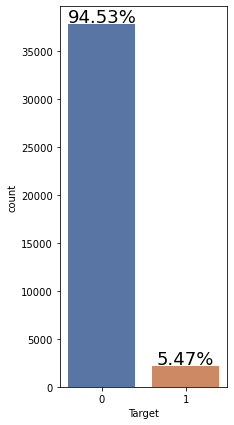

<IPython.core.display.Javascript object>

In [17]:
# shows percentage of Target split in train data
barplot_percentage(train, "Target")

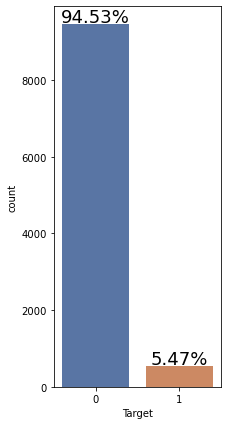

<IPython.core.display.Javascript object>

In [18]:
# shows percentage of Target split in test data
barplot_percentage(test, "Target")

### Heat Map Correlation Plot

####  Train Set:

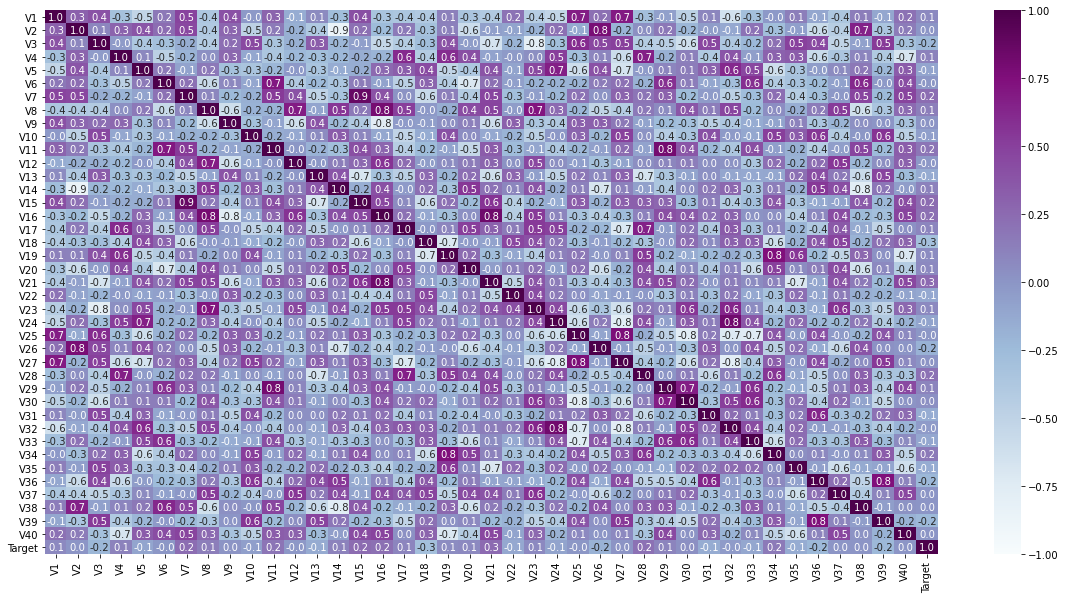

<IPython.core.display.Javascript object>

In [19]:
plt.figure(figsize=(20, 10))  # sets size of heatmap
sns.heatmap(
    data=train.corr(), annot=True, fmt=".1f", vmin=-1, vmax=1, cmap="BuPu"
)  # creates heatmap of correlation in the train data set
plt.show()

####  Test Set:

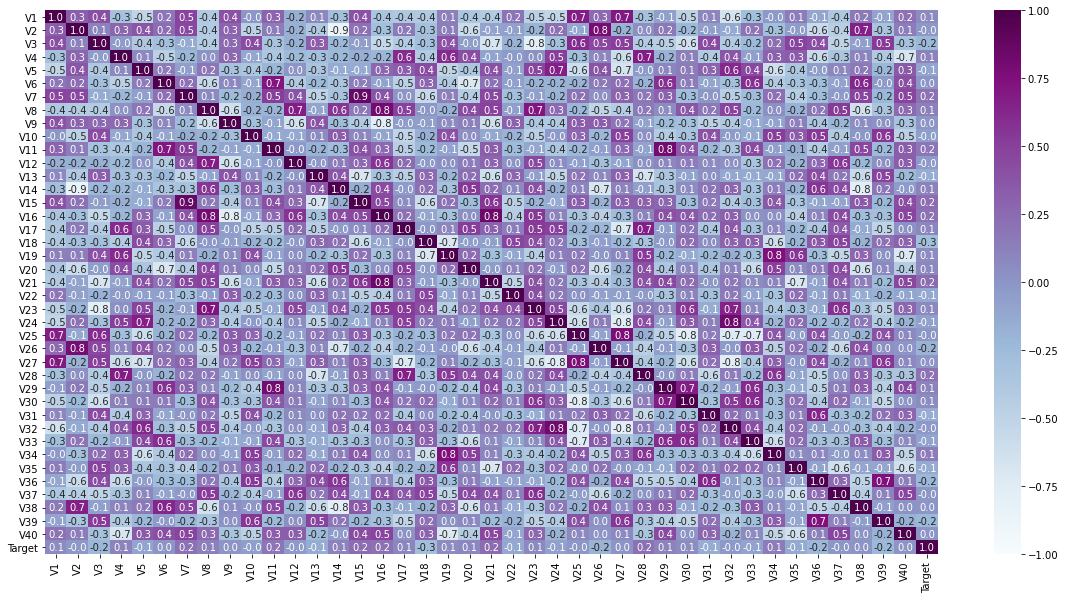

<IPython.core.display.Javascript object>

In [20]:
plt.figure(figsize=(20, 10))  # sets size of heatmap
sns.heatmap(
    data=test.corr(), annot=True, fmt=".1f", vmin=-1, vmax=1, cmap="BuPu"
)  # creates heatmap of correlation in the test data set
plt.show()

#### Observations:
- Target for both test and train set has a 95% bias towards 0 or "not failure"
- The coorelation plot for train and test set are almost identical to each other.
- The train and test dataset have been split almost perfectly since the EDA looks the same throughout each particular dataset.
- Heatmaps show that there is coorelation between the various different sensors.

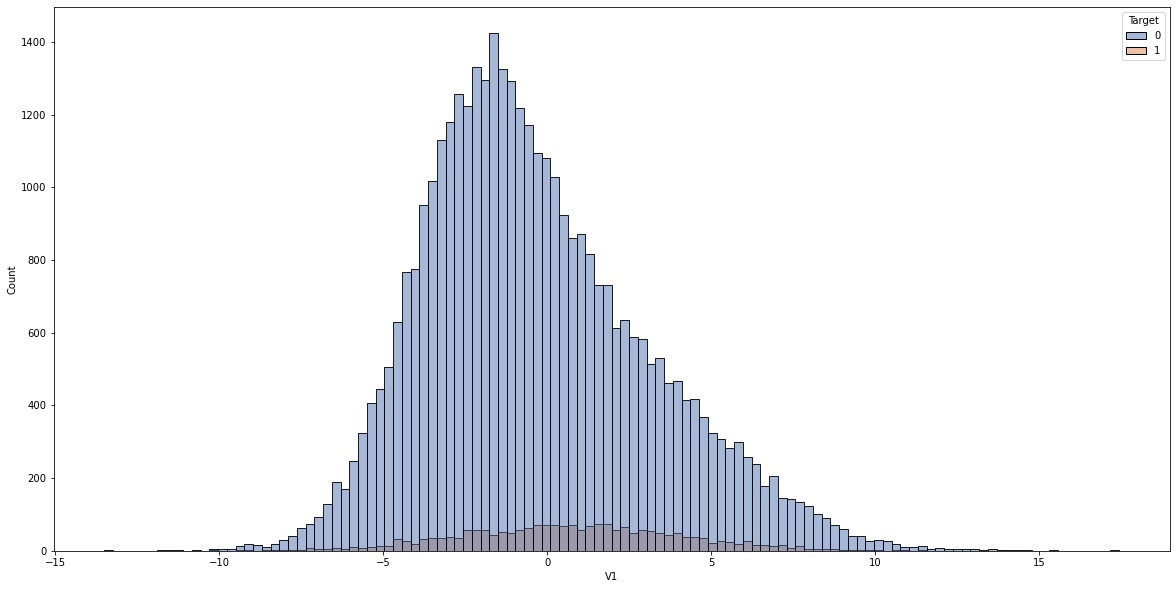

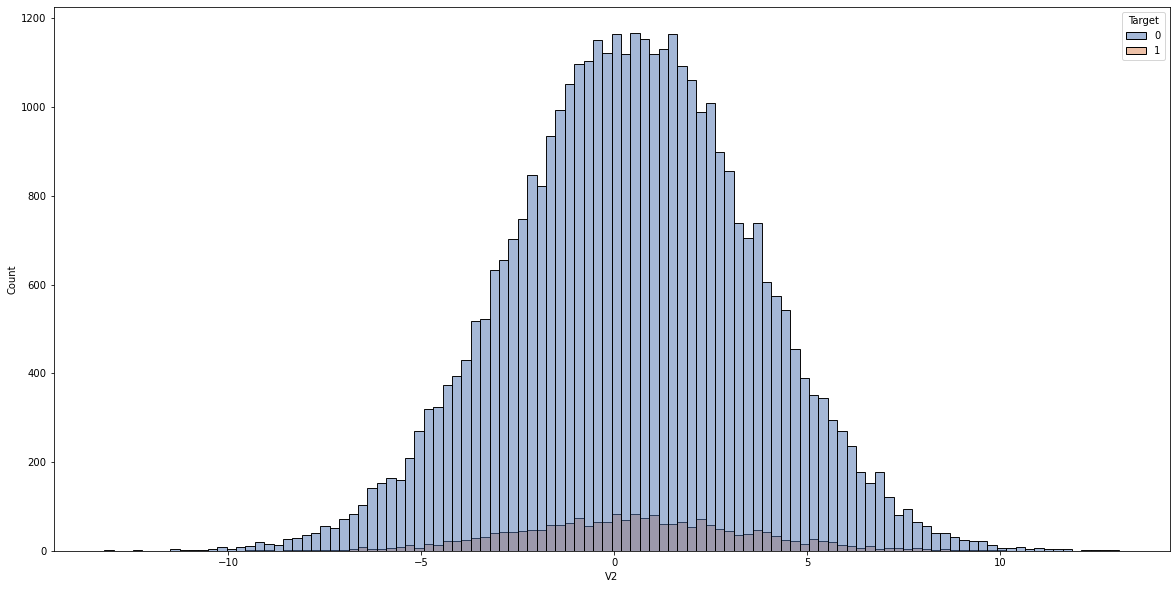

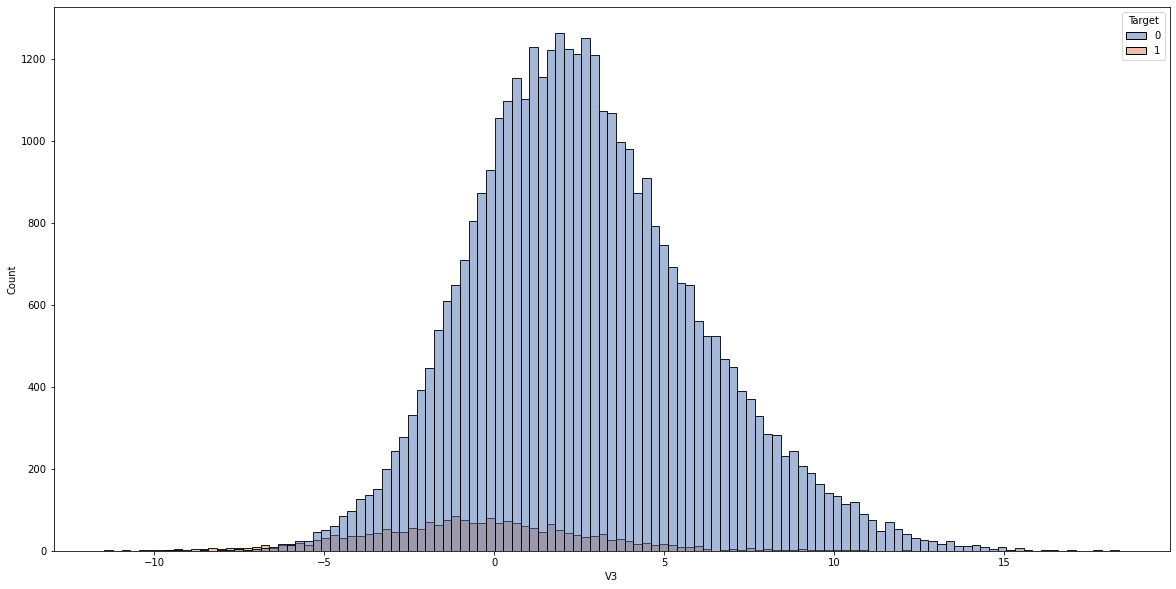

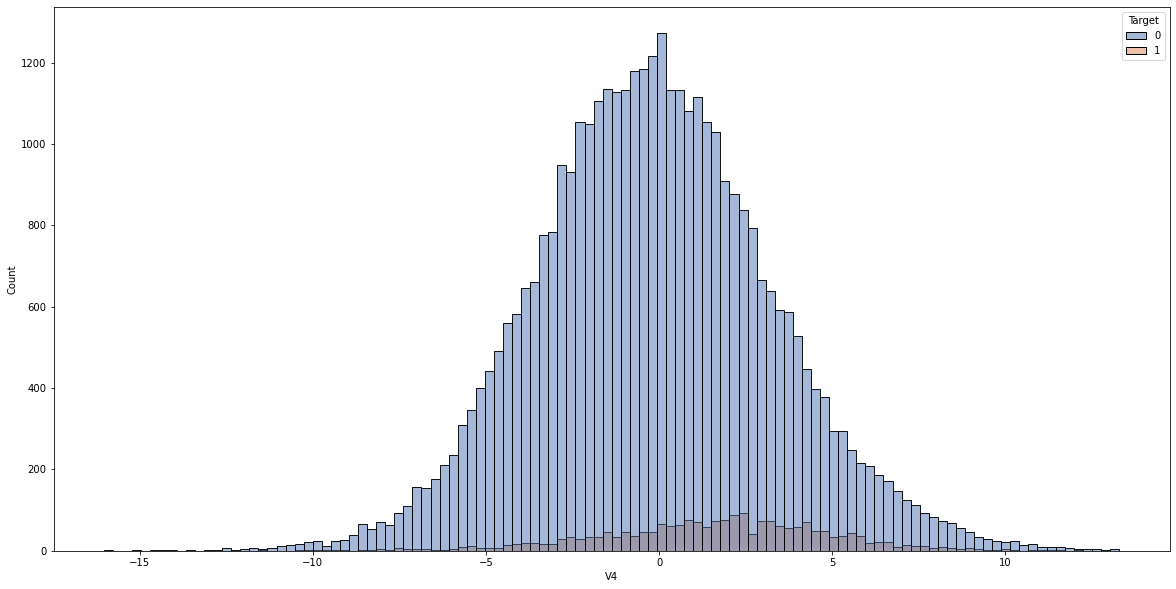

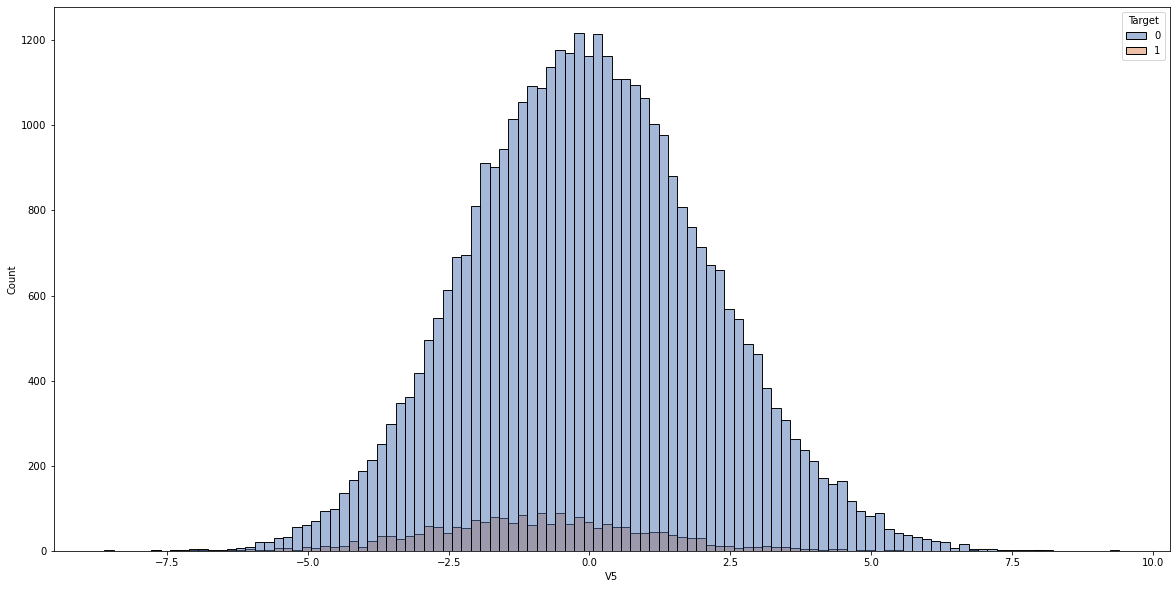

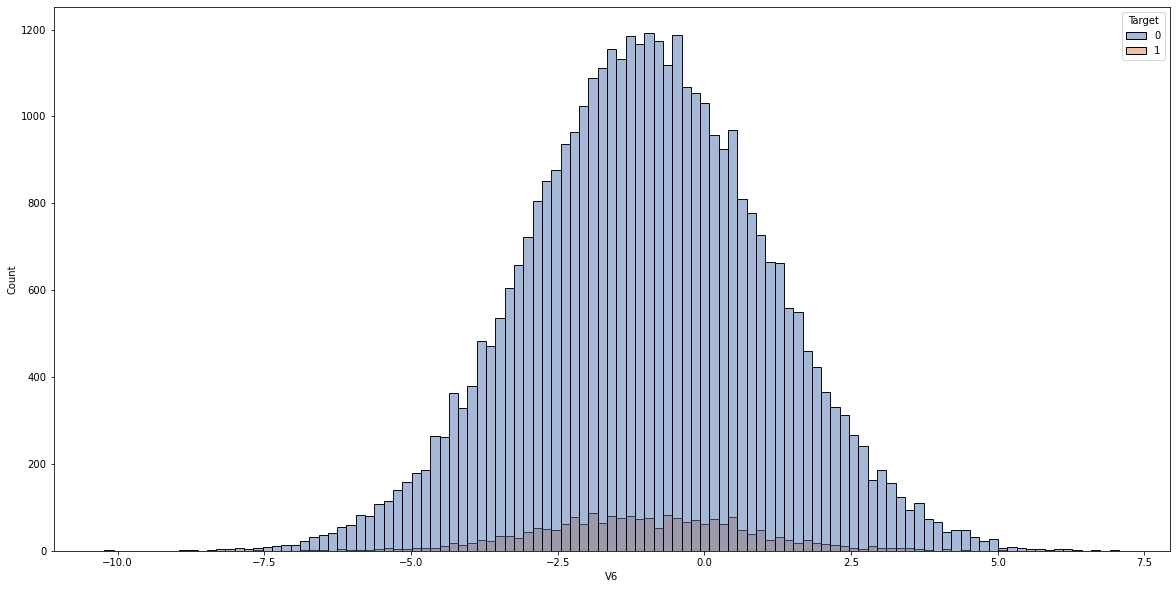

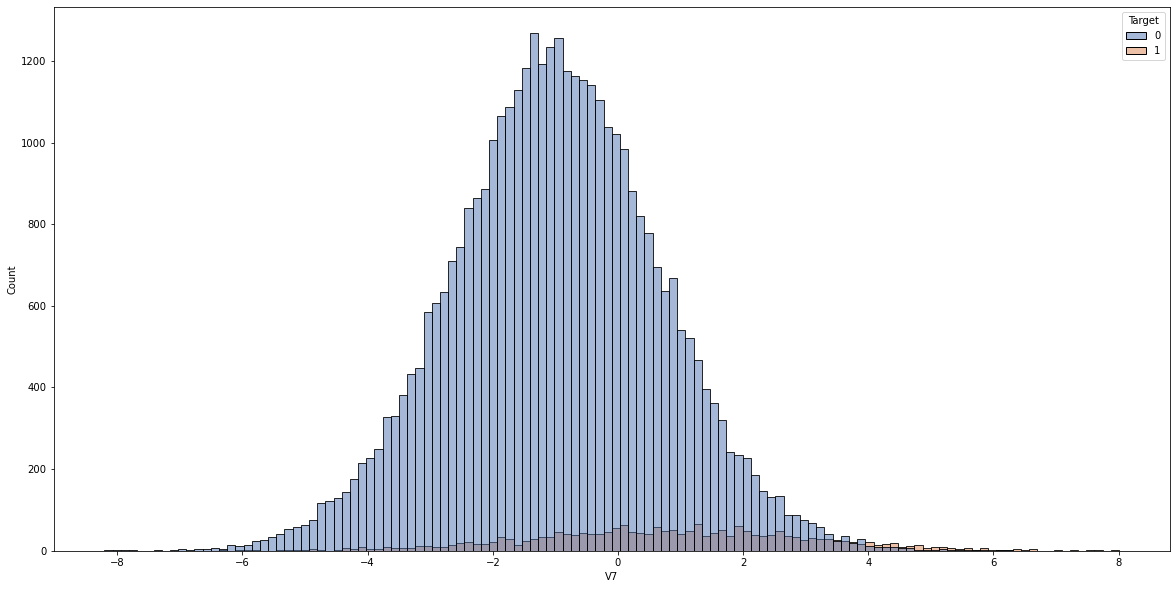

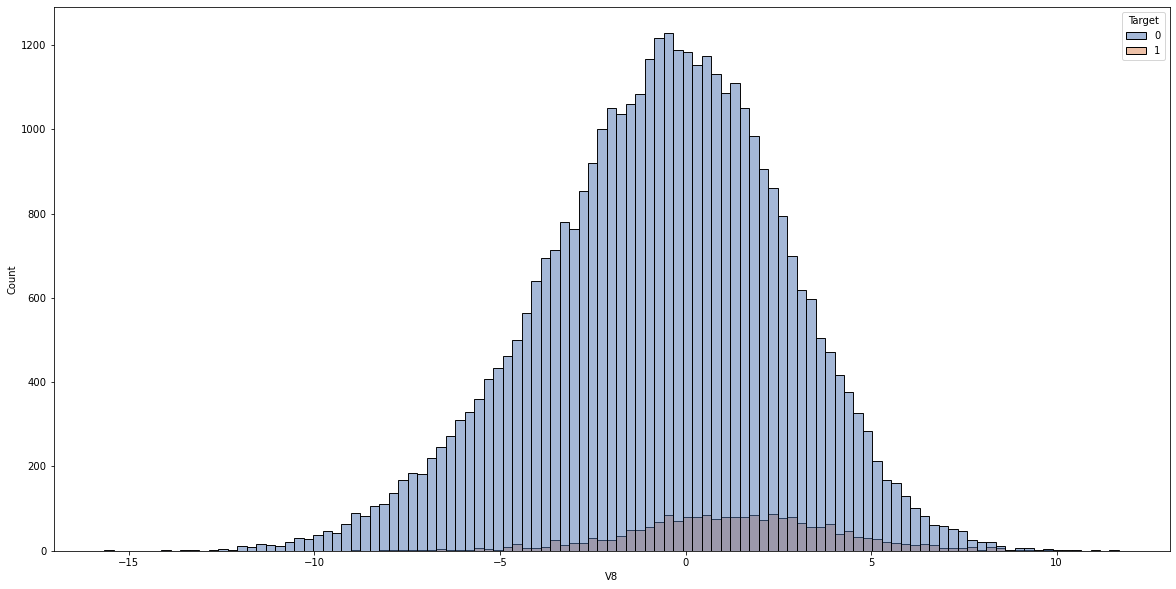

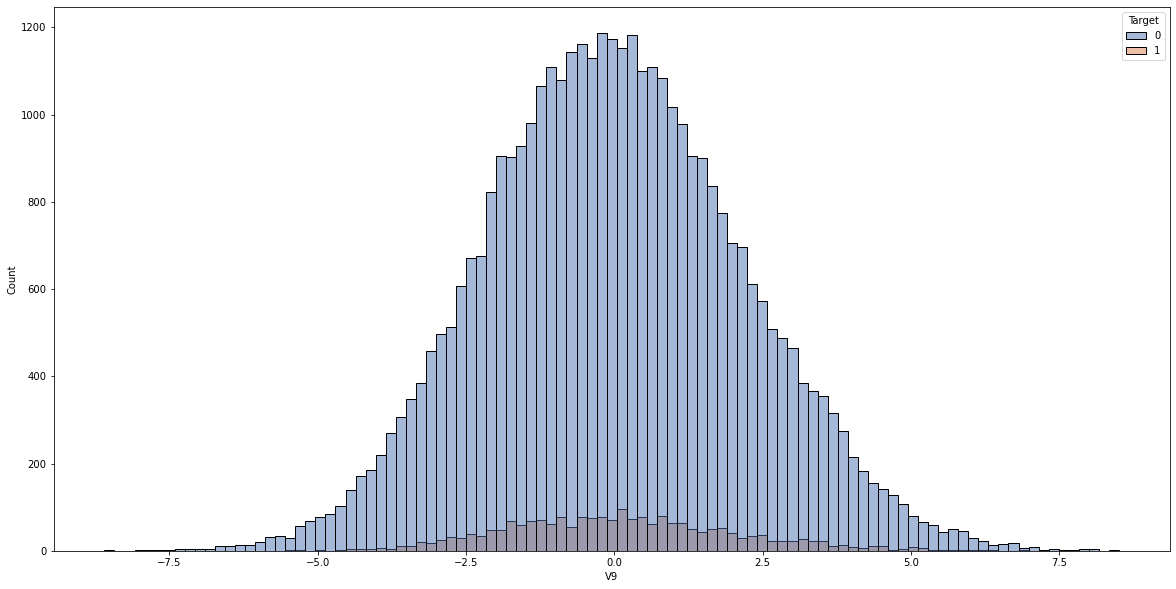

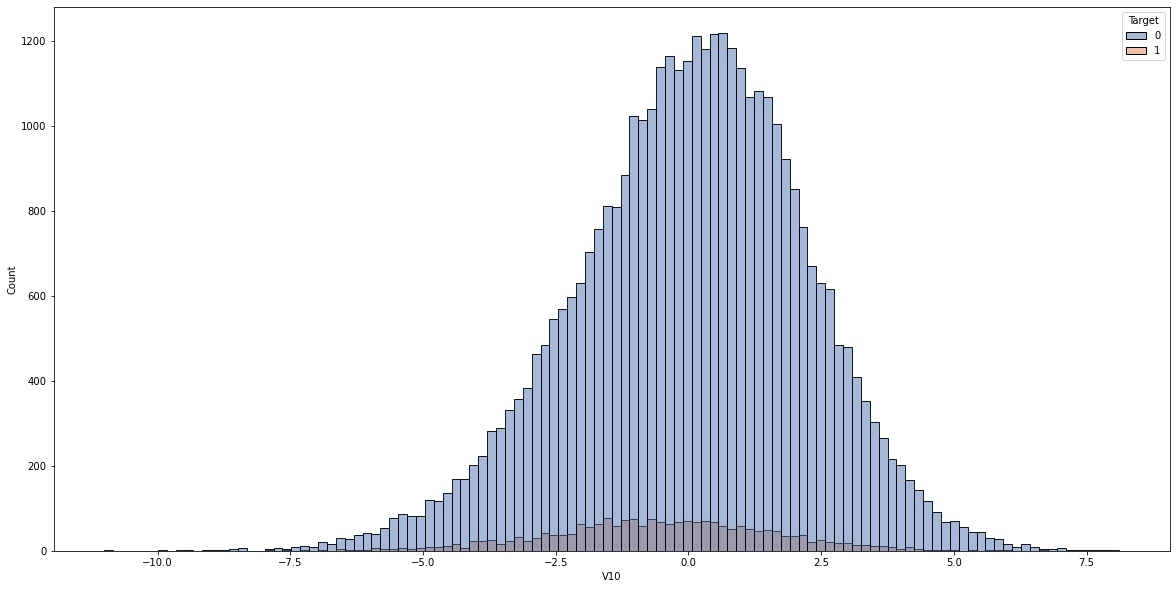

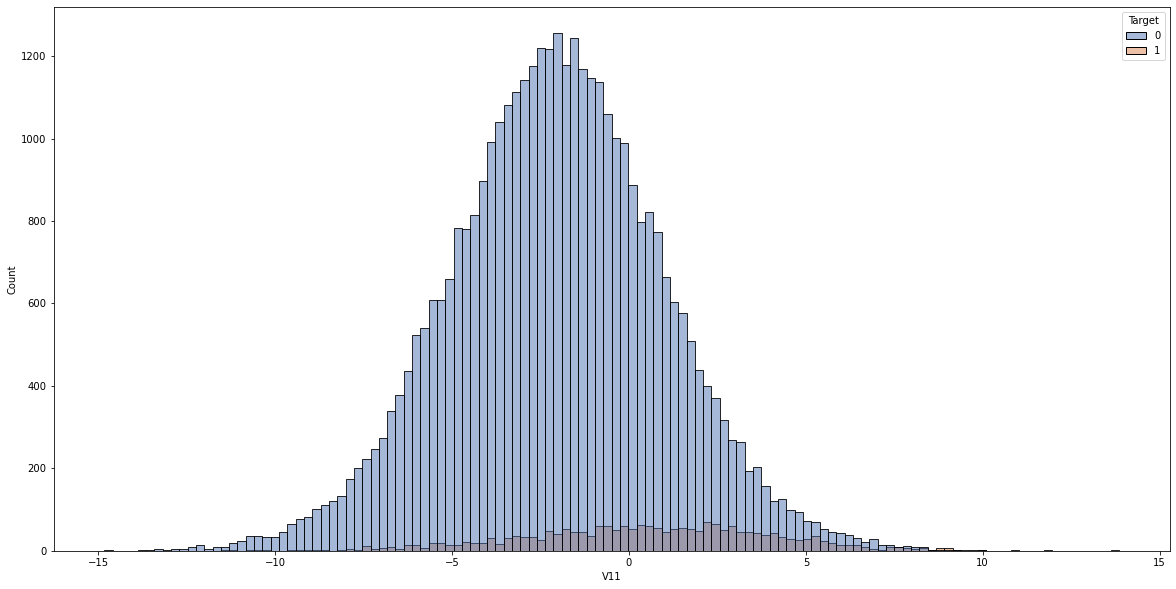

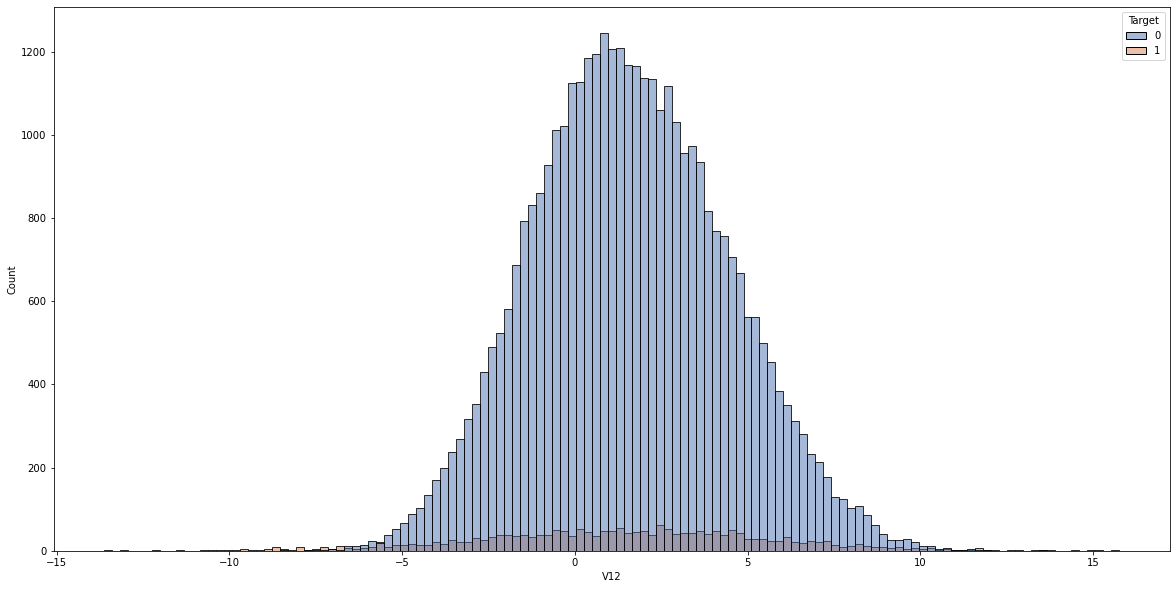

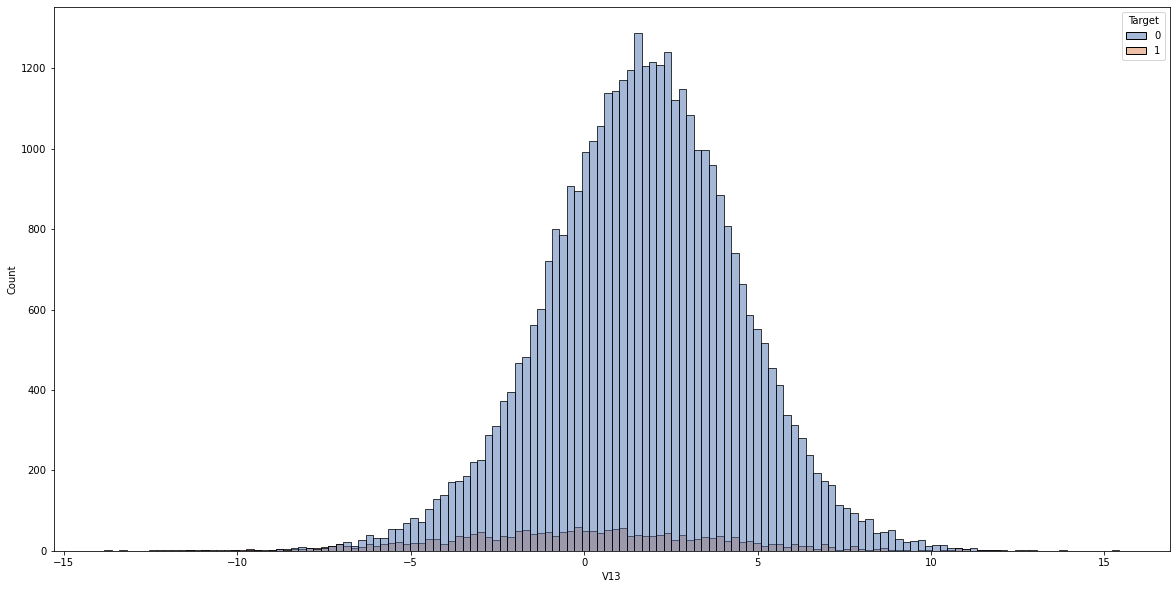

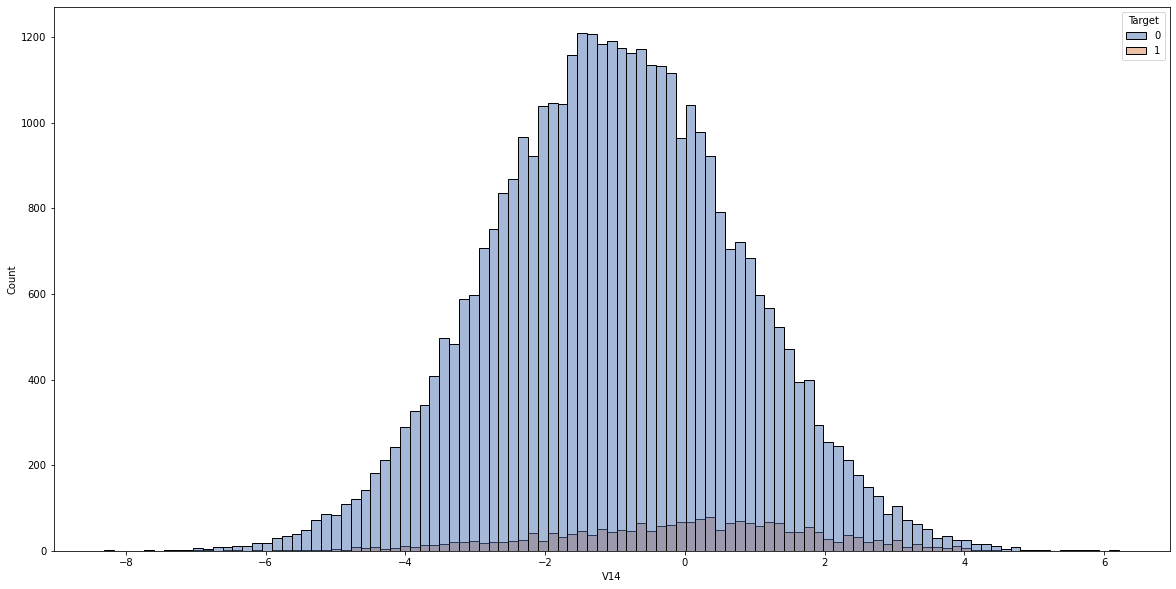

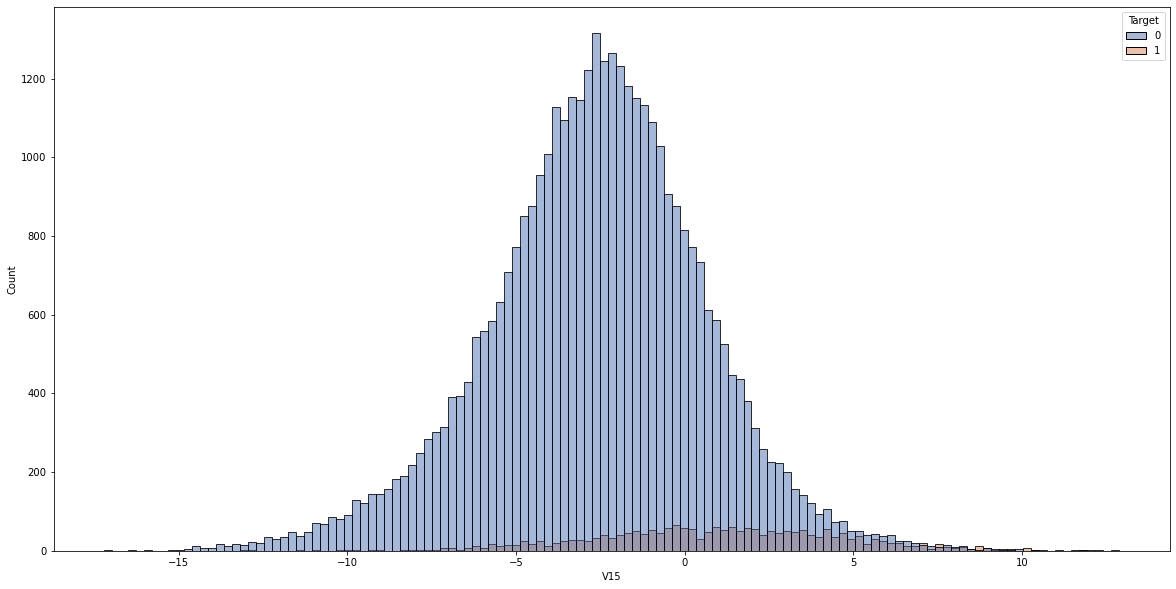

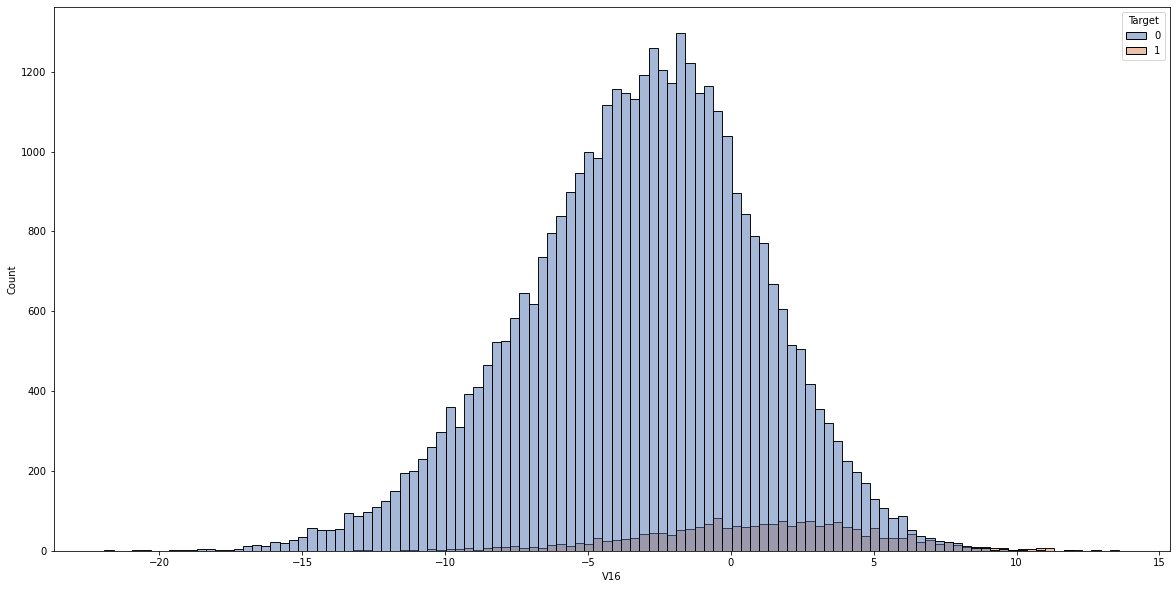

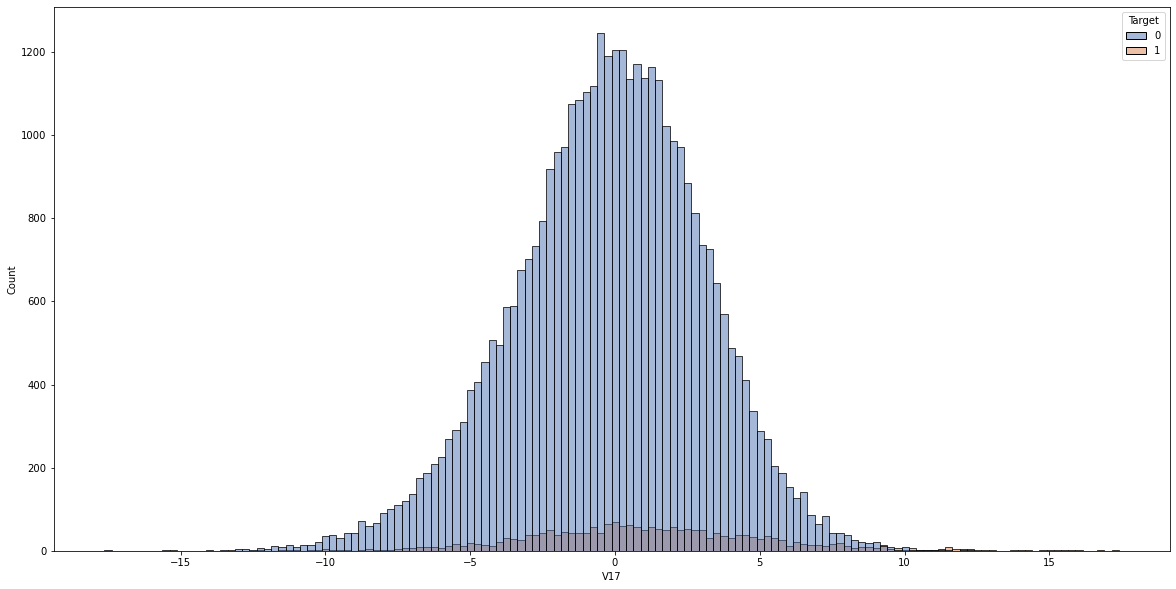

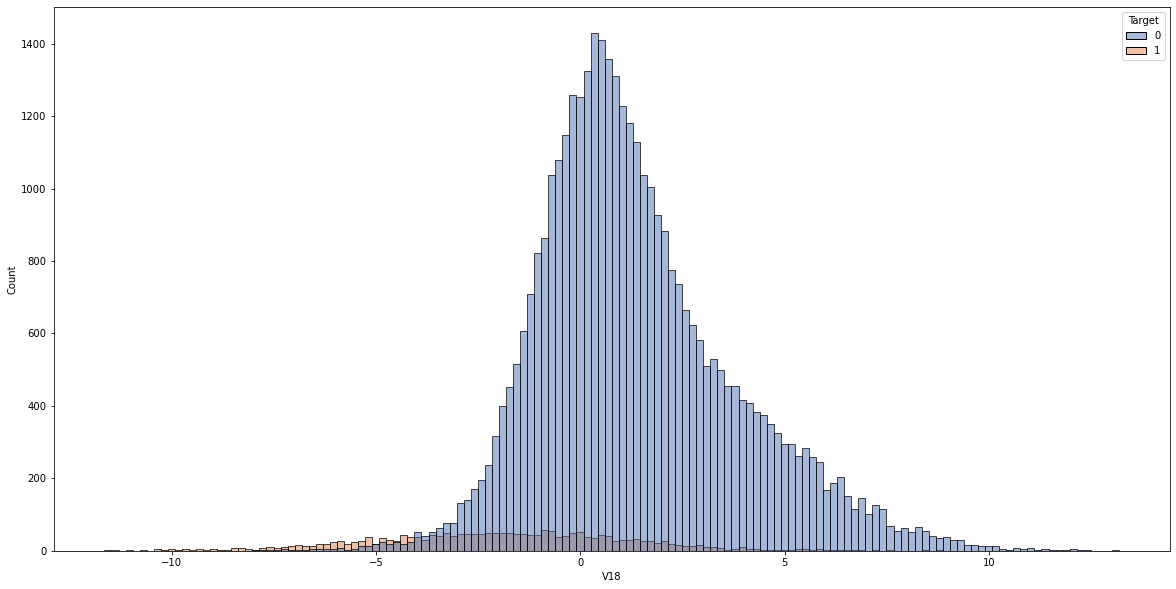

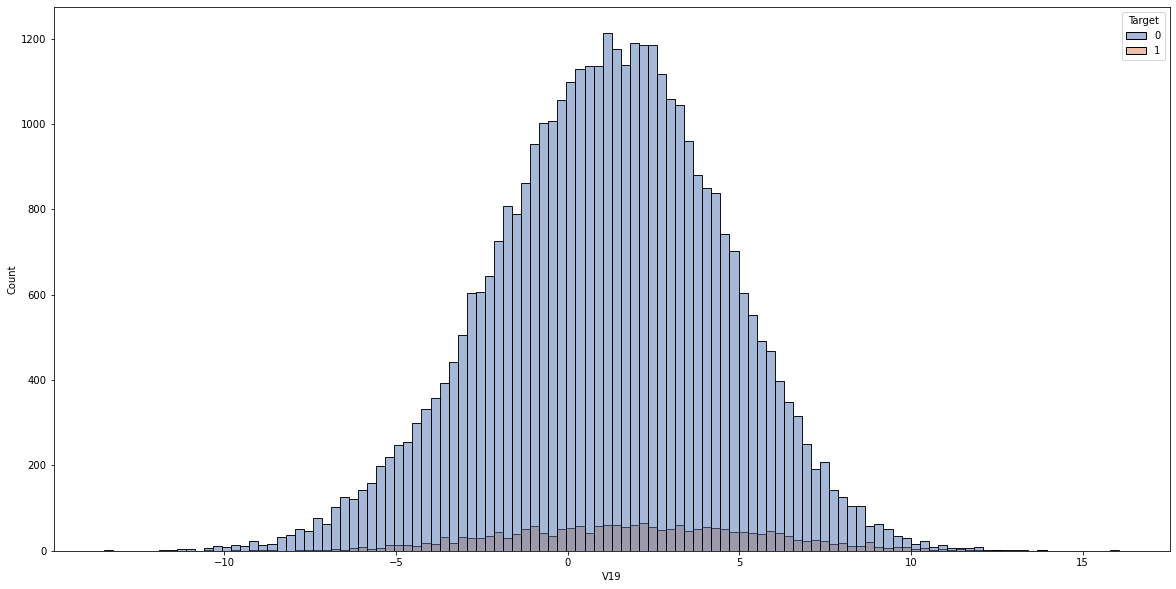

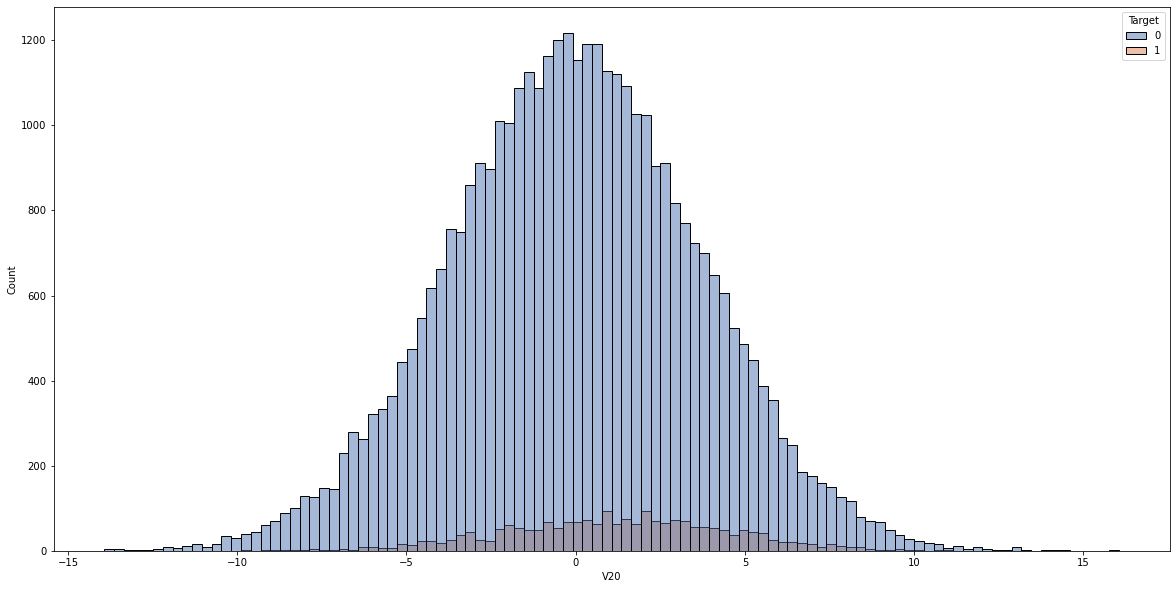

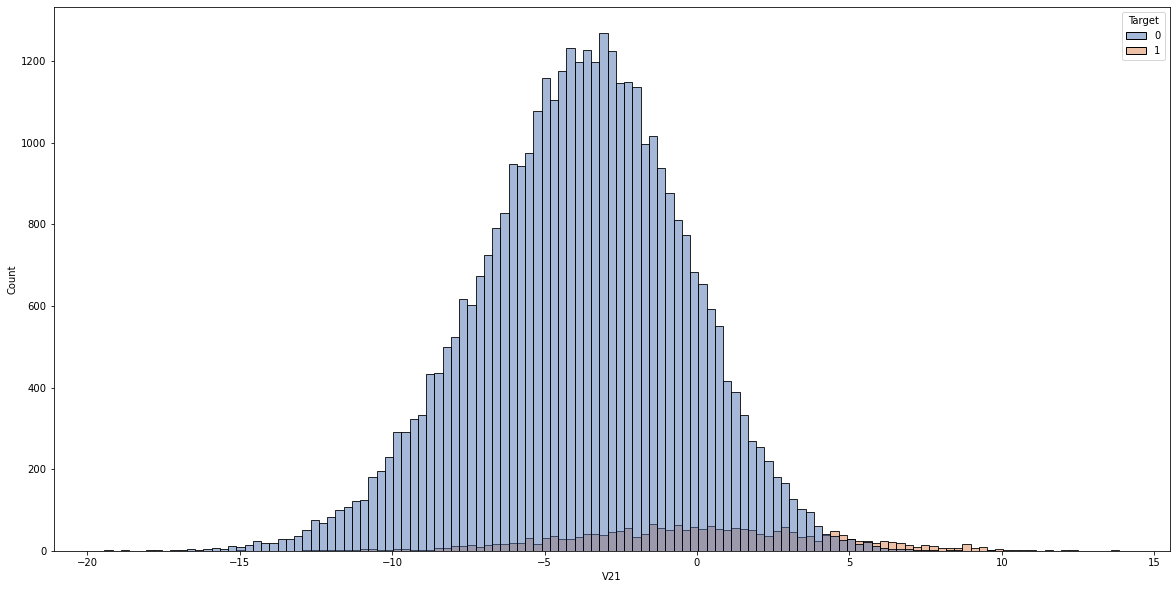

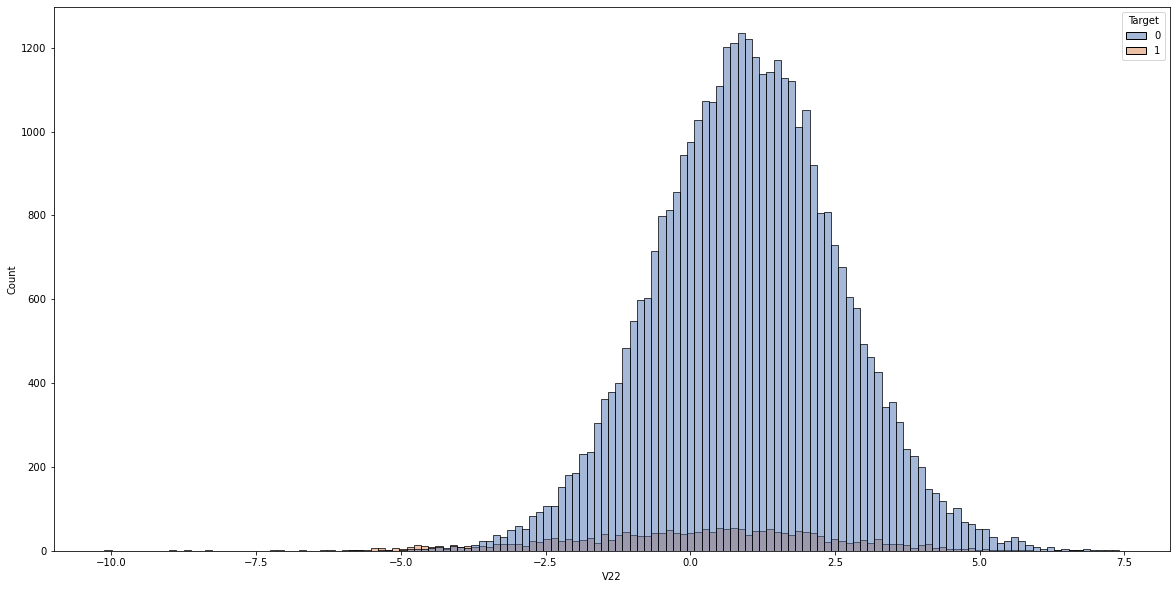

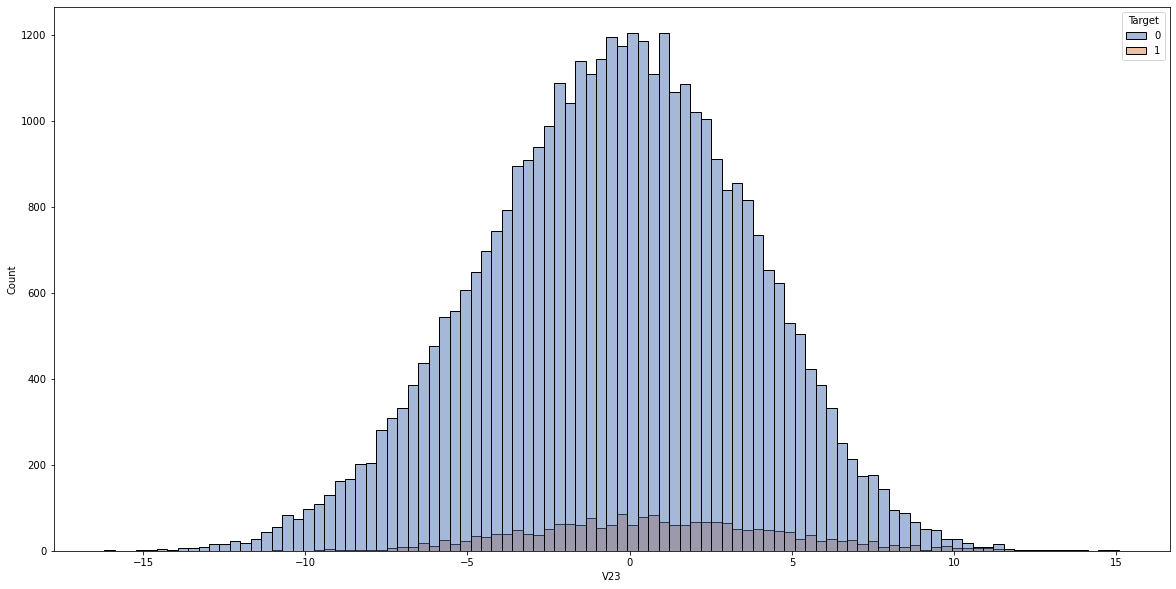

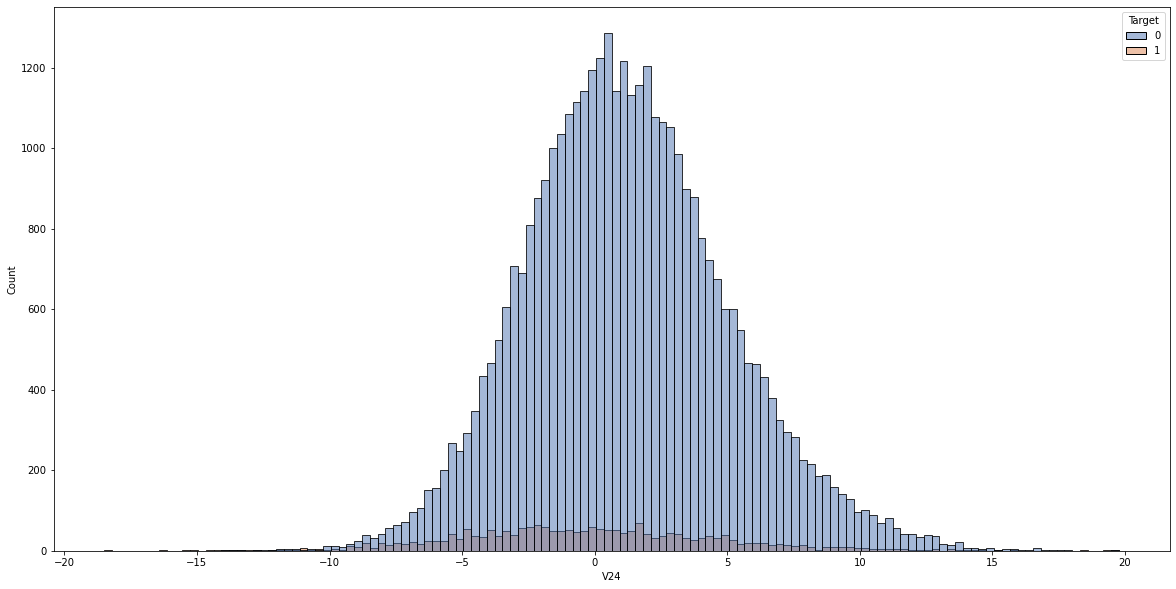

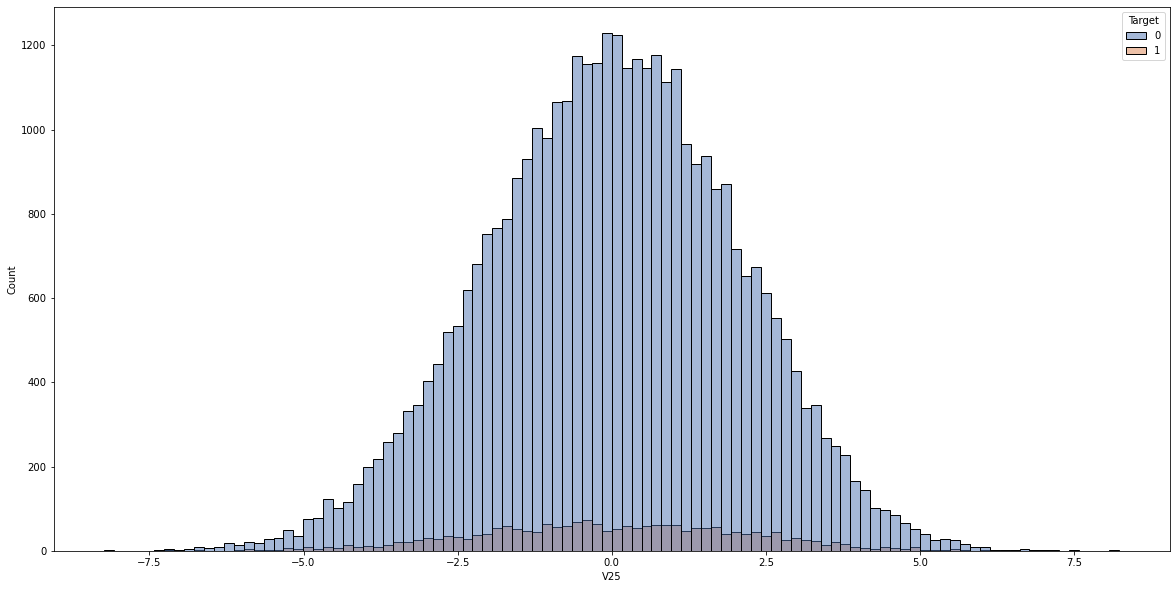

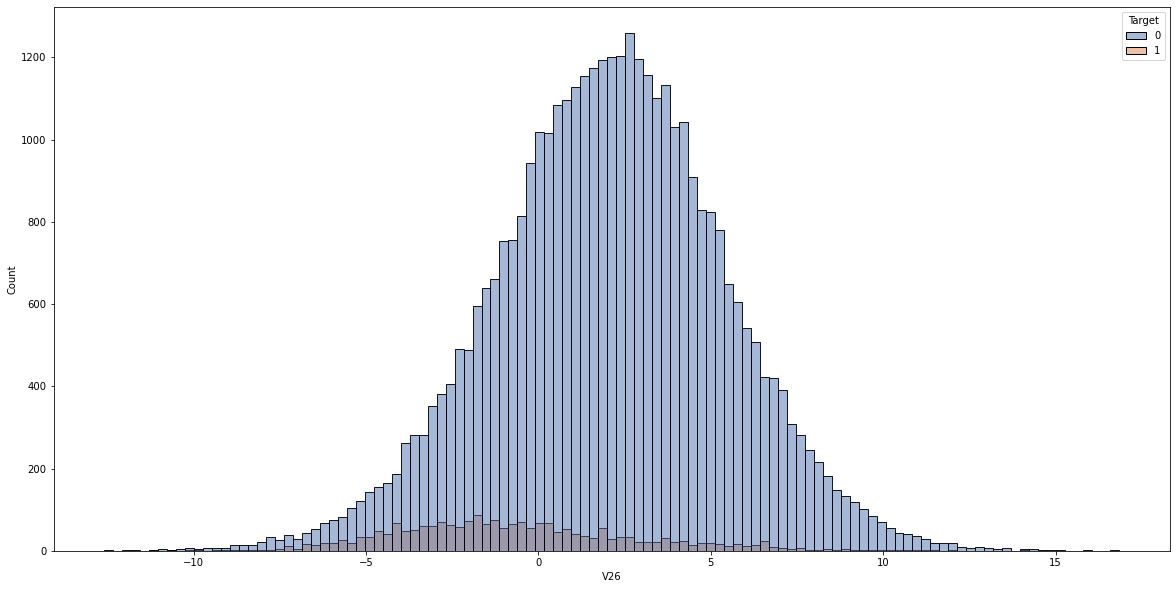

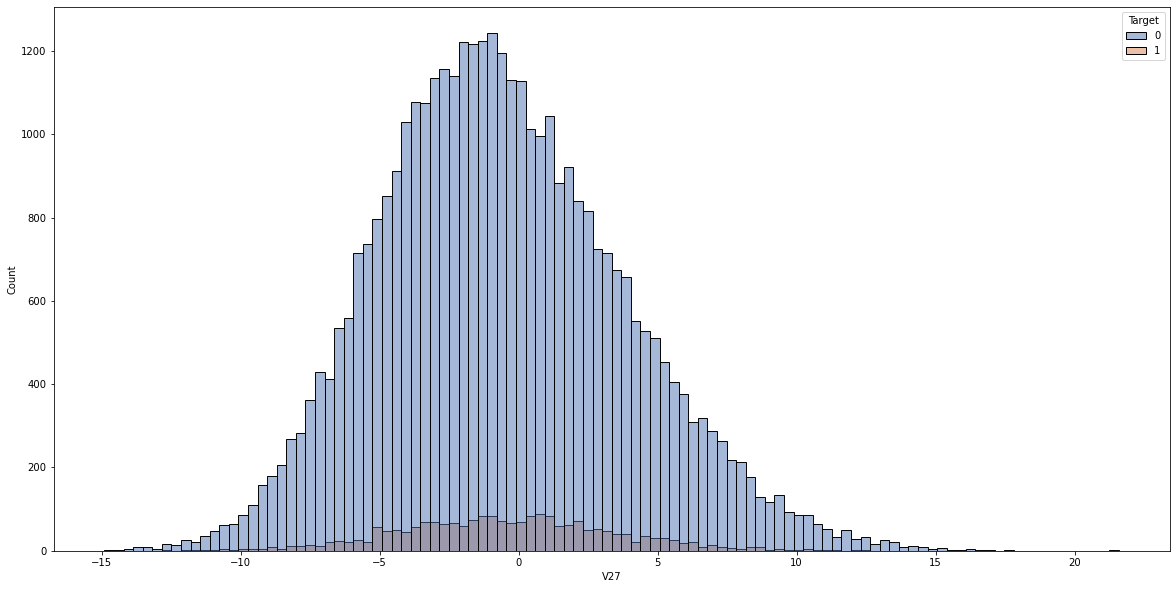

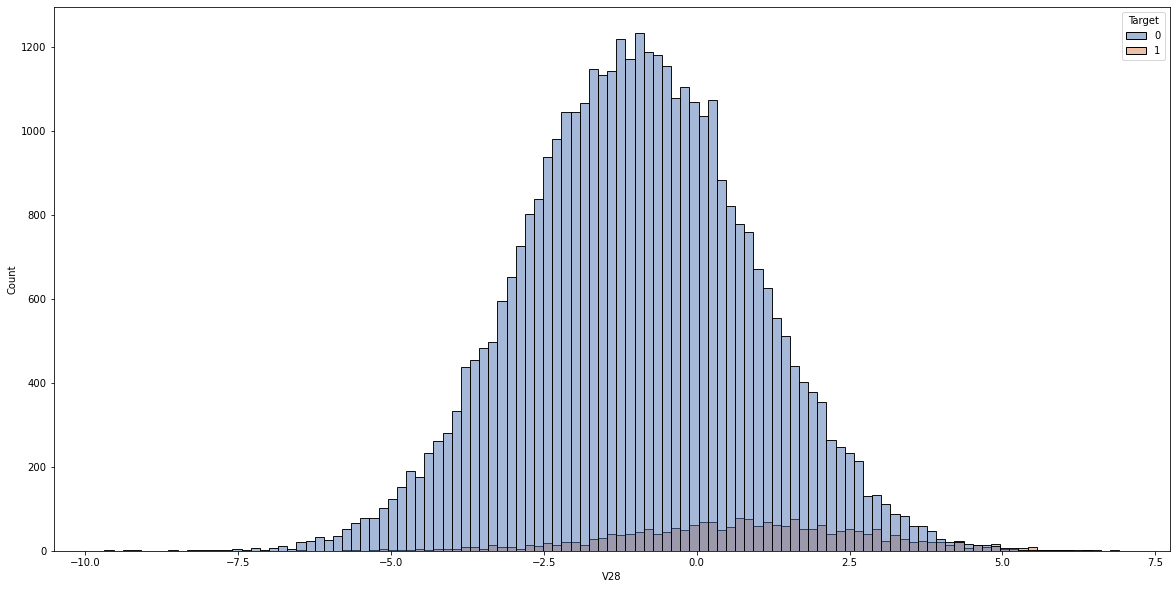

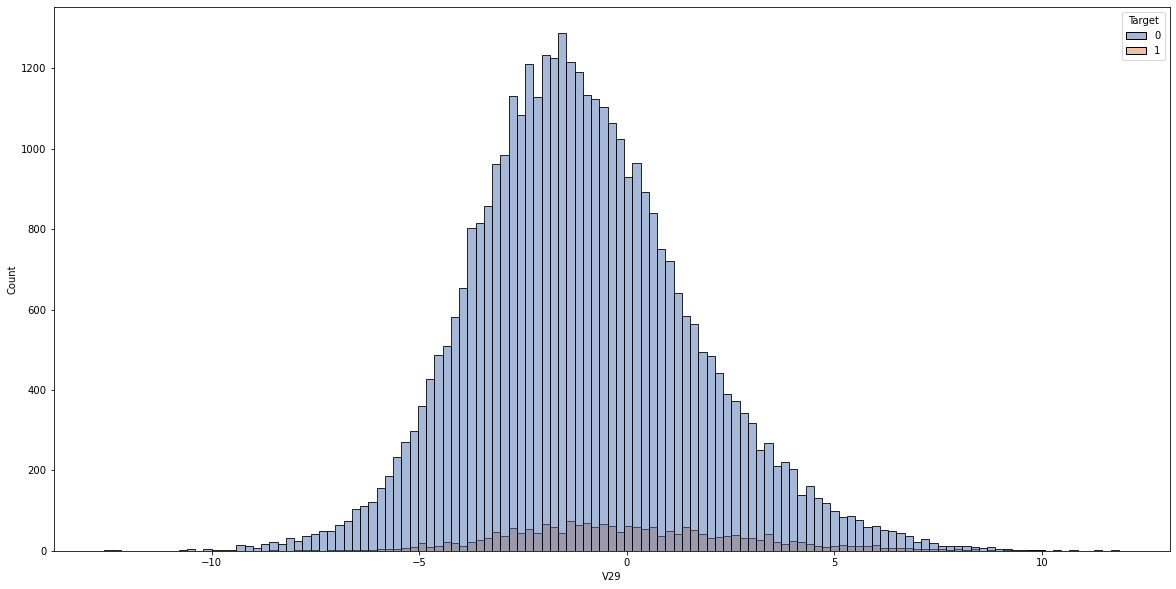

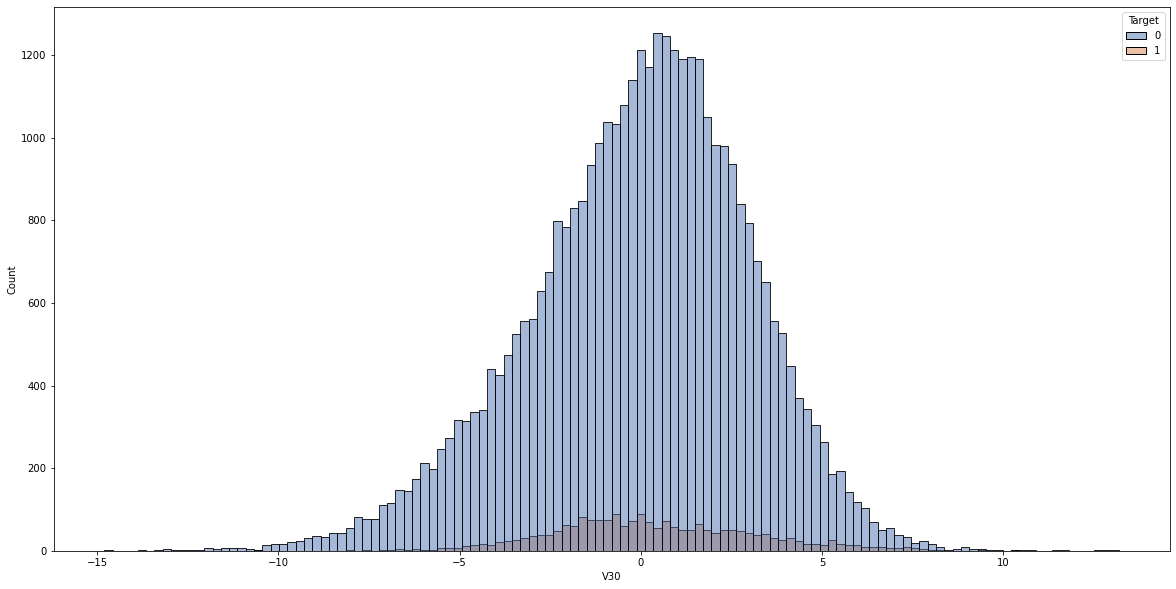

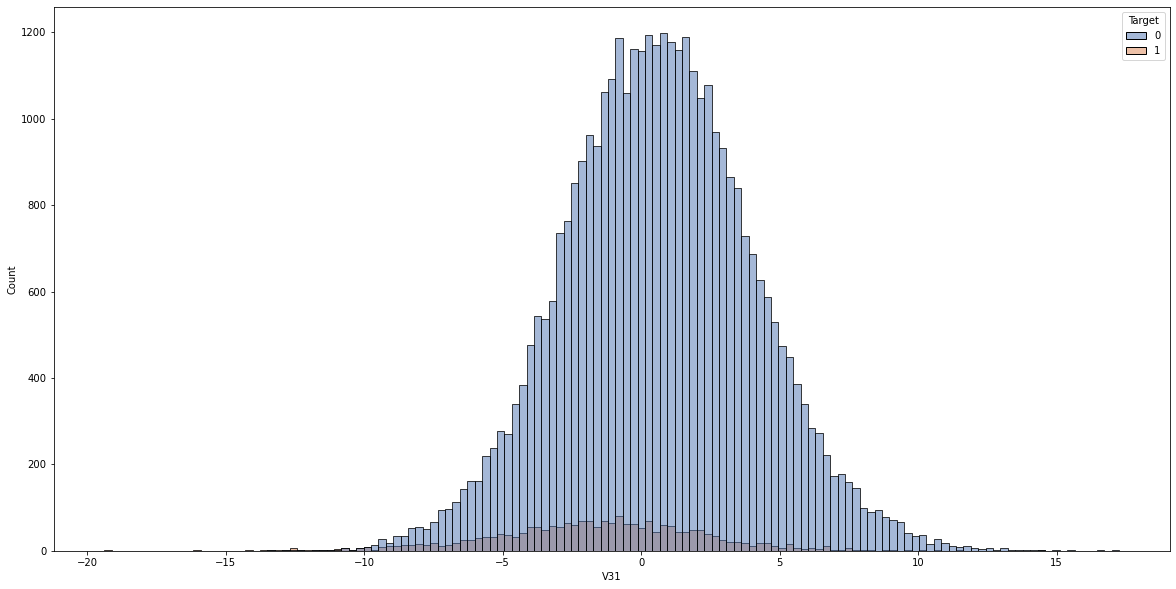

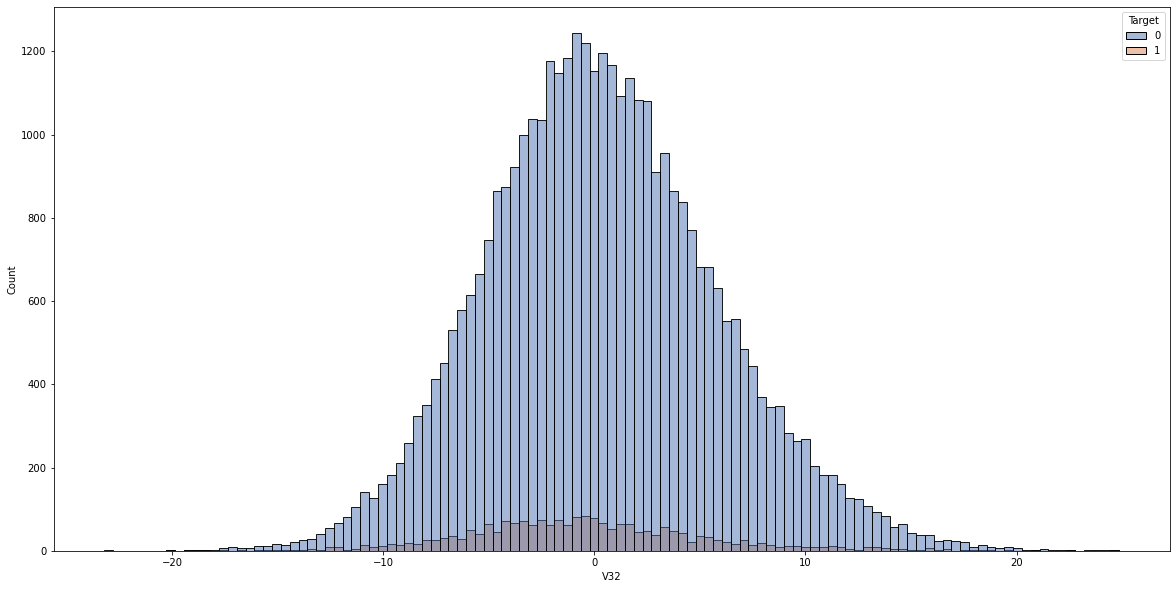

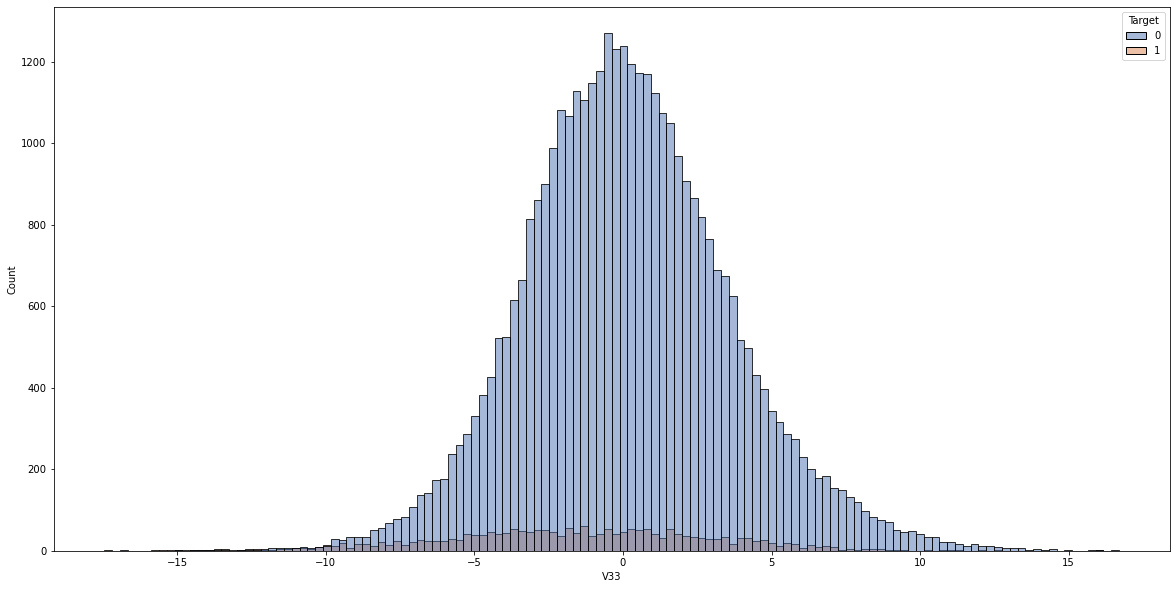

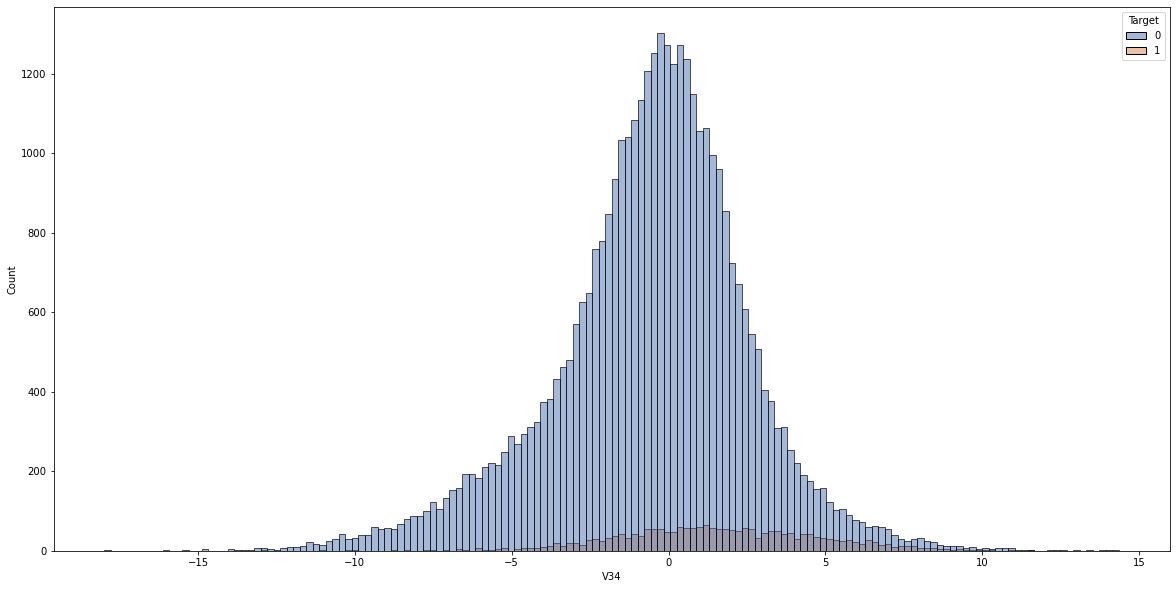

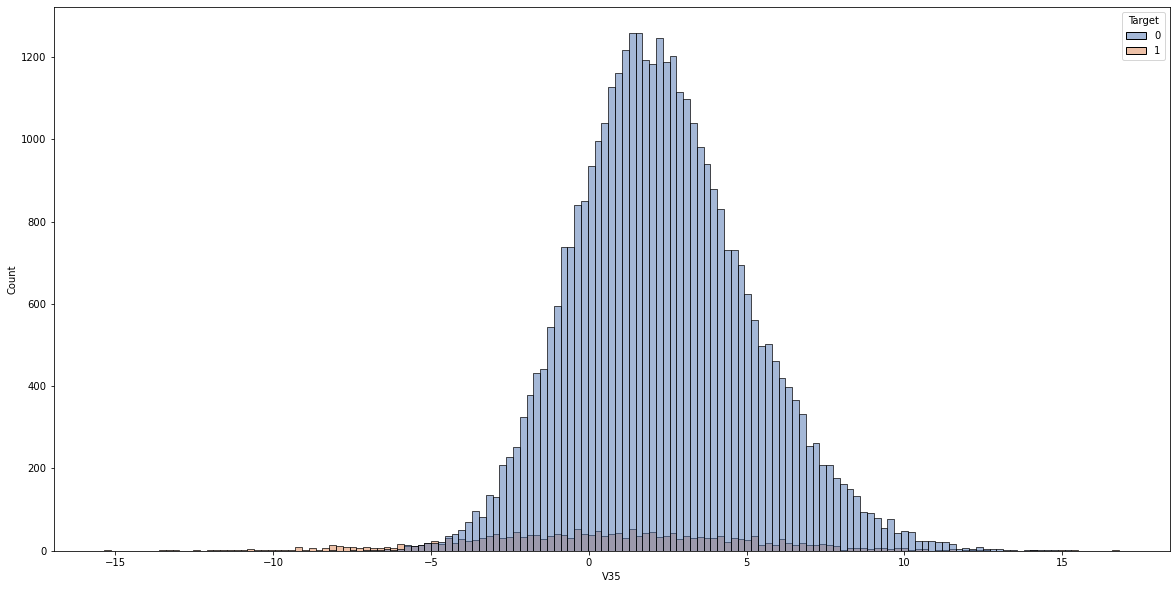

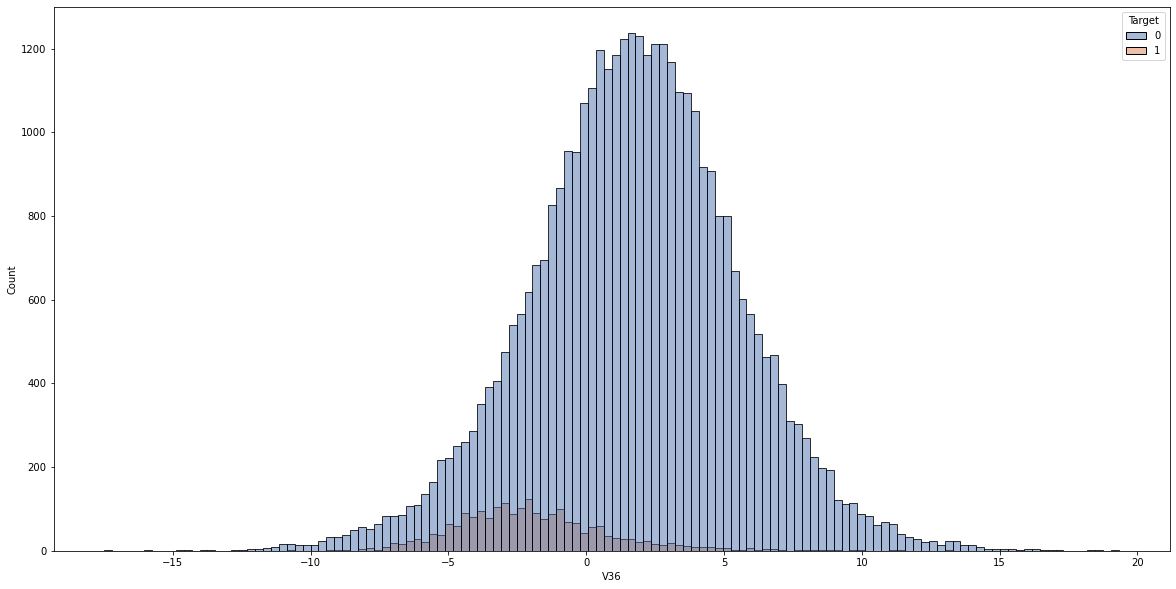

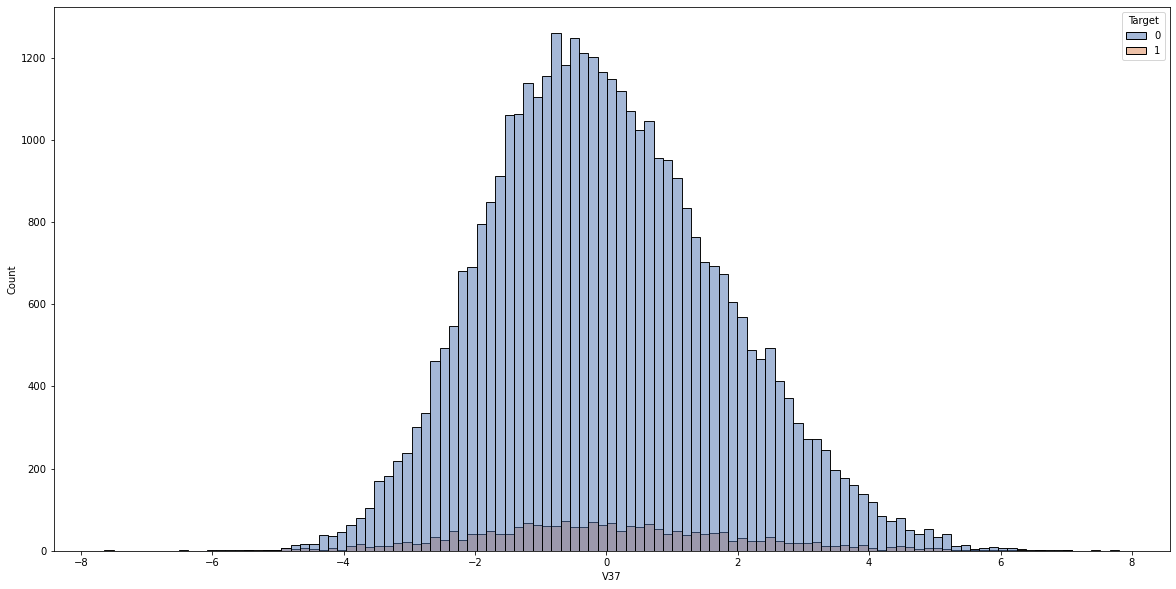

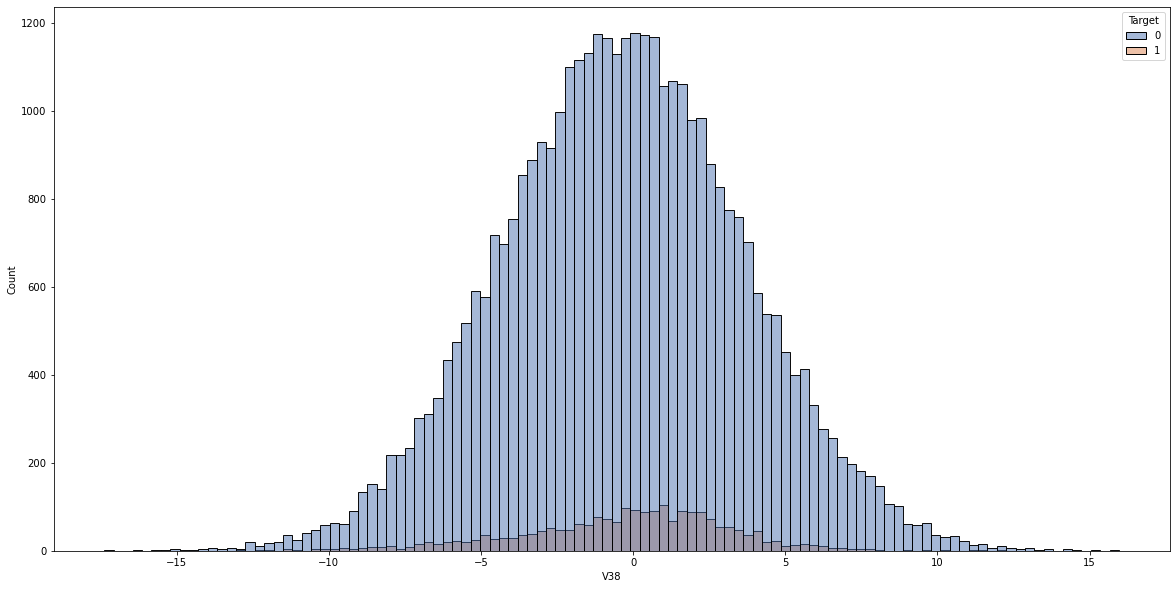

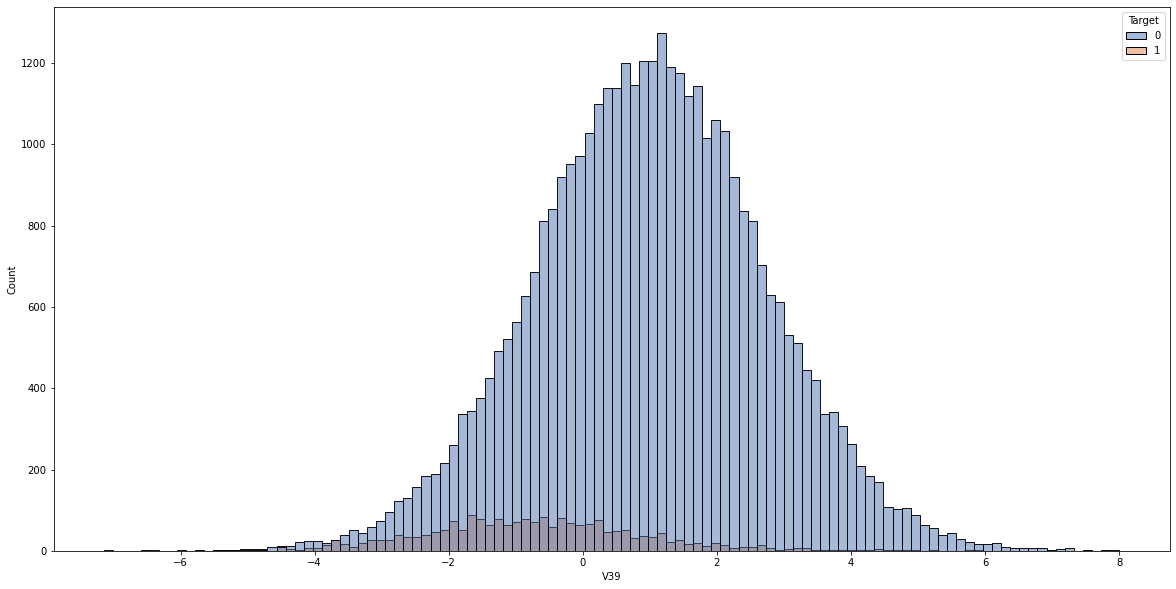

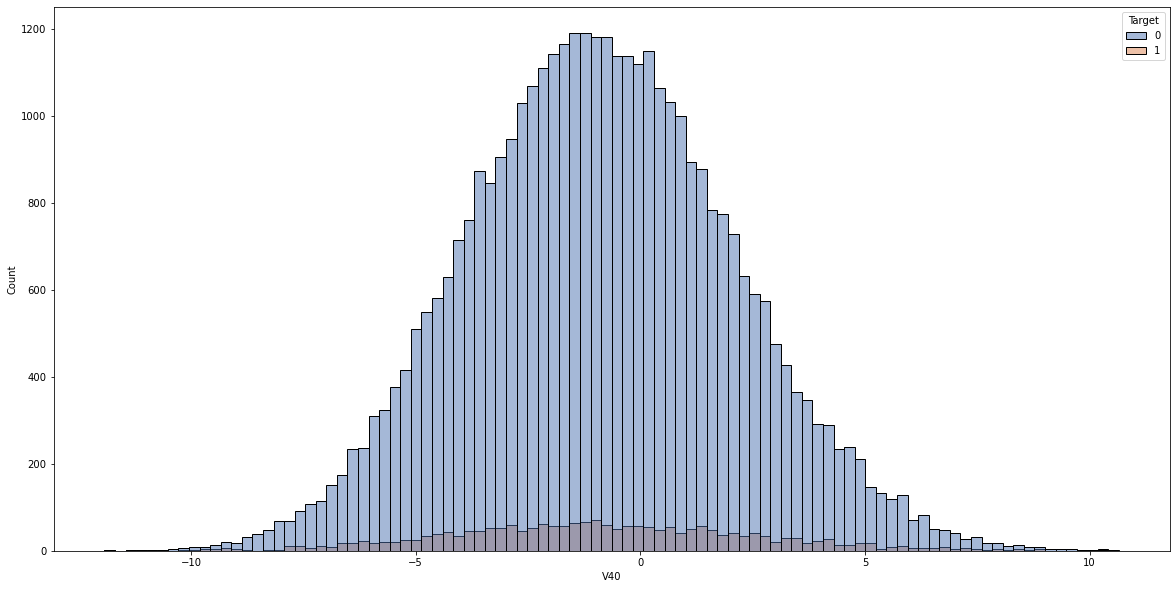

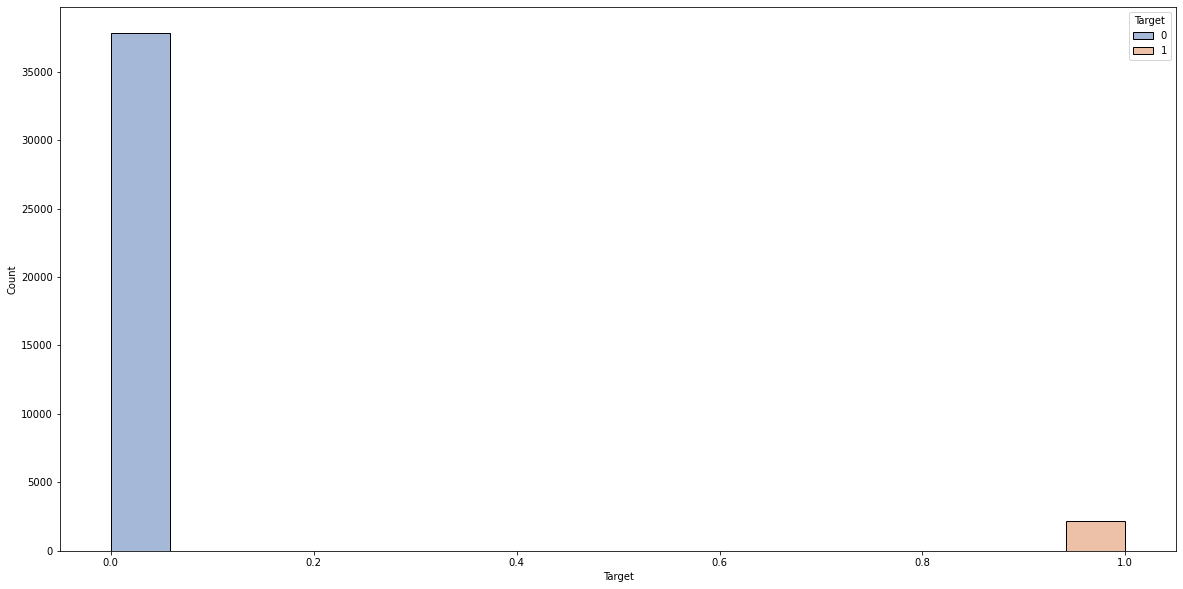

<IPython.core.display.Javascript object>

In [21]:
for cols in train.columns:  # iterates through each column in the train data set
    plt.figure(figsize=(20, 10))
    sns.histplot(
        data=train, x=cols, hue="Target", palette="deep"
    )  # plots distribution of values in column split by Target values
    plt.show()

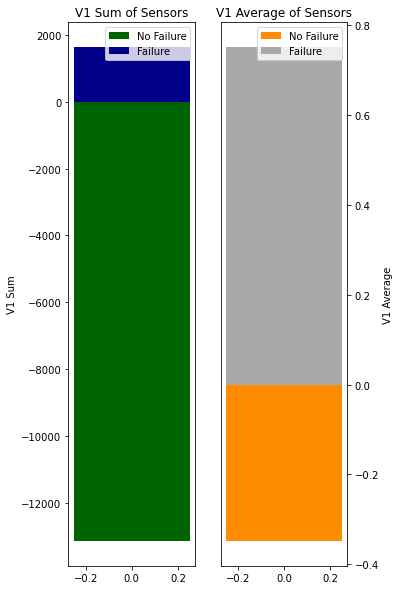

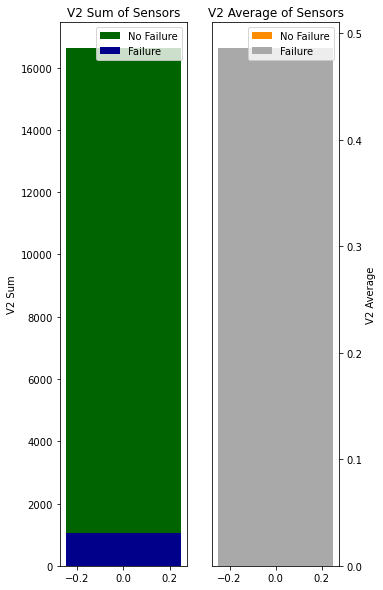

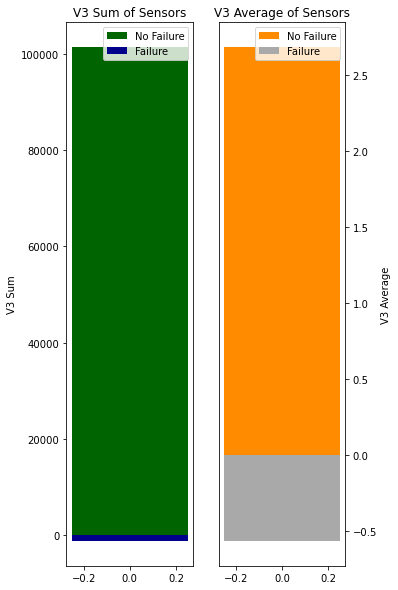

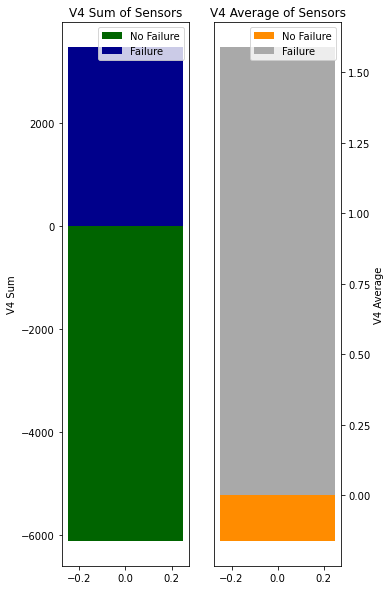

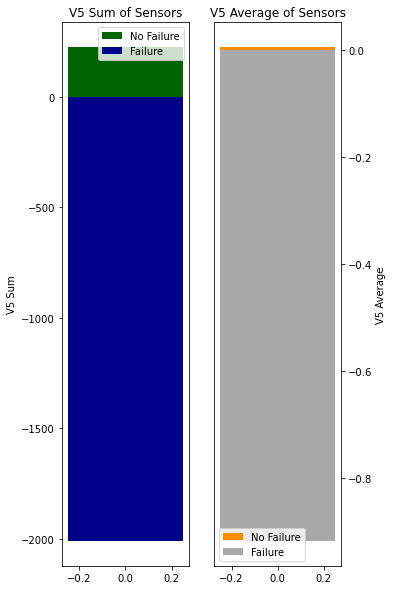

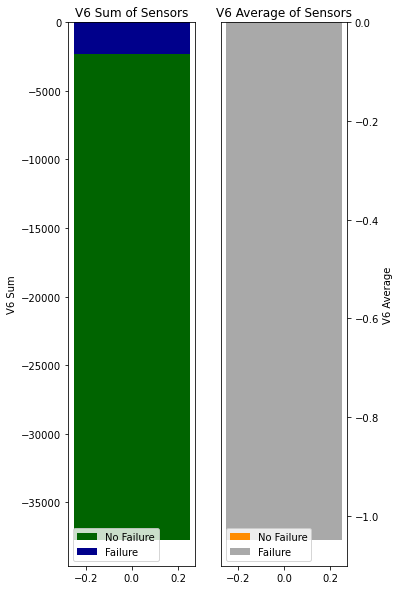

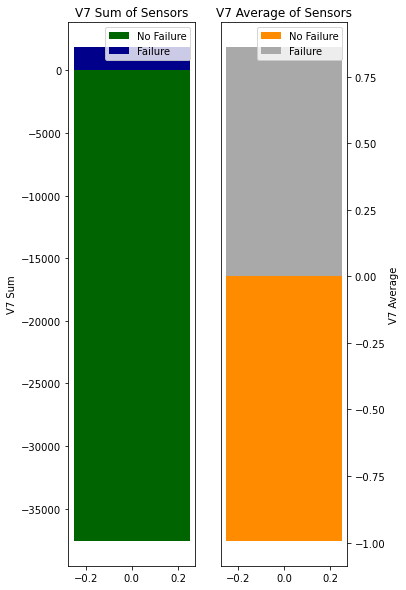

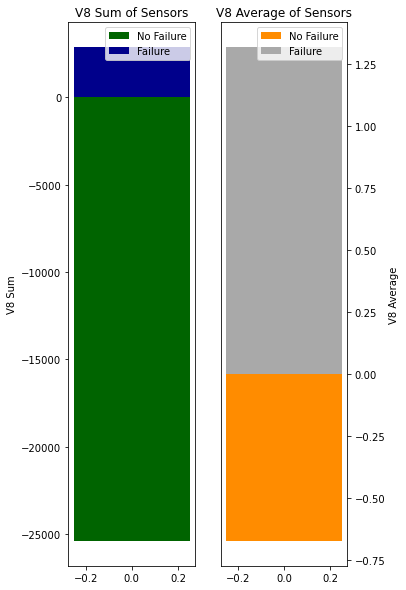

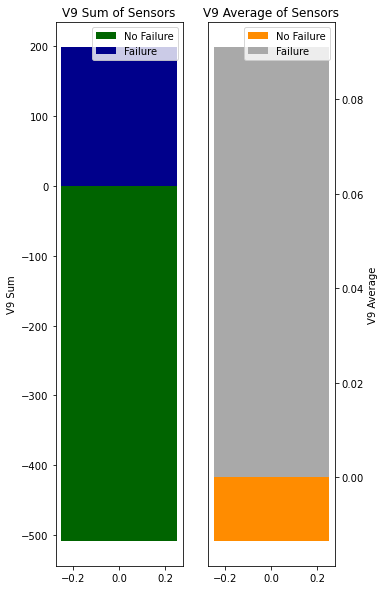

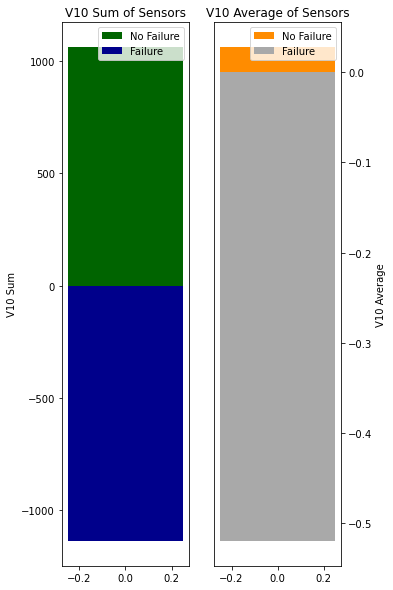

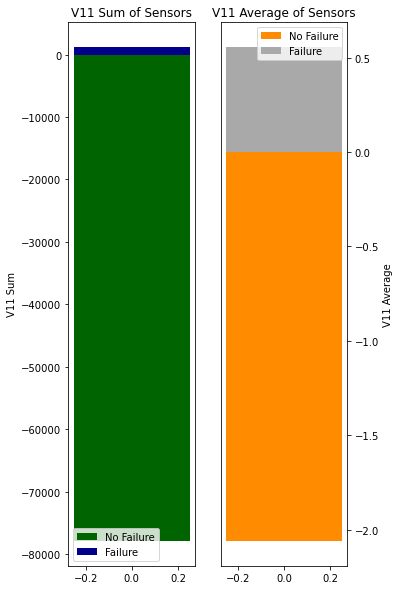

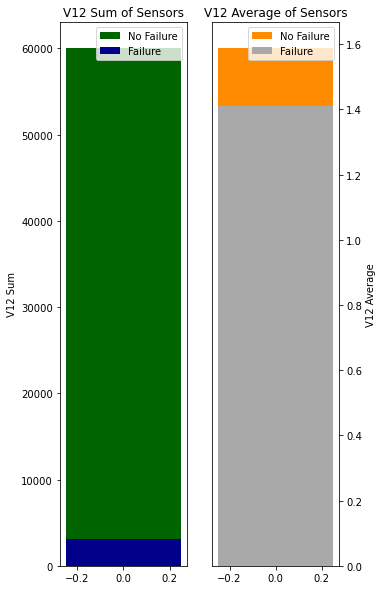

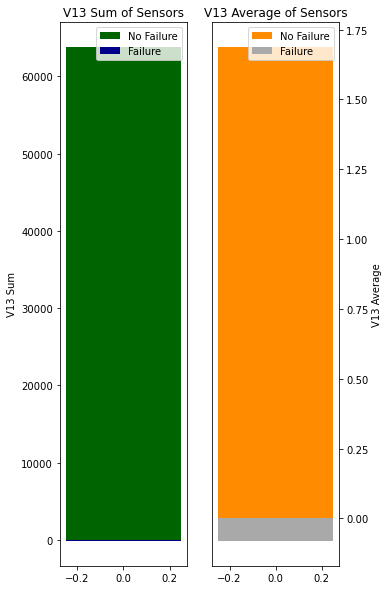

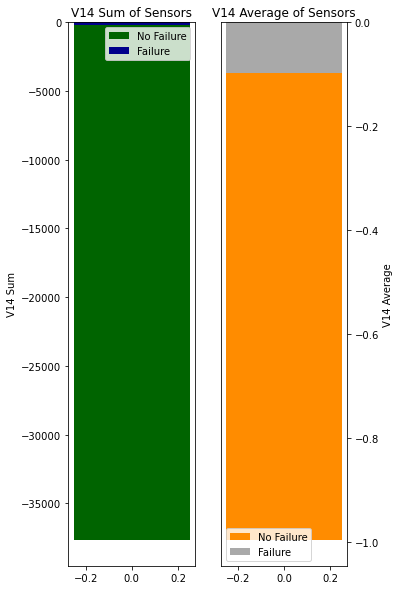

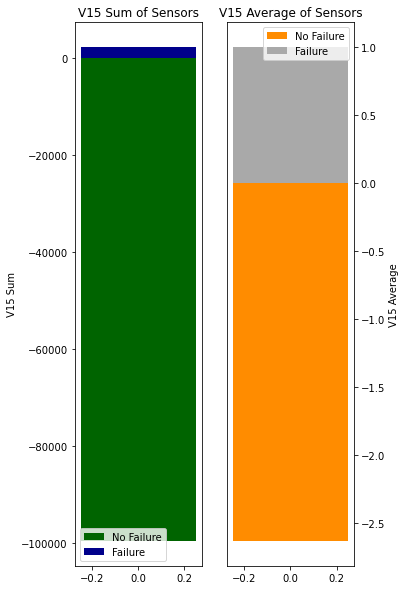

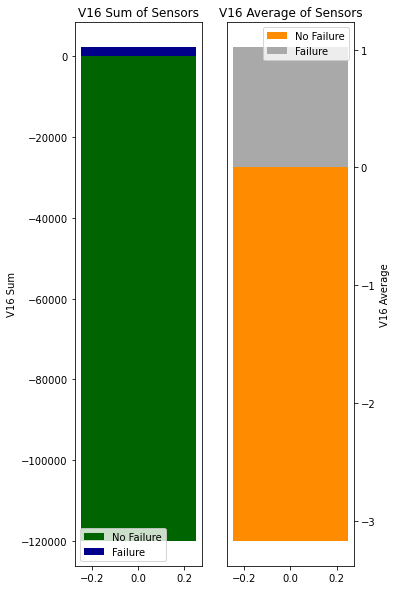

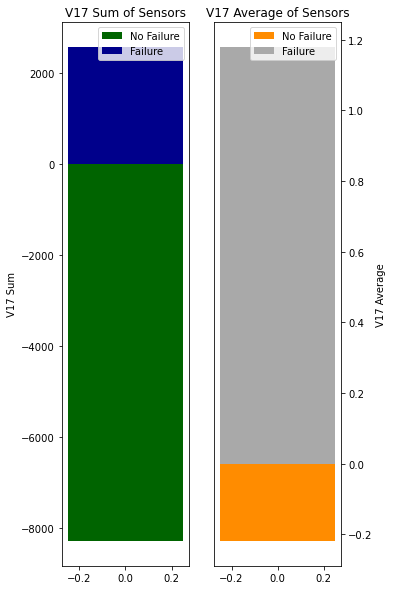

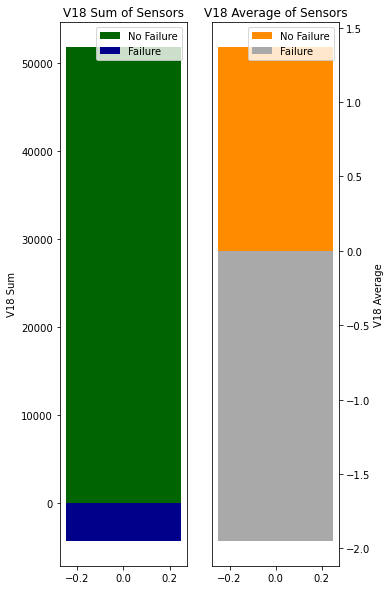

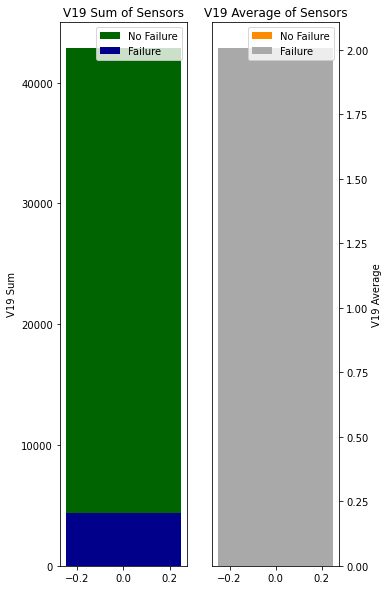

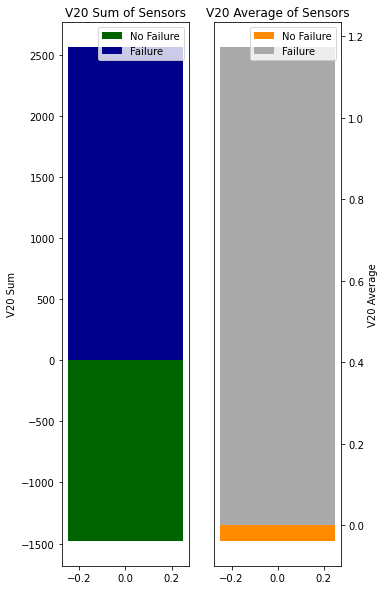

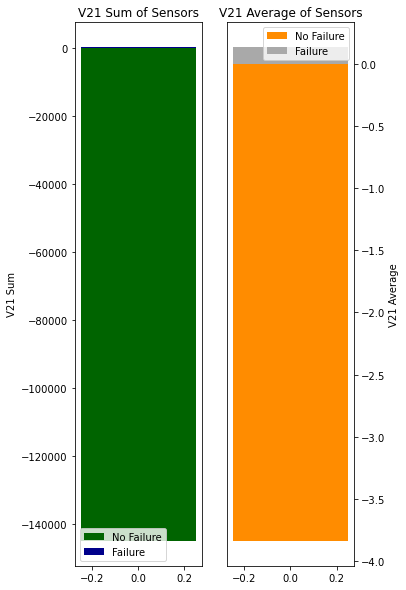

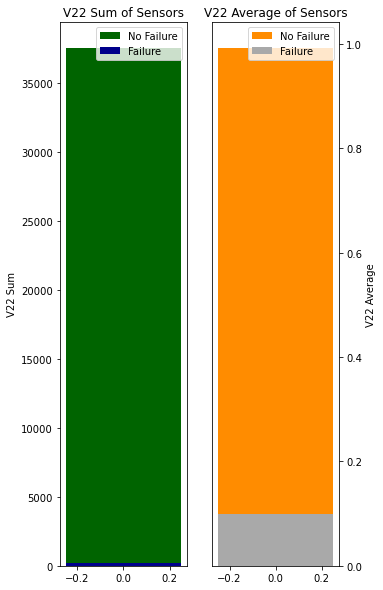

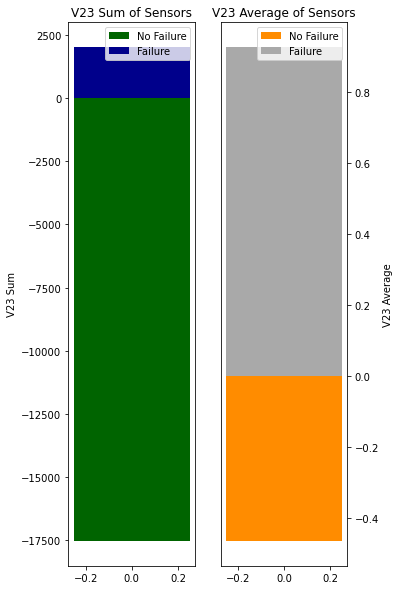

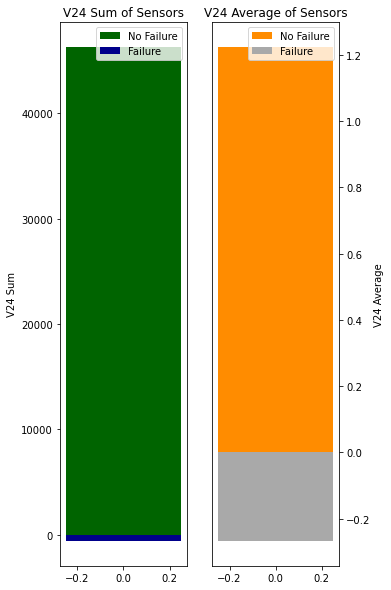

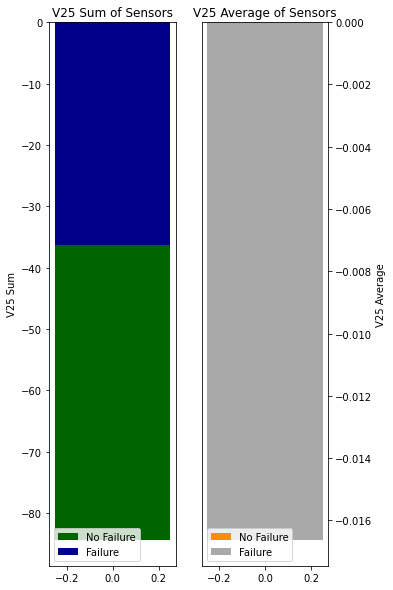

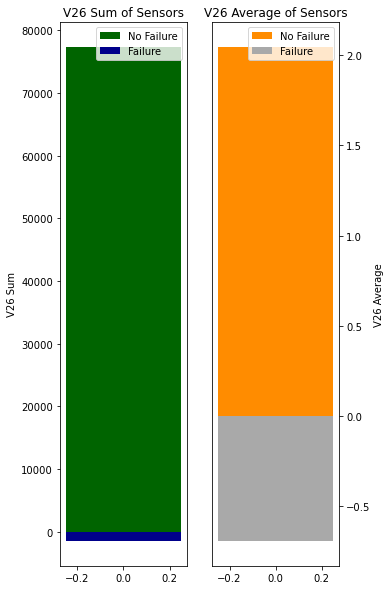

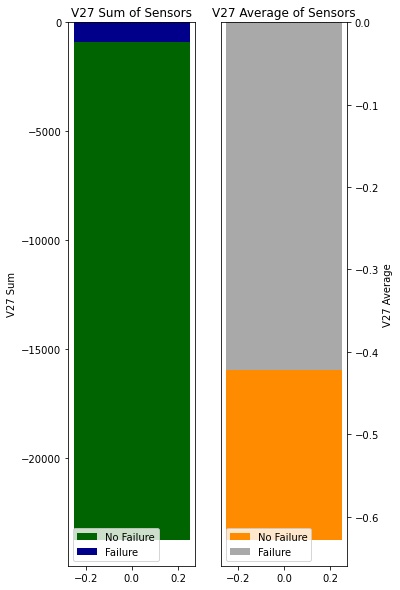

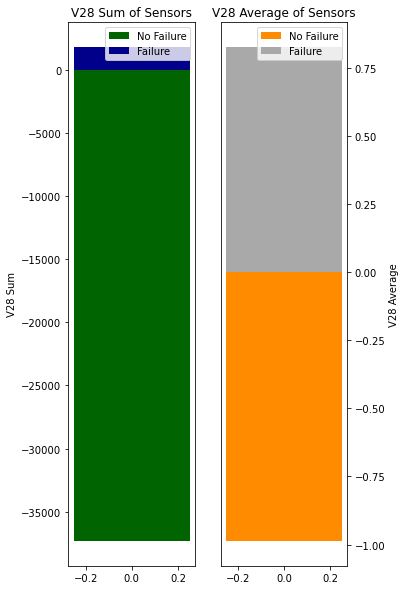

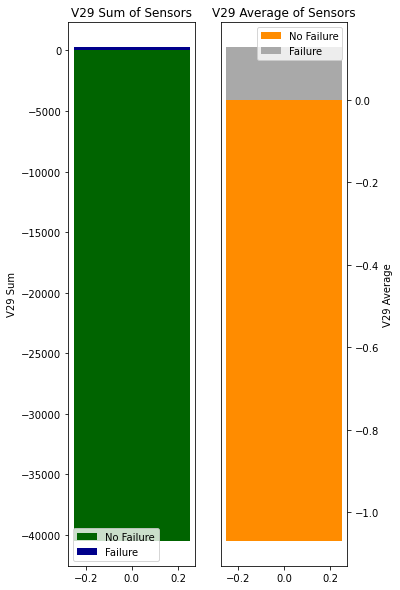

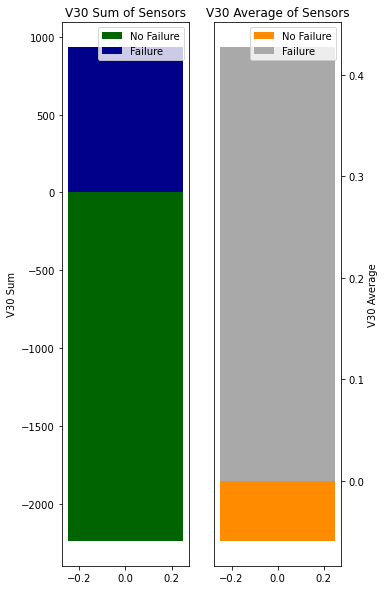

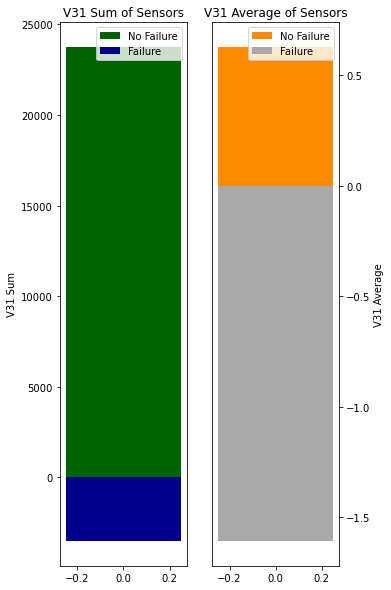

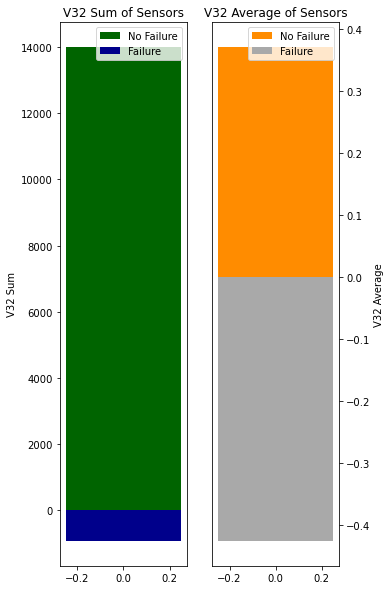

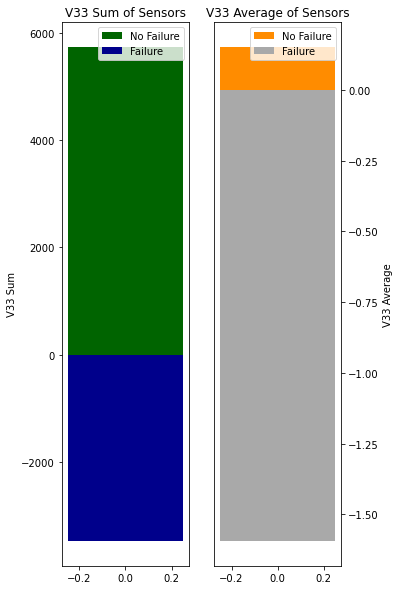

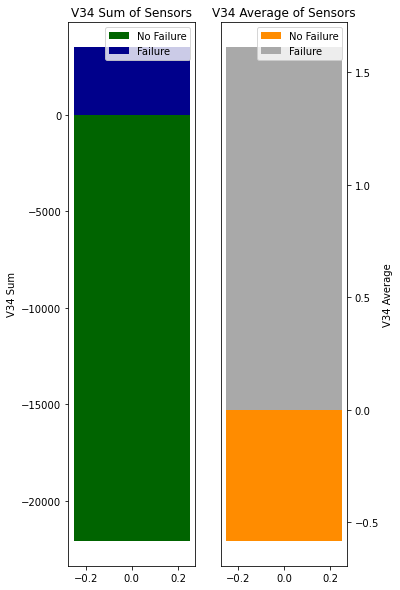

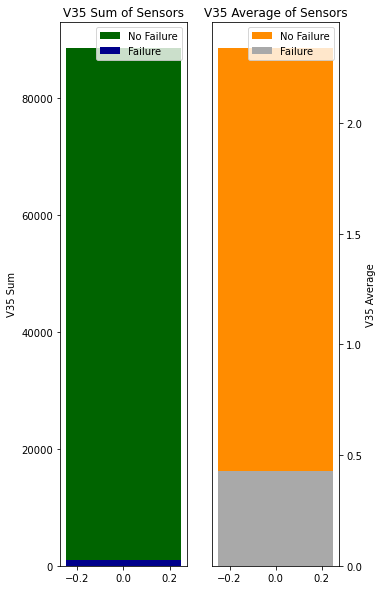

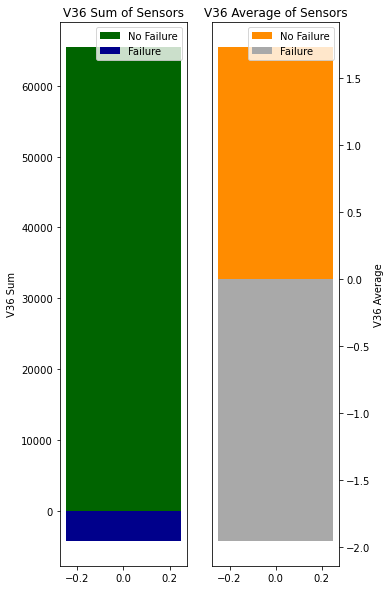

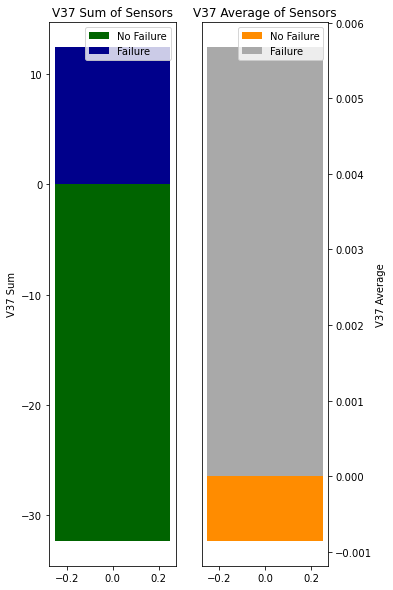

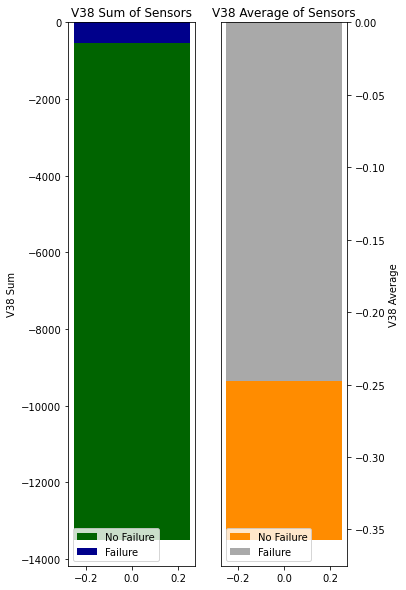

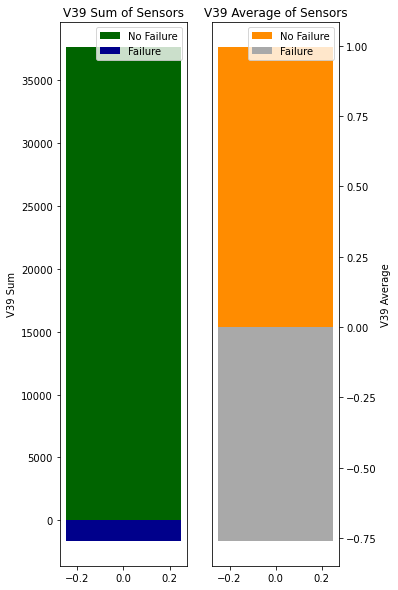

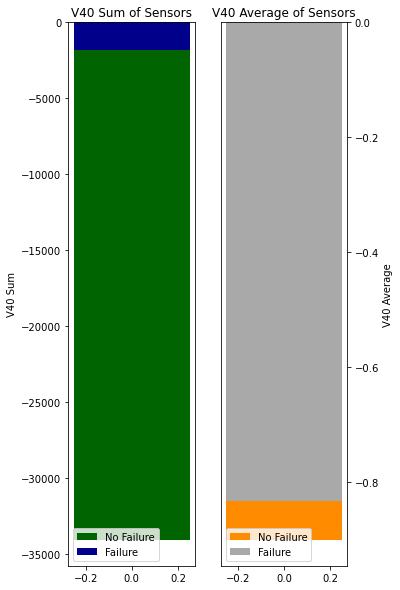

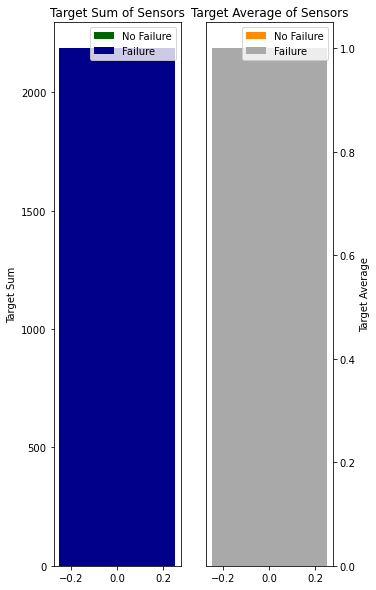

<IPython.core.display.Javascript object>

In [22]:
for col in train.columns:  # iterates through each column in the train data set
    plt.subplots(
        nrows=1, ncols=2, gridspec_kw={"width_ratios": (0.5, 0.5)}, figsize=(5, 10),
    )  # creates two seperate vertical subplots, split equally

    ax_sum = plt.subplot(121)  # sets ax_sum as first subplot
    ax_sum.yaxis.tick_left()  # moves y_ticks to the left side of the plot
    ax_sum.bar(
        x=(0, 0),
        height=train[col].groupby(train["Target"]).sum()[0],
        width=0.5,
        color="darkgreen",  # sets color of bar
    )  # creates first bar for sum of Target=0
    ax_sum.bar(
        x=(0, 0),
        height=train[col].groupby(train["Target"]).sum()[1],
        width=0.5,
        color="darkblue",  # sets color of bar
    )  # creates second bar for sum of Target=1
    ax_sum.legend(
        ("No Failure", "Failure")
    )  # sets legend for first subplot in terms of Failure and Not Failure, instead of 0 and 1
    plt.title(col + " Sum of Sensors")  # creates title of first subplot
    plt.ylabel(col + " Sum")  # creates y label of first subplot

    ax_mean = plt.subplot(122)  # sets ax_sum as second subplot
    ax_mean.yaxis.set_label_position(
        "right"
    )  # moves y label to the right side of the plot
    ax_mean.yaxis.tick_right()  # moves y_ticks to the right side of the plot
    ax_mean.bar(
        x=(0, 0),
        height=train[col].groupby(train["Target"]).mean()[0],
        width=0.5,
        color="darkorange",  # sets color of bar
    )  # creates first bar for average of Target=0
    ax_mean.bar(
        x=(0, 0),
        height=train[col].groupby(train["Target"]).mean()[1],
        width=0.5,
        color="darkgrey",  # sets color of bar
    )  # creates second bar for average of Target=1
    ax_mean.legend(
        ("No Failure", "Failure")
    )  # sets legend for second suplot in terms of Failure and Not Failure, instead of 0 and 1
    plt.title(col + " Average of Sensors")  # creates title of second subplot
    plt.ylabel(col + " Average")  # creates y label of second subplot
    plt.show()

#### Observations:
- All sensors vary in both sum and average for their values.
- The Target does seem to make a differ whether the sensor is positive or negative for the most part.
    - There must be an inverse relationship between the sensors and whether or not the generator fails or not.
- May need to use class weights or unbias the data somehow in model tuning.

## Data Pre-processing

In [23]:
train1 = train.copy()
test1 = test.copy()

<IPython.core.display.Javascript object>

In [24]:
# prepare my data for the test train split. this includes the test dataset and the train dataset
X = train1.drop("Target", axis=1)
y = train1["Target"]

X_test = test1.drop("Target", axis=1)
y_test = test1["Target"]

<IPython.core.display.Javascript object>

In [25]:
# splits the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
)

<IPython.core.display.Javascript object>

In [26]:
# prints shape of X_train, X_val, and X_test sets
print("X_train shape - ", X_train.shape)
print("X_val shape - ", X_val.shape)
print("X_test shape - ", X_test.shape)


X_train shape -  (30000, 40)
X_val shape -  (10000, 40)
X_test shape -  (10000, 40)


<IPython.core.display.Javascript object>

In [27]:
# sets the imputer as the KNNImputer using the 7 nearest neighbors to the data point.
imputer = KNNImputer(n_neighbors=7)

# normalizes data for KNNImputer to accuratly impute missing values
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

<IPython.core.display.Javascript object>

In [28]:
# prints missing values of X_train, X_val, and X_test sets
print(X_train.isna().sum()[:5], "\n", 50 * "-")
print(X_val.isna().sum()[:5], "\n", 50 * "-")
print(X_test.isna().sum()[:5], "\n", 50 * "-")

V1    41
V2    20
V3     0
V4     0
V5     0
dtype: int64 
 --------------------------------------------------
V1     5
V2    19
V3     0
V4     0
V5     0
dtype: int64 
 --------------------------------------------------
V1    11
V2     7
V3     0
V4     0
V5     0
dtype: int64 
 --------------------------------------------------


<IPython.core.display.Javascript object>

In [29]:
# uses the imputer to fit to X_train and then transform the missing values with KNNImputer
X_train_scaled = imputer.fit_transform(X_train_scaled)
# uses the imputer to fit to X_val and then transform the missing values with KNNImputer
X_val_scaled = imputer.fit_transform(X_val_scaled)
# uses the imputer to fit to X_test and then transform the missing values with KNNImputer
X_test_scaled = imputer.fit_transform(X_test_scaled)

# turns it from array back to a dataframe
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# turns it from array back to a dataframe
X_val = pd.DataFrame(X_val_scaled, columns=X_val.columns)

# turns it from array back to a dataframe
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# prints missing values of X_train, X_val, and X_test sets
print(X_train.isna().sum()[:5], "\n", 50 * "-")
print(X_val.isna().sum()[:5], "\n", 50 * "-")
print(X_test.isna().sum()[:5], "\n", 50 * "-")

V1    0
V2    0
V3    0
V4    0
V5    0
dtype: int64 
 --------------------------------------------------
V1    0
V2    0
V3    0
V4    0
V5    0
dtype: int64 
 --------------------------------------------------
V1    0
V2    0
V3    0
V4    0
V5    0
dtype: int64 
 --------------------------------------------------


<IPython.core.display.Javascript object>

#### Observations:
- All missing values have been filled in using the KNN imputer with a nearest neighbors of 7.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

### Which metric to optimize?

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [30]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [31]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)  # y_pred as predictors for the model
    cm = confusion_matrix(target, y_pred)  # sets cm as confusion matrix for model
    #     creates metrics values for labels
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))  # sets plot size
    sns.heatmap(cm, annot=labels, fmt="")  # creates heatmap of confusion matrix
    plt.ylabel("True label")  # sets y label
    plt.xlabel("Predicted label")  # sets x label

<IPython.core.display.Javascript object>

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [32]:
# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

<IPython.core.display.Javascript object>

### Model Building with original data

Sample Decision Tree model building with original data 

In [33]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("gboost", GradientBoostingClassifier(random_state=1)))
models.append(("adaboost", AdaBoostClassifier(random_state=1)))
models.append(("bagging", BaggingClassifier(random_state=1)))
models.append(("rf", RandomForestClassifier(random_state=1)))
models.append(("log_reg", LogisticRegression(random_state=1)))
models.append(
    ("XGBoost", XGBClassifier(disable_default_eval_metric=True, random_state=1))
)

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5

for name, model in models:
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

dtree: 0.7323170731707316
gboost: 0.7146341463414634
adaboost: 0.6164634146341463
bagging: 0.7353658536585365
rf: 0.7603658536585366
log_reg: 0.4573170731707317
XGBoost: 0.8207317073170731

Validation Performance:

dtree: 0.773308957952468
gboost: 0.7513711151736746
adaboost: 0.680073126142596
bagging: 0.753199268738574
rf: 0.793418647166362
log_reg: 0.4149908592321755
XGBoost: 0.8080438756855576


<IPython.core.display.Javascript object>

#### Observations:
- Top 3:
    1. XGBoost
    2. Random Forest
    3. Decision Tree
- The data seem to generalize well.
- The recall scores are doing ok but not great.

### Model Building with Oversampled data


In [34]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 1640
Before OverSampling, counts of label '0': 28360 

After OverSampling, counts of label '1': 28360
After OverSampling, counts of label '0': 28360 

After OverSampling, the shape of train_X: (56720, 40)
After OverSampling, the shape of train_y: (56720,) 



<IPython.core.display.Javascript object>

In [35]:
models_over = []  # Empty list to store all the models

# Appending models into the list
models_over.append(("dtree_over", DecisionTreeClassifier(random_state=1)))
models_over.append(("gboost_over", GradientBoostingClassifier(random_state=1)))
models_over.append(("adaboost_over", AdaBoostClassifier(random_state=1)))
models_over.append(("bagging_over", BaggingClassifier(random_state=1)))
models_over.append(("rf_over", RandomForestClassifier(random_state=1)))
models_over.append(("log_reg_over", LogisticRegression(random_state=1)))
models_over.append(
    ("XGBoost_over", XGBClassifier(disable_default_eval_metric=True, random_state=1))
)

results2 = []  # Empty list to store all model's CV scores
names_over = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance on Oversampled Data:" "\n")

for name, model in models_over:
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results2.append(cv_result)
    names_over.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance on Oversampled Data:" "\n")

for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance on Oversampled Data:

dtree_over: 0.969922425952045
gboost_over: 0.9132228490832158
adaboost_over: 0.8914668547249647
bagging_over: 0.97450634696756
rf_over: 0.9818053596614951
log_reg_over: 0.8748942172073344
XGBoost_over: 0.9843441466854725

Validation Performance on Oversampled Data:

dtree_over: 0.7367458866544789
gboost_over: 0.8848263254113345
adaboost_over: 0.8592321755027422
bagging_over: 0.7842778793418648
rf_over: 0.8427787934186471
log_reg_over: 0.793418647166362
XGBoost_over: 0.8592321755027422


<IPython.core.display.Javascript object>

#### Observations:
- Top 3:
    1. XGBoost
    2. Gradient Boost
    3. Random Forest
- The data seem to not generalize well.
- The recall scores are doing much better than before over sampling.

### Model Building with Undersampled data

In [36]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before OverSampling, counts of label '1': 1640
Before OverSampling, counts of label '0': 28360 

After OverSampling, counts of label '1': 1640
After OverSampling, counts of label '0': 1640 

After OverSampling, the shape of train_X: (3280, 40)
After OverSampling, the shape of train_y: (3280,) 



<IPython.core.display.Javascript object>

In [37]:
models_un = []  # Empty list to store all the models

# Appending models into the list
models_un.append(("dtree_under", DecisionTreeClassifier(random_state=1)))
models_un.append(("gboost_under", GradientBoostingClassifier(random_state=1)))
models_un.append(("adaboost_under", AdaBoostClassifier(random_state=1)))
models_un.append(("bagging_under", BaggingClassifier(random_state=1)))
models_un.append(("rf_under", RandomForestClassifier(random_state=1)))
models_un.append(("log_reg_under", LogisticRegression(random_state=1)))
models_un.append(
    ("XGBoost_under", XGBClassifier(disable_default_eval_metric=True, random_state=1))
)

results3 = []  # Empty list to store all model's CV scores
names_un = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance on Undersampled Data:" "\n")

for name, model in models_un:
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results3.append(cv_result)
    names_un.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance on Undersampled Data:" "\n")

for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance on Undersampled Data:

dtree_under: 0.8591463414634146
gboost_under: 0.8871951219512196
adaboost_under: 0.8725609756097562
bagging_under: 0.875609756097561
rf_under: 0.9
log_reg_under: 0.8560975609756097
XGBoost_under: 0.8957317073170732

Validation Performance on Undersampled Data:

dtree_under: 0.8647166361974405
gboost_under: 0.8848263254113345
adaboost_under: 0.8939670932358318
bagging_under: 0.8628884826325411
rf_under: 0.8884826325411335
log_reg_under: 0.7970749542961609
XGBoost_under: 0.8848263254113345


<IPython.core.display.Javascript object>

#### Observations:
- Top 3:
    1. XGBoost
    2. Random Forest
    3. Decision Tree
- The data seem to generalize well.
- The recall scores are the best so far.

## HyperparameterTuning 

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Sample tuning method for Decision tree with original data

In [38]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 6),
    "min_samples_leaf": [1, 4, 7],
    "max_leaf_nodes": [10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Set the clf to the best combination of parameters
dtree_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train)

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.6067073170731707:


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

<IPython.core.display.Javascript object>

In [39]:
model_perf_train_dtree_tuned = model_performance_classification_sklearn(
    dtree_tuned, X_train, y_train
)
model_perf_train_dtree_tuned

Accuracy  Recall  Precision    F1
0     0.975   0.654      0.861 0.744

<IPython.core.display.Javascript object>

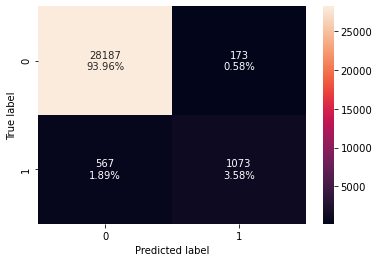

<IPython.core.display.Javascript object>

In [40]:
confusion_matrix_sklearn(dtree_tuned, X_train, y_train)

In [41]:
model_perf_val_dtree_tuned = model_performance_classification_sklearn(
    dtree_tuned, X_val, y_val
)
model_perf_val_dtree_tuned

Accuracy  Recall  Precision    F1
0     0.969   0.660      0.741 0.698

<IPython.core.display.Javascript object>

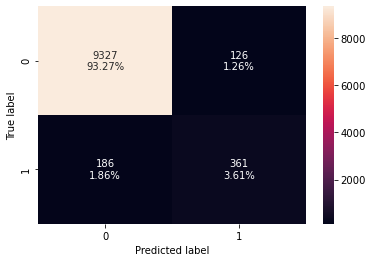

<IPython.core.display.Javascript object>

In [42]:
confusion_matrix_sklearn(dtree_tuned, X_val, y_val)

#### Observations:
- The data seem to generalize well.
- The recall scores are quite poor for the tuned decision tree.

### Sample tuning method for Gradient Boost with original data

In [43]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(100, 150, 25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample": [0.5, 0.7],
    "max_features": [0.5, 0.7],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Set the clf to the best combination of parameters
gboost_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
gboost_tuned.fit(X_train, y_train)

Best parameters are {'subsample': 0.5, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.7573170731707317:


GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, random_state=1, subsample=0.5)

<IPython.core.display.Javascript object>

In [44]:
model_perf_train_gboost_tuned = model_performance_classification_sklearn(
    gboost_tuned, X_train, y_train
)
model_perf_train_gboost_tuned

Accuracy  Recall  Precision    F1
0     0.988   0.805      0.972 0.881

<IPython.core.display.Javascript object>

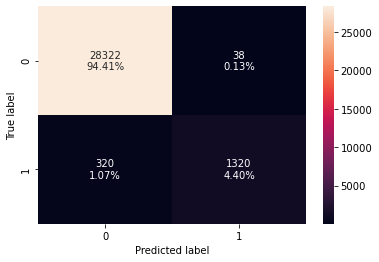

<IPython.core.display.Javascript object>

In [45]:
confusion_matrix_sklearn(gboost_tuned, X_train, y_train)

In [46]:
model_perf_val_gboost_tuned = model_performance_classification_sklearn(
    gboost_tuned, X_val, y_val
)
model_perf_val_gboost_tuned

Accuracy  Recall  Precision    F1
0     0.981   0.748      0.889 0.812

<IPython.core.display.Javascript object>

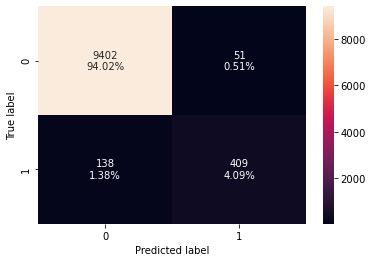

<IPython.core.display.Javascript object>

In [47]:
confusion_matrix_sklearn(gboost_tuned, X_val, y_val)

#### Observations:
- The data seem to generalize well.
- The recall scores are ok for the tuned gradient boost model.

### Sample tuning method for Random Forest with original data

In [48]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200, 250, 300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1), "sqrt"],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Set the clf to the best combination of parameters
rf_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.748170731707317:


RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=300,
                       random_state=1)

<IPython.core.display.Javascript object>

In [49]:
model_perf_train_rf_tuned = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
model_perf_train_rf_tuned

Accuracy  Recall  Precision    F1
0     0.995   0.905      0.998 0.949

<IPython.core.display.Javascript object>

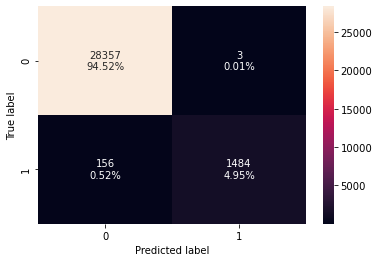

<IPython.core.display.Javascript object>

In [50]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [51]:
model_perf_val_rf_tuned = model_performance_classification_sklearn(
    rf_tuned, X_val, y_val
)
model_perf_val_rf_tuned

Accuracy  Recall  Precision    F1
0     0.987   0.773      0.977 0.863

<IPython.core.display.Javascript object>

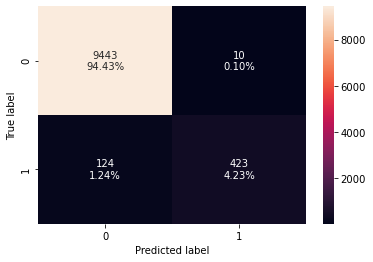

<IPython.core.display.Javascript object>

In [52]:
confusion_matrix_sklearn(rf_tuned, X_val, y_val)

#### Observations:
- The data does not generalize well.
- The recall scores are ok for the tuned Random Forest Model.

### Sample tuning method for XGBoost with original data

In [53]:
# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [150, 200, 250],
    "scale_pos_weight": [5, 10],
    "learning_rate": [0.1, 0.2],
    "gamma": [0, 3, 5],
    "subsample": [0.8, 0.9],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Set the clf to the best combination of parameters
XGBoost_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
XGBoost_tuned.fit(X_train, y_train)

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.8609756097560975:


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [54]:
model_perf_train_XGBoost_tuned = model_performance_classification_sklearn(
    XGBoost_tuned, X_train, y_train
)
model_perf_train_XGBoost_tuned

Accuracy  Recall  Precision    F1
0     0.999   1.000      0.989 0.995

<IPython.core.display.Javascript object>

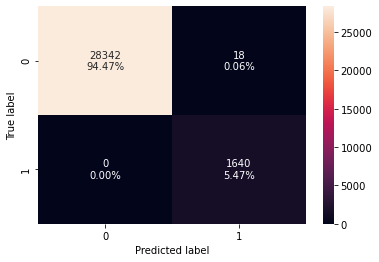

<IPython.core.display.Javascript object>

In [55]:
confusion_matrix_sklearn(XGBoost_tuned, X_train, y_train)

In [56]:
model_perf_val_XGBoost_tuned = model_performance_classification_sklearn(
    XGBoost_tuned, X_val, y_val
)
model_perf_val_XGBoost_tuned

Accuracy  Recall  Precision    F1
0     0.989   0.857      0.932 0.893

<IPython.core.display.Javascript object>

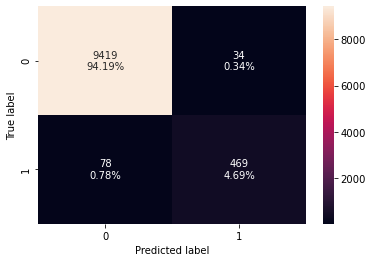

<IPython.core.display.Javascript object>

In [57]:
confusion_matrix_sklearn(XGBoost_tuned, X_val, y_val)

#### Observations:
- The data does not generalize well.
- The recall scores are very good for the tuned XGBoost model

### Sample tuning method for Decision tree with oversampled data

In [58]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 6),
    "min_samples_leaf": [1, 4, 7],
    "max_leaf_nodes": [10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Set the clf to the best combination of parameters
dtree_over_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
dtree_over_tuned.fit(X_train_over, y_train_over)

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.8496473906911142:


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7,
                       random_state=1)

<IPython.core.display.Javascript object>

In [59]:
model_perf_train_dtree_over_tuned = model_performance_classification_sklearn(
    dtree_over_tuned, X_train_over, y_train_over
)
model_perf_train_dtree_over_tuned

Accuracy  Recall  Precision    F1
0     0.895   0.850      0.934 0.890

<IPython.core.display.Javascript object>

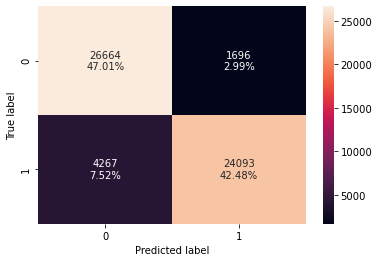

<IPython.core.display.Javascript object>

In [60]:
confusion_matrix_sklearn(dtree_over_tuned, X_train_over, y_train_over)

In [61]:
model_perf_val_dtree_over_tuned = model_performance_classification_sklearn(
    dtree_over_tuned, X_val, y_val
)
model_perf_val_dtree_over_tuned

Accuracy  Recall  Precision    F1
0     0.923   0.773      0.396 0.524

<IPython.core.display.Javascript object>

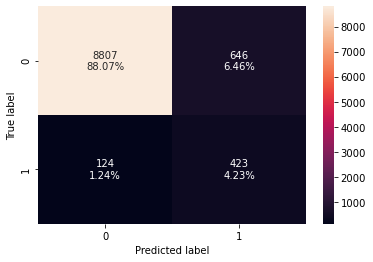

<IPython.core.display.Javascript object>

In [62]:
confusion_matrix_sklearn(dtree_over_tuned, X_val, y_val)

#### Observations:
- The data generalizes horribly.
- The recall scores are better than the tuned Decision Tree model on the original dataset.

### Sample tuning method for Gradient Boost with oversampled data

In [63]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(100, 150, 25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample": [0.5, 0.7],
    "max_features": [0.5, 0.7],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Set the clf to the best combination of parameters
gboost_over_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
gboost_over_tuned.fit(X_train_over, y_train_over)

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 1} with CV score=0.9588857545839211:


GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           random_state=1, subsample=0.7)

<IPython.core.display.Javascript object>

In [64]:
model_perf_train_gboost_over_tuned = model_performance_classification_sklearn(
    gboost_over_tuned, X_train_over, y_train_over
)
model_perf_train_gboost_over_tuned

Accuracy  Recall  Precision    F1
0     0.973   0.966      0.979 0.972

<IPython.core.display.Javascript object>

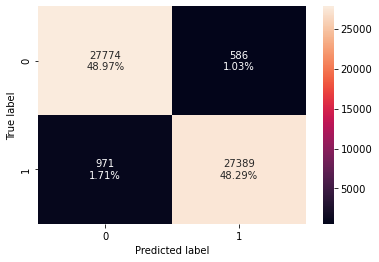

<IPython.core.display.Javascript object>

In [65]:
confusion_matrix_sklearn(gboost_over_tuned, X_train_over, y_train_over)

In [66]:
model_perf_val_gboost_over_tuned = model_performance_classification_sklearn(
    gboost_over_tuned, X_val, y_val
)
model_perf_val_gboost_over_tuned

Accuracy  Recall  Precision    F1
0     0.955   0.846      0.556 0.672

<IPython.core.display.Javascript object>

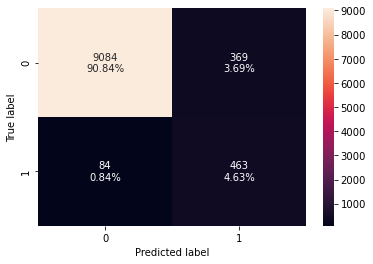

<IPython.core.display.Javascript object>

In [67]:
confusion_matrix_sklearn(gboost_over_tuned, X_val, y_val)

#### Observations:
- The data generalizes horribly.
- The recall scores are better than the Gradient Boosting model on the original dataset.

### Sample tuning method for Random Forest with oversampled data

In [68]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200, 250, 300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1), "sqrt"],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Set the clf to the best combination of parameters
rf_over_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
rf_over_tuned.fit(X_train_over, y_train_over)

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9782440056417491:


RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=300,
                       random_state=1)

<IPython.core.display.Javascript object>

In [69]:
model_perf_train_rf_over_tuned = model_performance_classification_sklearn(
    rf_over_tuned, X_train_over, y_train_over
)
model_perf_train_rf_over_tuned

Accuracy  Recall  Precision    F1
0     1.000   0.999      1.000 1.000

<IPython.core.display.Javascript object>

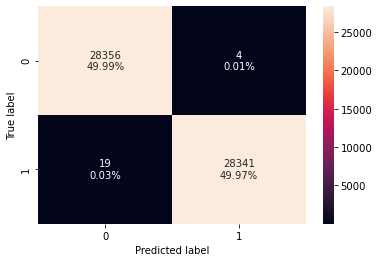

<IPython.core.display.Javascript object>

In [70]:
confusion_matrix_sklearn(rf_over_tuned, X_train_over, y_train_over)

In [71]:
model_perf_val_rf_over_tuned = model_performance_classification_sklearn(
    rf_over_tuned, X_val, y_val
)
model_perf_val_rf_over_tuned

Accuracy  Recall  Precision    F1
0     0.990   0.852      0.953 0.900

<IPython.core.display.Javascript object>

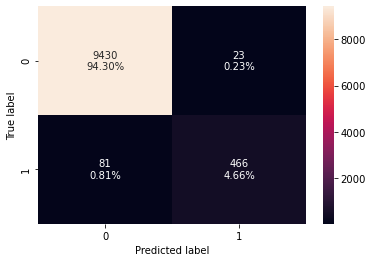

<IPython.core.display.Javascript object>

In [72]:
confusion_matrix_sklearn(rf_over_tuned, X_val, y_val)

#### Observations:
- The data does not generalize well.
- The recall scores are better than the Random Forest model on the original dataset.

### Sample tuning method for XGBoost with oversampled data

In [73]:
# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [150, 200, 250],
    "scale_pos_weight": [5, 10],
    "learning_rate": [0.1, 0.2],
    "gamma": [0, 3, 5],
    "subsample": [0.8, 0.9],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Set the clf to the best combination of parameters
XGBoost_over_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
XGBoost_over_tuned.fit(X_train_over, y_train_over)

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.2, 'gamma': 3} with CV score=0.9958744710860366:


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=3, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [74]:
model_perf_train_XGBoost_over_tuned = model_performance_classification_sklearn(
    XGBoost_over_tuned, X_train_over, y_train_over
)
model_perf_train_XGBoost_over_tuned

Accuracy  Recall  Precision    F1
0     0.996   1.000      0.992 0.996

<IPython.core.display.Javascript object>

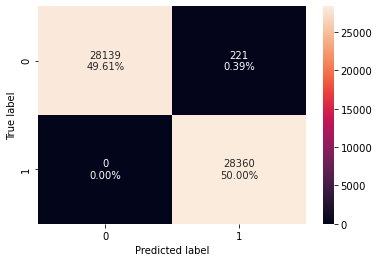

<IPython.core.display.Javascript object>

In [75]:
confusion_matrix_sklearn(XGBoost_over_tuned, X_train_over, y_train_over)

In [76]:
model_perf_val_XGBoost_over_tuned = model_performance_classification_sklearn(
    XGBoost_over_tuned, X_val, y_val
)
model_perf_val_XGBoost_over_tuned

Accuracy  Recall  Precision    F1
0     0.983   0.881      0.825 0.852

<IPython.core.display.Javascript object>

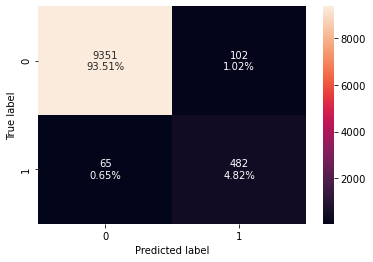

<IPython.core.display.Javascript object>

In [77]:
confusion_matrix_sklearn(XGBoost_over_tuned, X_val, y_val)

#### Observations:
- The data generalizes horribly.
- The recall scores are better than the XGBoosting model on the original dataset.

### Sample tuning method for Decision tree with undersampled data

In [78]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 20),
    "min_samples_leaf": [1, 2, 5, 7],
    "max_leaf_nodes": [5, 10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Set the clf to the best combination of parameters
dtree_un_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
dtree_un_tuned.fit(X_train_un, y_train_un)

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 11} with CV score=0.8292682926829269:


DecisionTreeClassifier(max_depth=11, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, random_state=1)

<IPython.core.display.Javascript object>

In [79]:
model_perf_train_dtree_un_tuned = model_performance_classification_sklearn(
    dtree_un_tuned, X_train_un, y_train_un
)
model_perf_train_dtree_un_tuned

Accuracy  Recall  Precision    F1
0     0.898   0.851      0.938 0.893

<IPython.core.display.Javascript object>

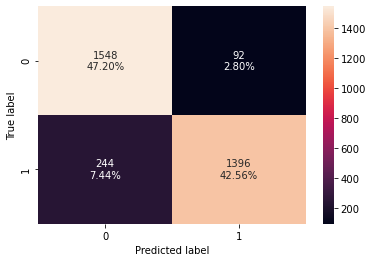

<IPython.core.display.Javascript object>

In [80]:
confusion_matrix_sklearn(dtree_un_tuned, X_train_un, y_train_un)

In [81]:
model_perf_val_dtree_un_tuned = model_performance_classification_sklearn(
    dtree_un_tuned, X_val, y_val
)
model_perf_val_dtree_un_tuned

Accuracy  Recall  Precision    F1
0     0.856   0.843      0.254 0.390

<IPython.core.display.Javascript object>

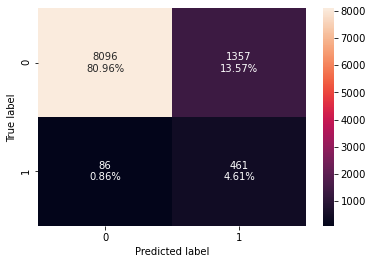

<IPython.core.display.Javascript object>

In [82]:
confusion_matrix_sklearn(dtree_un_tuned, X_val, y_val)

#### Observations:
- The data generalizes horribly.
- The recall scores are about the same as the Decision Tree model on the oversampled dataset.

### Sample tuning method for Gradient Boost with undersampled data

In [83]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(100, 150, 25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample": [0.5, 0.7],
    "max_features": [0.5, 0.7],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Set the clf to the best combination of parameters
gboost_un_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
gboost_un_tuned.fit(X_train_un, y_train_un)

Best parameters are {'subsample': 0.5, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.898170731707317:


GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, random_state=1, subsample=0.5)

<IPython.core.display.Javascript object>

In [84]:
model_perf_train_gboost_un_tuned = model_performance_classification_sklearn(
    gboost_un_tuned, X_train_un, y_train_un
)
model_perf_train_gboost_un_tuned

Accuracy  Recall  Precision    F1
0     0.974   0.954      0.993 0.973

<IPython.core.display.Javascript object>

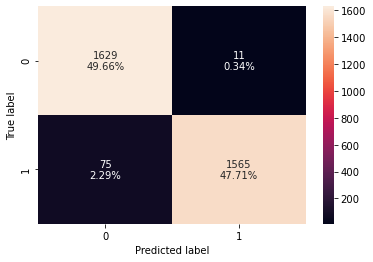

<IPython.core.display.Javascript object>

In [85]:
confusion_matrix_sklearn(gboost_un_tuned, X_train_un, y_train_un)

In [86]:
model_perf_val_gboost_un_tuned = model_performance_classification_sklearn(
    gboost_un_tuned, X_val, y_val
)
model_perf_val_gboost_un_tuned

Accuracy  Recall  Precision    F1
0     0.887   0.892      0.313 0.464

<IPython.core.display.Javascript object>

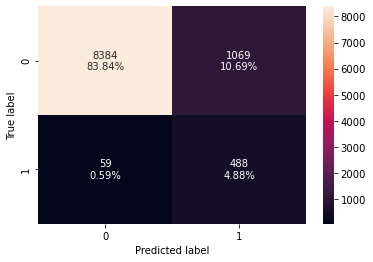

<IPython.core.display.Javascript object>

In [87]:
confusion_matrix_sklearn(gboost_un_tuned, X_val, y_val)

#### Observations:
- The data generalizes horribly.
- The recall scores are about the same as the Gradient Boosting model on the oversampled dataset.

### Sample tuning method for Random Forest with undersampled data

In [88]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200, 250, 300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1), "sqrt"],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Set the clf to the best combination of parameters
rf_un_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
rf_un_tuned.fit(X_train_un, y_train_un)

Best parameters are {'n_estimators': 200, 'min_samples_leaf': 2, 'max_samples': 0.4, 'max_features': 'sqrt'} with CV score=0.899390243902439:


RandomForestClassifier(max_features='sqrt', max_samples=0.4, min_samples_leaf=2,
                       n_estimators=200, random_state=1)

<IPython.core.display.Javascript object>

In [89]:
model_perf_train_rf_un_tuned = model_performance_classification_sklearn(
    rf_un_tuned, X_train_un, y_train_un
)
model_perf_train_rf_un_tuned

Accuracy  Recall  Precision    F1
0     0.955   0.921      0.988 0.953

<IPython.core.display.Javascript object>

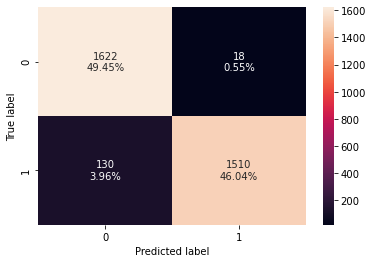

<IPython.core.display.Javascript object>

In [90]:
confusion_matrix_sklearn(rf_un_tuned, X_train_un, y_train_un)

In [91]:
model_perf_val_rf_un_tuned = model_performance_classification_sklearn(
    rf_un_tuned, X_val, y_val
)
model_perf_val_rf_un_tuned

Accuracy  Recall  Precision    F1
0     0.947   0.885      0.509 0.646

<IPython.core.display.Javascript object>

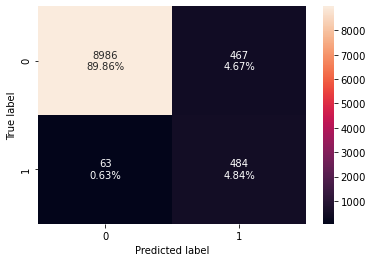

<IPython.core.display.Javascript object>

In [92]:
confusion_matrix_sklearn(rf_un_tuned, X_val, y_val)

#### Observations:
- The data generalizes horribly.
- The recall scores are about the same as the Radnom Forest model on the oversampled dataset.

### Sample tuning method for XGBoost with undersampled data

In [93]:
# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [150, 200, 250],
    "scale_pos_weight": [5, 10],
    "learning_rate": [0.1, 0.2],
    "gamma": [0, 3, 5],
    "subsample": [0.8, 0.9],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

# Set the clf to the best combination of parameters
XGBoost_un_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
XGBoost_un_tuned.fit(X_train_un, y_train_un)

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9189024390243903:


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [94]:
model_perf_train_XGBoost_un_tuned = model_performance_classification_sklearn(
    XGBoost_un_tuned, X_train_un, y_train_un
)
model_perf_train_XGBoost_un_tuned

Accuracy  Recall  Precision    F1
0     0.997   1.000      0.993 0.997

<IPython.core.display.Javascript object>

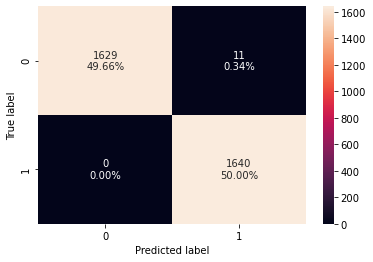

<IPython.core.display.Javascript object>

In [95]:
confusion_matrix_sklearn(XGBoost_un_tuned, X_train_un, y_train_un)

In [96]:
model_perf_val_XGBoost_un_tuned = model_performance_classification_sklearn(
    XGBoost_un_tuned, X_val, y_val
)
model_perf_val_XGBoost_un_tuned

Accuracy  Recall  Precision    F1
0     0.891   0.923      0.325 0.481

<IPython.core.display.Javascript object>

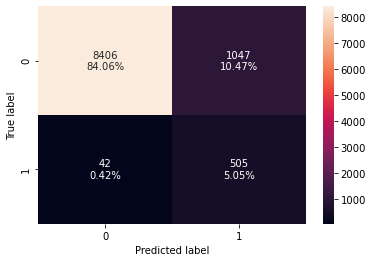

<IPython.core.display.Javascript object>

In [97]:
confusion_matrix_sklearn(XGBoost_un_tuned, X_val, y_val)

#### Observations:
- The data generalizes horribly.
- The recall scores are about the same as the XGBoost model on the oversampled dataset.

## Model performance comparison and choosing the final model

In [98]:
# create list of indexes
index = pd.Index(
    [
        "dtree_tuned",
        "dtree_over_tuned",
        "dtree_un_tuned",
        "gboost_tuned",
        "gboost_over_tuned",
        "gboost_un_tuned",
        "rf_tuned",
        "rf_over_tuned",
        "rf_un_runed",
        "XGBoost_tuned",
        "XGBoost_over_tuned",
        "XGBoost_un_tuned",
    ]
)

# create DataFrame with model performances as rows, and metrics as columns
model_train_perf_comp = pd.concat(
    [
        model_perf_train_dtree_tuned,
        model_perf_train_dtree_over_tuned,
        model_perf_train_dtree_un_tuned,
        model_perf_train_gboost_tuned,
        model_perf_train_gboost_over_tuned,
        model_perf_train_gboost_un_tuned,
        model_perf_train_rf_tuned,
        model_perf_train_rf_over_tuned,
        model_perf_train_rf_un_tuned,
        model_perf_train_XGBoost_tuned,
        model_perf_train_XGBoost_over_tuned,
        model_perf_train_XGBoost_un_tuned,
    ],
    ignore_index=True,
)

# set index as index list
model_train_perf_comp = model_train_perf_comp.set_index(index)

print("Train Performance")
model_train_perf_comp

Train Performance


Accuracy  Recall  Precision    F1
dtree_tuned            0.975   0.654      0.861 0.744
dtree_over_tuned       0.895   0.850      0.934 0.890
dtree_un_tuned         0.898   0.851      0.938 0.893
gboost_tuned           0.988   0.805      0.972 0.881
gboost_over_tuned      0.973   0.966      0.979 0.972
gboost_un_tuned        0.974   0.954      0.993 0.973
rf_tuned               0.995   0.905      0.998 0.949
rf_over_tuned          1.000   0.999      1.000 1.000
rf_un_runed            0.955   0.921      0.988 0.953
XGBoost_tuned          0.999   1.000      0.989 0.995
XGBoost_over_tuned     0.996   1.000      0.992 0.996
XGBoost_un_tuned       0.997   1.000      0.993 0.997

<IPython.core.display.Javascript object>

In [99]:
# create list of indexes
index = pd.Index(
    [
        "dtree_tuned",
        "dtree_over_tuned",
        "dtree_un_tuned",
        "gboost_tuned",
        "gboost_over_tuned",
        "gboost_un_tuned",
        "rf_tuned",
        "rf_over_tuned",
        "rf_un_runed",
        "XGBoost_tuned",
        "XGBoost_over_tuned",
        "XGBoost_un_tuned",
    ]
)

# create DataFrame with model performances as rows, and metrics as columns
model_val_perf_comp = pd.concat(
    [
        model_perf_val_dtree_tuned,
        model_perf_val_dtree_over_tuned,
        model_perf_val_dtree_un_tuned,
        model_perf_val_gboost_tuned,
        model_perf_val_gboost_over_tuned,
        model_perf_val_gboost_un_tuned,
        model_perf_val_rf_tuned,
        model_perf_val_rf_over_tuned,
        model_perf_val_rf_un_tuned,
        model_perf_val_XGBoost_tuned,
        model_perf_val_XGBoost_over_tuned,
        model_perf_val_XGBoost_un_tuned,
    ],
    ignore_index=True,
)

# set index as index list
model_val_perf_comp = model_val_perf_comp.set_index(index)


print("Validation Performance")
model_val_perf_comp

Validation Performance


Accuracy  Recall  Precision    F1
dtree_tuned            0.969   0.660      0.741 0.698
dtree_over_tuned       0.923   0.773      0.396 0.524
dtree_un_tuned         0.856   0.843      0.254 0.390
gboost_tuned           0.981   0.748      0.889 0.812
gboost_over_tuned      0.955   0.846      0.556 0.672
gboost_un_tuned        0.887   0.892      0.313 0.464
rf_tuned               0.987   0.773      0.977 0.863
rf_over_tuned          0.990   0.852      0.953 0.900
rf_un_runed            0.947   0.885      0.509 0.646
XGBoost_tuned          0.989   0.857      0.932 0.893
XGBoost_over_tuned     0.983   0.881      0.825 0.852
XGBoost_un_tuned       0.891   0.923      0.325 0.481

<IPython.core.display.Javascript object>

In [100]:
# joins the validation and test dataset together to make a DataFrame that is easier to interpret
model_train_val_perf_comp = model_train_perf_comp.join(
    model_val_perf_comp, lsuffix="_train", rsuffix="_val"
)

# code will combine train and validation columns together later on to easier interpret data
model_train_val_perf_comp

Accuracy_train  Recall_train  Precision_train  F1_train  \
dtree_tuned                  0.975         0.654            0.861     0.744   
dtree_over_tuned             0.895         0.850            0.934     0.890   
dtree_un_tuned               0.898         0.851            0.938     0.893   
gboost_tuned                 0.988         0.805            0.972     0.881   
gboost_over_tuned            0.973         0.966            0.979     0.972   
gboost_un_tuned              0.974         0.954            0.993     0.973   
rf_tuned                     0.995         0.905            0.998     0.949   
rf_over_tuned                1.000         0.999            1.000     1.000   
rf_un_runed                  0.955         0.921            0.988     0.953   
XGBoost_tuned                0.999         1.000            0.989     0.995   
XGBoost_over_tuned           0.996         1.000            0.992     0.996   
XGBoost_un_tuned             0.997         1.000            0.993     0.997   

                    Accuracy_val  Recall_val  Precision_val  F1_val  
dtree_tuned                0.969       0.660          0.741   0.698  
dtree_over_tuned           0.923       0.773          0.396   0.524  
dtree_un_tuned             0.856       0.843          0.254   0.390  
gboost_tuned               0.981       0.748          0.889   0.812  
gboost_over_tuned          0.955       0.846          0.556   0.672  
gboost_un_tuned            0.887       0.892          0.313   0.464  
rf_tuned                   0.987       0.773          0.977   0.863  
rf_over_tuned              0.990       0.852          0.953   0.900  
rf_un_runed                0.947       0.885          0.509   0.646  
XGBoost_tuned              0.989       0.857          0.932   0.893  
XGBoost_over_tuned         0.983       0.881          0.825   0.852  
XGBoost_un_tuned           0.891       0.923          0.325   0.481

<IPython.core.display.Javascript object>

In [101]:
def df_column_switch(df, col1, col2):
    """
    Retruns the DataFrame (df) with two columns switched.
    
    df = DataFrame with selected column headers inside.
    col1 = The name of the first column.
    col2 = The name of the second column.
    """
    col_list = list(df.columns)  # creates list of columns in df
    a, b = (
        col_list.index(col1),
        col_list.index(col2),
    )  # creates indexes for the two column in col_list
    col_list[b], col_list[a] = (
        col_list[a],
        col_list[b],
    )  # swithces the two columns in col_list
    df = df[col_list]  # sets df to the same order as col_list
    return df

<IPython.core.display.Javascript object>

In [102]:
# switches two columns
model_train_val_perf_comp = df_column_switch(
    model_train_val_perf_comp, "Recall_train", "Accuracy_val"
)
# switches two columns
model_train_val_perf_comp = df_column_switch(
    model_train_val_perf_comp, "Precision_train", "Recall_train"
)
# switches two columns
model_train_val_perf_comp = df_column_switch(
    model_train_val_perf_comp, "F1_train", "Recall_val"
)
# switches two columns
model_train_val_perf_comp = df_column_switch(
    model_train_val_perf_comp, "F1_train", "Precision_val"
)
model_train_val_perf_comp

Accuracy_train  Accuracy_val  Recall_train  Recall_val  \
dtree_tuned                  0.975         0.969         0.654       0.660   
dtree_over_tuned             0.895         0.923         0.850       0.773   
dtree_un_tuned               0.898         0.856         0.851       0.843   
gboost_tuned                 0.988         0.981         0.805       0.748   
gboost_over_tuned            0.973         0.955         0.966       0.846   
gboost_un_tuned              0.974         0.887         0.954       0.892   
rf_tuned                     0.995         0.987         0.905       0.773   
rf_over_tuned                1.000         0.990         0.999       0.852   
rf_un_runed                  0.955         0.947         0.921       0.885   
XGBoost_tuned                0.999         0.989         1.000       0.857   
XGBoost_over_tuned           0.996         0.983         1.000       0.881   
XGBoost_un_tuned             0.997         0.891         1.000       0.923   

                    Precision_train  Precision_val  F1_train  F1_val  
dtree_tuned                   0.861          0.741     0.744   0.698  
dtree_over_tuned              0.934          0.396     0.890   0.524  
dtree_un_tuned                0.938          0.254     0.893   0.390  
gboost_tuned                  0.972          0.889     0.881   0.812  
gboost_over_tuned             0.979          0.556     0.972   0.672  
gboost_un_tuned               0.993          0.313     0.973   0.464  
rf_tuned                      0.998          0.977     0.949   0.863  
rf_over_tuned                 1.000          0.953     1.000   0.900  
rf_un_runed                   0.988          0.509     0.953   0.646  
XGBoost_tuned                 0.989          0.932     0.995   0.893  
XGBoost_over_tuned            0.992          0.825     0.996   0.852  
XGBoost_un_tuned              0.993          0.325     0.997   0.481

<IPython.core.display.Javascript object>

#### Observations:
- The data Accuracy seems to generalize well on all models.
- The data Recall seems to generalize well on all models except for all Gradient Boosting models, the Random Forest models fitted on the original data set, the Random Forest model fitted on the oversampled set, and all of the XGBoosting models.
- The Precision generalized well only on the models that were fitted on the original data set.
- The F1 score seemed to generalize well only on the Decision Tree fitted on the original data set.
$$$$
- The greatest Recall score belongs to the XGBoost model that was fitted on the under sampled data set.
- The greatest overall model seems to be the XGBoost model, regardless of the oringial data set being oversampled, undersampled, or unchanged.

### Calculate total service cost
    - The total service cost it would take for each model will be calculated as follows:
        - For False Positives the  model predicts the generator will fail, but it does not. Thus, a technician will inspect the generator and find no issues. This acrues a cost of $5,000 per time.
        - For False Negatives the  model predicts the generator will not fail, but it does fail. Thus, a technician will have to replace the generator. This acrues a cost of $40,000 per time.
        - For True Positives the  model predicts the generator will fail, and it does fail. Thus, a technician will inspect the generator and repair the generator. This acrues a cost of $5,000 for the inspection plus $15,000 for the repair, for a total of $20,00.

In [103]:
def calculate_total_cost(model, predictors, targets):
    """
    Calculates the total cost of each model based on the following:
    Replacement cost = $40,000
    Repair cost = $15,000
    Inspection cost = $5,000
    
    model: model used to calculate generator failure
    predictors: independant variables
    targets: dependant variable
    """
    #     creates a flattened confusion matrix
    cm_flat = confusion_matrix(targets, model.predict(predictors)).flatten()
    f_pos_cost = cm_flat[1] * 5000  # calculates total cost for False Positives
    f_neg_cost = cm_flat[2] * 40000  # calculates total cost for False Negatives
    t_pos_cost = cm_flat[3] * 20000  # calculates total cost for True Positives

    #     sums up total service cost of False Positives, False Negatives, and True Positives
    total_cost = t_pos_cost + f_neg_cost + f_pos_cost
    return total_cost

<IPython.core.display.Javascript object>

In [104]:
# creates DataFrame containing the total service cost for each tuned predicitve model
df_total_cost_per_model = pd.DataFrame(
    [
        calculate_total_cost(dtree_tuned, X_val, y_val),
        calculate_total_cost(dtree_over_tuned, X_val, y_val),
        calculate_total_cost(dtree_un_tuned, X_val, y_val),
        calculate_total_cost(gboost_tuned, X_val, y_val),
        calculate_total_cost(gboost_over_tuned, X_val, y_val),
        calculate_total_cost(gboost_un_tuned, X_val, y_val),
        calculate_total_cost(rf_tuned, X_val, y_val),
        calculate_total_cost(rf_over_tuned, X_val, y_val),
        calculate_total_cost(rf_un_tuned, X_val, y_val),
        calculate_total_cost(XGBoost_tuned, X_val, y_val),
        calculate_total_cost(XGBoost_over_tuned, X_val, y_val),
        calculate_total_cost(XGBoost_un_tuned, X_val, y_val),
    ],
    index=[
        "Tuned Decision Tree",
        "Oversampled Tuned Decision Tree",
        "Oversampled Tuned Decision Tree",
        "Tuned Gradient Boost",
        "Oversampled Tuned Gradient Boost",
        "Oversampled Tuned Gradient Boost",
        "Tuned Random Forest",
        "Oversampled Tuned Random Forest",
        "Oversampled Tuned Random Forest",
        "Tuned XGBoost",
        "Oversampled Tuned XGBoost",
        "Oversampled Tuned XGBoost",
    ],  # sets index names
    columns=["Total Service Cost"],  # sets column names
)
df_total_cost_per_model

Total Service Cost
Tuned Decision Tree                         15290000
Oversampled Tuned Decision Tree             16650000
Oversampled Tuned Decision Tree             19445000
Tuned Gradient Boost                        13955000
Oversampled Tuned Gradient Boost            14465000
Oversampled Tuned Gradient Boost            17465000
Tuned Random Forest                         13470000
Oversampled Tuned Random Forest             12675000
Oversampled Tuned Random Forest             14535000
Tuned XGBoost                               12670000
Oversampled Tuned XGBoost                   12750000
Oversampled Tuned XGBoost                   17015000

<IPython.core.display.Javascript object>

#### Observations:
- The best model seems to be the XGBoost_un_tuned model.
- With less of a time constraint look into generalizing the model better.
    - Look into the lambda and alpha values corresponding with the Ridge and Lasso methods ,respectivellu, for Regularlization.


- However, due to the conclusion made by the total service cost analysis, the best model is the XGBoost_tuned.
- The generalization of the model outweighs the increase in Recall that the XGBoost model fit on the undersampled data has. Thus, the XGBoost model created fitted on the original data set will be the final model chosen.

### Test set final performance

In [105]:
model_perf_test_XGBoost_tuned = model_performance_classification_sklearn(
    XGBoost_tuned, X_test, y_test
)
model_perf_test_XGBoost_tuned

Accuracy  Recall  Precision    F1
0     0.988   0.821      0.955 0.883

<IPython.core.display.Javascript object>

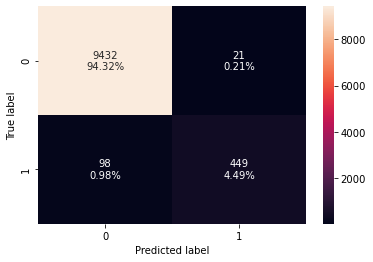

<IPython.core.display.Javascript object>

In [106]:
confusion_matrix_sklearn(XGBoost_tuned, X_test, y_test)

In [107]:
print(
    "Total service cost for tuned XGBoost on test data: ${:,}".format(
        calculate_total_cost(XGBoost_tuned, X_test, y_test)
    ),
)

Total service cost for tuned XGBoost on test data: $13,005,000


<IPython.core.display.Javascript object>

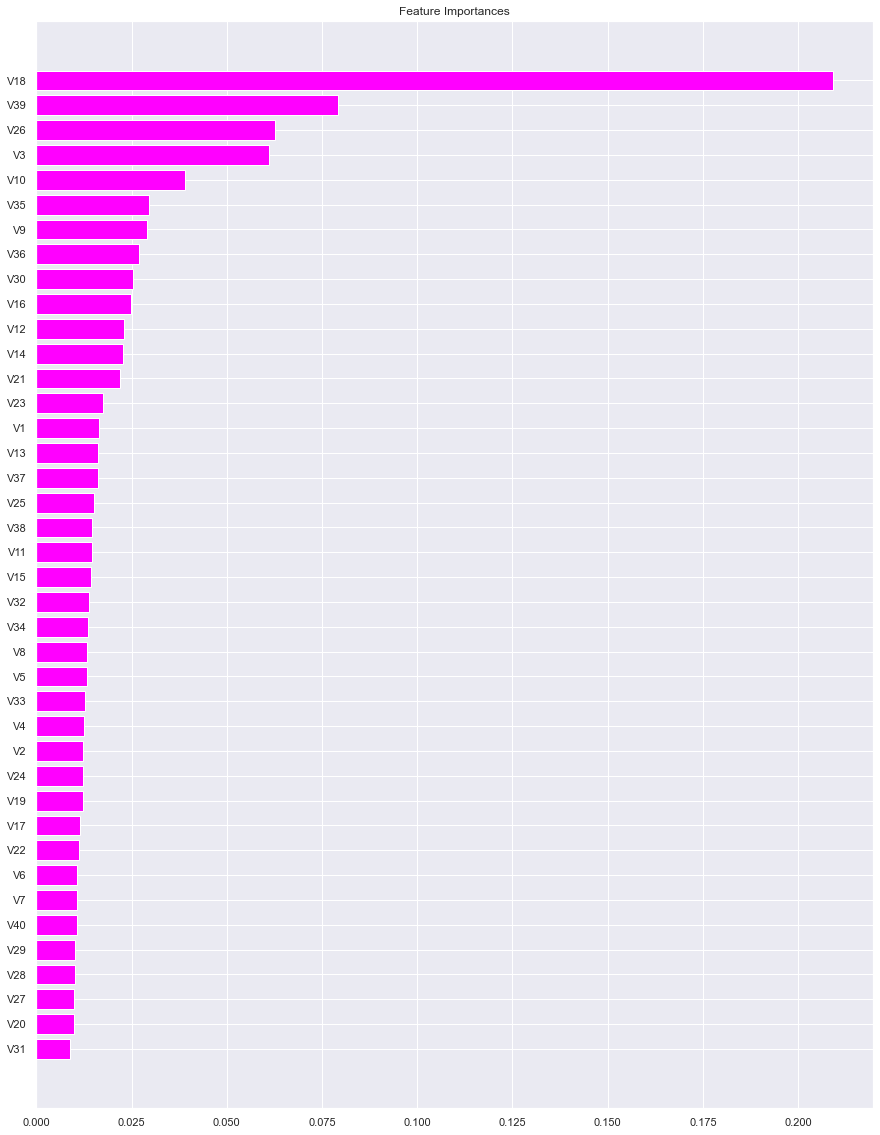

<IPython.core.display.Javascript object>

In [108]:
sns.set(style="darkgrid")

feature_names = X.columns
importances = XGBoost_tuned.feature_importances_
indices = np.argsort(importances)

# creates plot showing model feature importance
plt.figure(figsize=(15, 20))  # sets figure size
plt.barh(
    y=range(len(indices)), width=importances[indices], color="magenta"
)  # creates bars for plot
plt.title("Feature Importances")  # sets title
plt.yticks(
    ticks=range(len(feature_names)), labels=[feature_names[i] for i in indices]
)  # sets y ticks as individual features


plt.show()

#### Observations:
- The test data seemed to generalize well with the validation and train data. There is a high descrepency between the Recall of test and validation data and the Recall of the train data. This can be looked into and rectified using Regularization, such as Lasso and Ridge.

- The metrics were very high on all points except the Recall. The Recall was still good, but it can be better.

- The total service cost seemed to generalize well as well. 

- The feature importances showed that sensor V18 is by far the most important sensor when determining the failure of the generator.

- It may still be worth a look for the XGBoost model created on the undersampled data. That is, if the data can generalize better. This may lead to higher metrics and a higher Recall.

## Pipelines to build the final model

In [109]:
# creates list of features to transform
col_list = [
    "V1",
    "V2",
    "V3",
    "V4",
    "V5",
    "V6",
    "V7",
    "V8",
    "V9",
    "V10",
    "V11",
    "V12",
    "V13",
    "V14",
    "V15",
    "V16",
    "V17",
    "V18",
    "V19",
    "V20",
    "V21",
    "V22",
    "V23",
    "V24",
    "V25",
    "V26",
    "V27",
    "V28",
    "V29",
    "V30",
    "V31",
    "V32",
    "V33",
    "V34",
    "V35",
    "V36",
    "V37",
    "V38",
    "V39",
    "V40",
]

MinMax_transformer = make_pipeline(MinMaxScaler())

# sets transformer as KNNImputer for the ColumnTransformer
KNN_transformer = make_pipeline(KNNImputer(n_neighbors=7))

# sets ColumnTransfomer as preprocessor to impute model features using KNN
preprocessor = ColumnTransformer(
    transformers=[
        ("scaler", MinMax_transformer, col_list),
        ("imputer", KNN_transformer, col_list),
    ],
    remainder="passthrough",
)

<IPython.core.display.Javascript object>

In [110]:
X_train = train1.drop("Target", axis=1)  # sets X_train for model fitting
y_train = train1["Target"]  # sets y_train for model fitting

X_test = test1.drop("Target", axis=1)  # sets X_test for model testing
y_test = test1["Target"]  # sets y_test for model testing

<IPython.core.display.Javascript object>

In [111]:
# sets pipeline as name model
model = Pipeline(
    steps=[
        ("pre", preprocessor),  # Imputes missing values with KNNImputer
        (
            "XGB",
            XGBClassifier(
                subsample=0.9,
                scale_pos_weight=10,
                n_estimators=200,
                learning_rate=0.1,
                gamma=5,
                eval_metric="logloss",
                random_state=1,
            ),  # the model being used in the pipeline
        ),
    ]
)

model.fit(X_train, y_train)  # fits the model to the training data

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27', 'V28', 'V29',
                                                   'V30', ...]),
                                                 ('imputer',
          

<IPython.core.display.Javascript object>

In [112]:
model.predict(X_test)  # predicts the model with the testing data

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<IPython.core.display.Javascript object>

In [113]:
model_performance_classification_sklearn(model, X_test, y_test)

Accuracy  Recall  Precision    F1
0     0.990   0.863      0.946 0.902

<IPython.core.display.Javascript object>

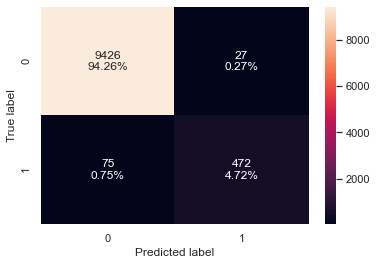

<IPython.core.display.Javascript object>

In [114]:
confusion_matrix_sklearn(model, X_test, y_test)

In [115]:
print(
    "Total service cost for tuned XGBoost on test data: ${:,}".format(
        calculate_total_cost(model, X_test, y_test)
    ),
)

Total service cost for tuned XGBoost on test data: $12,575,000


<IPython.core.display.Javascript object>

# Business Insights and Conclusions

- For detecting failure look closely at sensor `V18`, when `V18` drops below `0` send a technician to inspect the generator, this should give enough time to repair the generator before it breaks and needs to be replaced.
- The model can be based off of the lowest total cost for generator repairs, instead of `Recall` score. This will ensure that the smallest total is paid for a given model.
- Most models worked better when given oversampled or undersampled data do to the large bias in the data, but the total service cost was lowest when the data was left untouched.
- XGBoost model fitted on the undersampled data seemed to wield the highest Recall score, but the XGBoost model fitted on the original data had the lowest total service cost.
- The total service cost for the best model should be at about `$12,600,000.`
- Attempt to find more data to create a better and more generalized model, that can predict generator failure better and reduce the total service cost.


- The data contained `95%` cases where the generator did not fail, and `5%` where the generator did fail.
- Almost all of the sensors have an `inverse` relationship with the failure rate, meaning the if the average value of the sensor is positive for generator Failure it would be negative for No Failure. The opposite is also true for some sensors. The inverse relationship is almost always accurate though.
- Each sensor was normally distributed.